<center><h1><font color="Green">Telecom Churn Case Study</font></h1></center>

Warning: All the hyper parameter tuning steps take very long time to execute. Results are already displayed for all those sections. So please don't run hyper parameter tuning sections unless necessary.

In [137]:
# import all basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from IPython.display import Image

# setting default options for better representation of data
pd.set_option('float_format', '{:.4f}'.format)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)
sns.set_style('whitegrid')

# set default option for warnings
import warnings
warnings.filterwarnings('ignore')

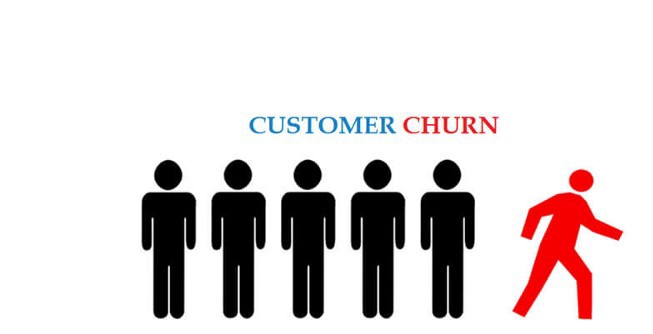

In [139]:
Image("telecom.png", width=500, height=500)

In [2]:
# read data file in pandas dataframe
telecom = pd.read_csv('telecom_churn_data.csv', engine='python')

In [3]:
telecom.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109          0.0000          0.0000          0.0000   
1     7001865778        109          0.0000          0.0000          0.0000   
2     7001625959        109          0.0000          0.0000          0.0000   
3     7001204172        109          0.0000          0.0000          0.0000   
4     7000142493        109          0.0000          0.0000          0.0000   
5     7000286308        109          0.0000          0.0000          0.0000   
6     7001051193        109          0.0000          0.0000          0.0000   
7     7000701601        109          0.0000          0.0000          0.0000   
8     7001524846        109          0.0000          0.0000          0.0000   
9     7001864400        109          0.0000          0.0000          0.0000   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   
5            6/30/2014            7/31/2014            8/31/2014   
6            6/30/2014            7/31/2014            8/31/2014   
7            6/30/2014            7/31/2014            8/31/2014   
8            6/30/2014            7/31/2014            8/31/2014   
9            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.3850  214.8160  213.8030  21.1000          nan   
1            9/30/2014   34.0470  355.0740  268.3210  86.2850      24.1100   
2            9/30/2014  167.6900  189.0580  210.2260 290.7140      11.5400   
3            9/30/2014  221.3380  251.1020  508.0540 389.5000      99.9100   
4            9/30/2014  261.6360  309.8760  238.1740 163.4260      50.3100   
5            9/30/2014   50.2580   58.8100   83.3860 170.8260      50.1600   
6            9/30/2014  429.0230  190.7040  255.1140 114.7510      71.0300   
7            9/30/2014 1069.1800 1349.8500 3171.4800 500.0000      57.8400   
8            9/30/2014  378.7210  492.2230  137.3620 166.7870     413.6900   
9            9/30/2014  119.5180  247.4350  170.2310 160.0420      33.8900   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          nan       0.0000          nan           nan           nan   
1      78.6800       7.6800      18.3400       15.7400       99.8400   
2      55.2400      37.2600      74.8100      143.3300      220.5900   
3      54.3900     310.9800     241.7100      123.3100      109.0100   
4     149.4400      83.8900      58.7800       76.9600       91.8800   
5      43.6300      85.4800     138.7900       19.2800       13.4400   
6      45.0300      76.6600      15.2300      262.7300       49.2400   
7      54.6800      52.2900          nan      453.4300      567.1600   
8     351.0300      35.0800      33.4600       94.6600       80.6300   
9      30.1100      22.4300      27.8400       63.4800       54.1600   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0        0.0000           nan            nan            nan         0.0000   
1      304.7600       53.7600         0.0000         0.0000         0.0000   
2      208.3600      118.9100         0.0000         0.0000         0.0000   
3       71.6800      113.5400         0.0000        54.8600        44.3800   
4      124.2600       45.8100         0.0000         0.0000         0.0000   
5       14.4600       46.9100         0.0000         0.0000         0.0000   
6       92.0800       50.3300         0.0000         0.0000         0.0000   
7      325.9100           nan        16.2300        33.4900        31.6400   
8      136.4800      108.7100 

In [4]:
telecom.shape

(99999, 226)

In [5]:
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
telecom.describe().T

count            mean         std             min  \
mobile_number      99999.0000 7001207270.3875 695669.3863 7000000074.0000   
circle_id          99999.0000        109.0000      0.0000        109.0000   
loc_og_t2o_mou     98981.0000          0.0000      0.0000          0.0000   
std_og_t2o_mou     98981.0000          0.0000      0.0000          0.0000   
loc_ic_t2o_mou     98981.0000          0.0000      0.0000          0.0000   
arpu_6             99999.0000        282.9874    328.4398      -2258.7090   
arpu_7             99999.0000        278.5366    338.1563      -2014.0450   
arpu_8             99999.0000        279.1547    344.4748       -945.8080   
arpu_9             99999.0000        261.6451    341.9986      -1899.5050   
onnet_mou_6        96062.0000        132.3959    297.2074          0.0000   
onnet_mou_7        96140.0000        133.6708    308.7941          0.0000   
onnet_mou_8        94621.0000        133.0181    308.9516          0.0000   
onnet_mou_9        92254.0000        130.3023    308.4777          0.0000   
offnet_mou_6       96062.0000        197.9356    316.8516          0.0000   
offnet_mou_7       96140.0000        197.0451    325.8628          0.0000   
offnet_mou_8       94621.0000        196.5748    327.1707          0.0000   
offnet_mou_9       92254.0000        190.3372    319.3961          0.0000   
roam_ic_mou_6      96062.0000          9.9500     72.8254          0.0000   
roam_ic_mou_7      96140.0000          7.1499     73.4479          0.0000   
roam_ic_mou_8      94621.0000          7.2930     68.4025          0.0000   
roam_ic_mou_9      92254.0000          6.3438     57.1375          0.0000   
roam_og_mou_6      96062.0000         13.9113     71.4432          0.0000   
roam_og_mou_7      96140.0000          9.8187     58.4558          0.0000   
roam_og_mou_8      94621.0000          9.9719     64.7132          0.0000   
roam_og_mou_9      92254.0000          8.5555     58.4382          0.0000   
loc_og_t2t_mou_6   96062.0000         47.1008    150.8564          0.0000   
loc_og_t2t_mou_7   96140.0000         46.4730    155.3187          0.0000   
loc_og_t2t_mou_8   94621.0000         45.8878    151.1848          0.0000   
loc_og_t2t_mou_9   92254.0000         44.5844    147.9954          0.0000   
loc_og_t2m_mou_6   96062.0000         93.3421    162.7805          0.0000   
loc_og_t2m_mou_7   96140.0000         91.3971    157.4923          0.0000   
loc_og_t2m_mou_8   94621.0000         91.7551    156.5370          0.0000   
loc_og_t2m_mou_9   92254.0000         90.4632    158.6815          0.0000   
loc_og_t2f_mou_6   96062.0000          3.7510     14.2304          0.0000   
loc_og_t2f_mou_7   96140.0000          3.7930     14.2650          0.0000   
loc_og_t2f_mou_8   94621.0000          3.6780     13.2710          0.0000   
loc_og_t2f_mou_9   92254.0000          3.6551     13.4575          0.0000   
loc_og_t2c_mou_6   96062.0000          1.1231      5.4489          0.0000   
loc_og_t2c_mou_7   96140.0000          1.3685      7.5334          0.0000   
loc_og_t2c_mou_8   94621.0000          1.4338      6.7833          0.0000   
loc_og_t2c_mou_9   92254.0000          1.2327      5.6190          0.0000   
loc_og_mou_6       96062.0000        144.2012    251.7515          0.0000   
loc_og_mou_7       96140.0000        141.6705    248.7311          0.0000   
loc_og_mou_8       94621.0000        141.3282    245.9143          0.0000   
loc_og_mou_9       92254.0000        138.7100    245.9345          0.0000   
std_og_t2t_mou_6   96062.0000         79.8299    252.4765          0.0000   
std_og_t2t_mou_7   96140.0000         83.2996    263.6310          0.0000   
std_og_t2t_mou_8   94621.0000         83.2827    265.4861          0.0000   
std_og_t2t_mou_9   92254.0000         82.3429    267.1850          0.0000   
std_og_t2m_mou_6   96062.0000         87.2996    255.6179          0.0000   
std_og_t2m_mou_7   96140.0000         90.8041    269.3479          0.0000   
std_og_t2m_mou_8   9

In [7]:
# percentage of null value in each columns
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

mobile_number               0.0000
circle_id                   0.0000
loc_og_t2o_mou              1.0200
std_og_t2o_mou              1.0200
loc_ic_t2o_mou              1.0200
last_date_of_month_6        0.0000
last_date_of_month_7        0.6000
last_date_of_month_8        1.1000
last_date_of_month_9        1.6600
arpu_6                      0.0000
arpu_7                      0.0000
arpu_8                      0.0000
arpu_9                      0.0000
onnet_mou_6                 3.9400
onnet_mou_7                 3.8600
onnet_mou_8                 5.3800
onnet_mou_9                 7.7500
offnet_mou_6                3.9400
offnet_mou_7                3.8600
offnet_mou_8                5.3800
offnet_mou_9                7.7500
roam_ic_mou_6               3.9400
roam_ic_mou_7               3.8600
roam_ic_mou_8               5.3800
roam_ic_mou_9               7.7500
roam_og_mou_6               3.9400
roam_og_mou_7               3.8600
roam_og_mou_8               5.3800
roam_og_mou_9       

In [8]:
print(f'total memory used by data frame: {round(telecom.memory_usage(deep=True).sum()/1024**2, 2)}')

total memory used by data frame: 228.65


Below are the understanding from basic analysis of data:
- From first 10 rows of data, no abnormalities are found. So it can be assumed that default encoding of python works fine for this data set.
- Total 99999 observations and 226 variables are available in the data set.
- There are many missing values present in the data which needs to be anayzed propely and taken care of before building any model.
- Total data frame size is ~229 MB. We'll try to reduce the size for faster processing of data and model building.

# Memory management

Making below changes to decrease memory consumption by variables:
- changing all date fields (currently as object) to datetime
- changing all int to unit as there is no negative value present

In [9]:
# changing all date variables to datetime
col_date = [col for col in telecom.columns if 'date' in col]
for col in col_date:
    telecom[col] = pd.to_datetime(telecom[col], format='%m/%d/%Y', errors='coerce')

In [10]:
# downgrading all int variables wherever possible
col_int = [col for col in telecom.columns if telecom[col].dtypes=='int64']
for col in col_int:
    print(col)    
    # checking min and max value of the column
    min_val = telecom[col].min()
    max_val = telecom[col].max()
    print(f'min: {min_val}, max: {max_val}')

mobile_number
min: 7000000074, max: 7002410905
circle_id
min: 109, max: 109
total_rech_num_6
min: 0, max: 307
total_rech_num_7
min: 0, max: 138
total_rech_num_8
min: 0, max: 196
total_rech_num_9
min: 0, max: 131
total_rech_amt_6
min: 0, max: 35190
total_rech_amt_7
min: 0, max: 40335
total_rech_amt_8
min: 0, max: 45320
total_rech_amt_9
min: 0, max: 37235
max_rech_amt_6
min: 0, max: 4010
max_rech_amt_7
min: 0, max: 4010
max_rech_amt_8
min: 0, max: 4449
max_rech_amt_9
min: 0, max: 3399
last_day_rch_amt_6
min: 0, max: 4010
last_day_rch_amt_7
min: 0, max: 4010
last_day_rch_amt_8
min: 0, max: 4449
last_day_rch_amt_9
min: 0, max: 3399
monthly_2g_6
min: 0, max: 4
monthly_2g_7
min: 0, max: 5
monthly_2g_8
min: 0, max: 5
monthly_2g_9
min: 0, max: 4
sachet_2g_6
min: 0, max: 42
sachet_2g_7
min: 0, max: 48
sachet_2g_8
min: 0, max: 44
sachet_2g_9
min: 0, max: 40
monthly_3g_6
min: 0, max: 14
monthly_3g_7
min: 0, max: 16
monthly_3g_8
min: 0, max: 16
monthly_3g_9
min: 0, max: 11
sachet_3g_6
min: 0, max:

In [11]:
# As there is no negative value for any int variable, downgrading them to unasigned
telecom[col_int] = telecom[col_int].apply(pd.to_numeric, downcast='unsigned')

In [12]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109          0.0000          0.0000          0.0000   
1     7001865778        109          0.0000          0.0000          0.0000   
2     7001625959        109          0.0000          0.0000          0.0000   
3     7001204172        109          0.0000          0.0000          0.0000   
4     7000142493        109          0.0000          0.0000          0.0000   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0           2014-06-30           2014-07-31           2014-08-31   
1           2014-06-30           2014-07-31           2014-08-31   
2           2014-06-30           2014-07-31           2014-08-31   
3           2014-06-30           2014-07-31           2014-08-31   
4           2014-06-30           2014-07-31           2014-08-31   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0           2014-09-30 197.3850 214.8160 213.8030  21.1000          nan   
1           2014-09-30  34.0470 355.0740 268.3210  86.2850      24.1100   
2           2014-09-30 167.6900 189.0580 210.2260 290.7140      11.5400   
3           2014-09-30 221.3380 251.1020 508.0540 389.5000      99.9100   
4           2014-09-30 261.6360 309.8760 238.1740 163.4260      50.3100   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          nan       0.0000          nan           nan           nan   
1      78.6800       7.6800      18.3400       15.7400       99.8400   
2      55.2400      37.2600      74.8100      143.3300      220.5900   
3      54.3900     310.9800     241.7100      123.3100      109.0100   
4     149.4400      83.8900      58.7800       76.9600       91.8800   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0        0.0000           nan            nan            nan         0.0000   
1      304.7600       53.7600         0.0000         0.0000         0.0000   
2      208.3600      118.9100         0.0000         0.0000         0.0000   
3       71.6800      113.5400         0.0000        54.8600        44.3800   
4      124.2600       45.8100         0.0000         0.0000         0.0000   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            nan            nan            nan         0.0000            nan   
1         0.0000         0.0000         0.0000         0.0000         0.0000   
2        38.4900         0.0000         0.0000         0.0000        70.9400   
3         0.0000         0.0000        28.0900        39.0400         0.0000   
4         0.0000         0.0000         0.0000         0.0000         0.0000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               nan               nan            0.0000               nan   
1           23.8800           74.5600            7.6800           18.3400   
2            7.1900           28.7400           13.5800           14.3900   
3           73.6800           34.8100           10.6100           15.4900   
4           50.3100          149.4400           83.8900           58.7800   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               nan               nan            0.0000               nan   
1           11.5100           75.9400          291.8600           53.7600   
2           29.3400           16.8600           38.4600           28.1600   
3          107.4300           83.2100           22.4600           65.4600   
4           67.6400           91.8800          124.2600           37.8900   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               nan               nan            0.0000               nan   
1            0.0000            0.0000            0.0000            0.0000   
2           24.1100           21.7900           15.6100           22.2400   
3            1.9100            0.6500            4.

In [13]:
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   mobile_number             uint64        
 1   circle_id                 uint8         
 2   loc_og_t2o_mou            float64       
 3   std_og_t2o_mou            float64       
 4   loc_ic_t2o_mou            float64       
 5   last_date_of_month_6      datetime64[ns]
 6   last_date_of_month_7      datetime64[ns]
 7   last_date_of_month_8      datetime64[ns]
 8   last_date_of_month_9      datetime64[ns]
 9   arpu_6                    float64       
 10  arpu_7                    float64       
 11  arpu_8                    float64       
 12  arpu_9                    float64       
 13  onnet_mou_6               float64       
 14  onnet_mou_7               float64       
 15  onnet_mou_8               float64       
 16  onnet_mou_9               float64       
 17  offnet_mou_

In [14]:
print(f'total memory used by data frame: {round(telecom.memory_usage(deep=True).sum()/1024**2, 2)}')

total memory used by data frame: 151.06


Total memory used reduced by 34% (~78 MB).

# Data Preparation


## Define High Value Customer

In [15]:
# for identifying high value customers, lets check recharge details of all the customers for good months
col_rech_6_7 = ['total_rech_num_6', 'total_rech_num_7', 'total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_6',
                'max_rech_amt_7', 'date_of_last_rech_6', 'date_of_last_rech_7', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
                'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'total_rech_data_6', 'total_rech_data_7',
                'max_rech_data_6', 'max_rech_data_7', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_3g_6',
                'count_rech_3g_7', 'av_rech_amt_data_6', 'av_rech_amt_data_7']

telecom[col_rech_6_7].head()

total_rech_num_6  total_rech_num_7  total_rech_amt_6  total_rech_amt_7  \
0                 4                 3               362               252   
1                 4                 9                74               384   
2                 5                 4               168               315   
3                10                11               230               310   
4                 5                 6               196               350   

   max_rech_amt_6  max_rech_amt_7 date_of_last_rech_6 date_of_last_rech_7  \
0             252             252          2014-06-21          2014-07-16   
1              44             154          2014-06-29          2014-07-31   
2              86             200          2014-06-17          2014-07-24   
3              60              50          2014-06-28          2014-07-31   
4              56             110          2014-06-26          2014-07-28   

   last_day_rch_amt_6  last_day_rch_amt_7 date_of_last_rech_data_6  \
0                 252                 252               2014-06-21   
1                  44                  23                      NaT   
2                   0                 200                      NaT   
3                  30                  50                      NaT   
4                  50                 110               2014-06-04   

  date_of_last_rech_data_7  total_rech_data_6  total_rech_data_7  \
0               2014-07-16             1.0000             1.0000   
1               2014-07-25                nan             1.0000   
2                      NaT                nan                nan   
3                      NaT                nan                nan   
4                      NaT             1.0000                nan   

   max_rech_data_6  max_rech_data_7  count_rech_2g_6  count_rech_2g_7  \
0         252.0000         252.0000           0.0000           0.0000   
1              nan         154.0000              nan           1.0000   
2              nan              nan              nan              nan   
3              nan              nan              nan              nan   
4          56.0000              nan           1.0000              nan   

   count_rech_3g_6  count_rech_3g_7  av_rech_amt_data_6  av_rech_amt_data_7  
0           1.0000           1.0000            252.0000            252.0000  
1              nan           0.0000                 nan            154.0000  
2              nan              nan                 nan                 nan  
3              nan              nan                 nan                 nan  
4           0.0000              nan             56.0000                 nan

In [16]:
telecom[col_rech_6_7].describe(include='all').T

count unique        top   freq      first  \
total_rech_num_6         99999.0000    NaN        NaT    NaN        NaT   
total_rech_num_7         99999.0000    NaN        NaT    NaN        NaT   
total_rech_amt_6         99999.0000    NaN        NaT    NaN        NaT   
total_rech_amt_7         99999.0000    NaN        NaT    NaN        NaT   
max_rech_amt_6           99999.0000    NaN        NaT    NaN        NaT   
max_rech_amt_7           99999.0000    NaN        NaT    NaN        NaT   
date_of_last_rech_6           98392     30 2014-06-30  16960 2014-06-01   
date_of_last_rech_7           98232     31 2014-07-31  17288 2014-07-01   
last_day_rch_amt_6       99999.0000    NaN        NaT    NaN        NaT   
last_day_rch_amt_7       99999.0000    NaN        NaT    NaN        NaT   
date_of_last_rech_data_6      25153     30 2014-06-30   1888 2014-06-01   
date_of_last_rech_data_7      25571     31 2014-07-31   1813 2014-07-01   
total_rech_data_6        25153.0000    NaN        NaT    NaN        NaT   
total_rech_data_7        25571.0000    NaN        NaT    NaN        NaT   
max_rech_data_6          25153.0000    NaN        NaT    NaN        NaT   
max_rech_data_7          25571.0000    NaN        NaT    NaN        NaT   
count_rech_2g_6          25153.0000    NaN        NaT    NaN        NaT   
count_rech_2g_7          25571.0000    NaN        NaT    NaN        NaT   
count_rech_3g_6          25153.0000    NaN        NaT    NaN        NaT   
count_rech_3g_7          25571.0000    NaN        NaT    NaN        NaT   
av_rech_amt_data_6       25153.0000    NaN        NaT    NaN        NaT   
av_rech_amt_data_7       25571.0000    NaN        NaT    NaN        NaT   

                               last     mean      std    min      25%  \
total_rech_num_6                NaT   7.5588   7.0784 0.0000   3.0000   
total_rech_num_7                NaT   7.7004   7.0704 0.0000   3.0000   
total_rech_amt_6                NaT 327.5146 398.0197 0.0000 109.0000   
total_rech_amt_7                NaT 322.9630 408.1142 0.0000 100.0000   
max_rech_amt_6                  NaT 104.6375 120.6149 0.0000  30.0000   
max_rech_amt_7                  NaT 104.7524 124.5240 0.0000  30.0000   
date_of_last_rech_6      2014-06-30      NaN      NaN    NaN      NaN   
date_of_last_rech_7      2014-07-31      NaN      NaN    NaN      NaN   
last_day_rch_amt_6              NaT  63.1563  97.3566 0.0000   0.0000   
last_day_rch_amt_7              NaT  59.3858  95.9154 0.0000   0.0000   
date_of_last_rech_data_6 2014-06-30      NaN      NaN    NaN      NaN   
date_of_last_rech_data_7 2014-07-31      NaN      NaN    NaN      NaN   
total_rech_data_6               NaT   2.4638   2.7891 1.0000   1.0000   
total_rech_data_7               NaT   2.6664   3.0316 1.0000   1.0000   
max_rech_data_6                 NaT 126.3934 108.4772 1.0000  25.0000   
max_rech_data_7                 NaT 126.7295 109.7653 1.0000  25.0000   
count_rech_2g_6                 NaT   1.8647   2.5703 0.0000   1.0000   
count_rech_2g_7                 NaT   2.0447   2.7683 0.0000   1.0000   
count_rech_3g_6                 NaT   0.5991   1.2744 0.0000   0.0000   
count_rech_3g_7                 NaT   0.6217   1.3945 0.0000   0.0000   
av_rech_amt_data_6              NaT 192.6010 192.6463 1.0000  82.0000   
av_rech_amt_data_7              NaT 200.9813 196.7912 0.5000  92.0000   

                              50%      75%        max  
total_rech_num_6           6.0000   9.0000   307.0000  
total_rech_num_7           6.0000  10.0000   138.0000  
total_rech_amt_6         230.0000 437.5000 35190.0000  
total_rech_amt_7         220.0000 428.0000 40335.0000  
max_rech_amt_6           110.0000 120.0000  4010.0000  
max_rech_amt_7           110.0000 128.0000  4010.0000  
date_of_last_rech_6           NaN      NaN        NaN  
date_of_last_rech_7           NaN      NaN        NaN  
last_day_rch_amt_6        30.0000 110.0000  4010.0000  
last_day_rch_amt_7        30.0000 110.0000  4010.0000  
date_of_

It can be observed, number of null values for data recharge dates and other data related variables are same for both month 6 and 7. So it can be conclude that these customers actually did not recharged for data in those 2 months.<br>
Based on this assumption, all the null values of data related recharge variables (other than date) where min value is not 0 can be imputed with 0.

In [17]:
# columns to impute
col_impute = [col for col in col_rech_6_7 if (telecom[col].dtype!='datetime64[ns]') & (telecom[col].min()!=0) &
             (telecom[col].count()!=99999)]
col_impute

['total_rech_data_6',
 'total_rech_data_7',
 'max_rech_data_6',
 'max_rech_data_7',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7']

In [18]:
# impute missing values with 0
telecom[col_impute] = telecom[col_impute].apply(lambda x: x.fillna(0))

# creating new column for average recharge amount of good phase
telecom['av_rech_amt_6_7'] = (telecom.total_rech_amt_6 + telecom.total_rech_amt_7 + 
                             (telecom.total_rech_data_6 * telecom.av_rech_amt_data_6) +
                              (telecom.total_rech_data_7 * telecom.av_rech_amt_data_7)) / 2

# calculating 70th percentile of average recharge amount of good phase
av_rech_amt_70_per = telecom.av_rech_amt_6_7.quantile(.7)
av_rech_amt_70_per

478.0

In [19]:
# creating new data frame for high value customers
telecom_hv = telecom[telecom.av_rech_amt_6_7 >= av_rech_amt_70_per]
telecom_hv.shape

(30001, 227)

In [20]:
# dropping the column created for high value customer calculation
telecom_hv.drop(columns='av_rech_amt_6_7', axis=1, inplace=True)

- New data frame is created only for high value coustomers.<br>
- Defined high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).<br>
- Total 30001 observations are remaining in the new data frame.

## Label Creation

In [21]:
# creating new column for y variable 'churn'
telecom_hv['churn'] = 0

In [22]:
# changing churn label to 1 when total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9 values are all 0
telecom_hv.loc[(telecom_hv.total_ic_mou_9==0) & (telecom_hv.total_og_mou_9==0) & (telecom_hv.vol_2g_mb_9==0) &
           (telecom_hv.vol_3g_mb_9==0), 'churn'] = 1

In [23]:
# downgrading churn to unsigned value to save memory
telecom_hv.churn = telecom_hv.churn.astype('uint8')

# checking value count for churn and non churn customers
telecom_hv.churn.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [24]:
round(telecom_hv.churn.value_counts()/telecom_hv.shape[0], 3)

0   0.9190
1   0.0810
Name: churn, dtype: float64

Target variable 'churn' is created for customers (churn=1, else 0) based on the fourth month as follows:<br>
Those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase (month 9). The variables used to tag churners are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

Total 2441 (8%) churn and 27560 (92%) non churn customer details are present in the data set.

## Remove Variable Corresponding to the Churn Phase

In [25]:
# columns list of attributes for month 9
col_9 = [col for col in telecom_hv.columns if col.endswith('_9')]
col_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [26]:
# dropping variable with name ends with '_9'
telecom_hv.drop(columns=col_9, axis=1, inplace=True)
telecom_hv.shape

(30001, 173)

In [27]:
telecom_hv.reset_index(drop=True, inplace=True)
telecom_hv.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109          0.0000          0.0000          0.0000   
1     7000701601        109          0.0000          0.0000          0.0000   
2     7001524846        109          0.0000          0.0000          0.0000   
3     7002124215        109          0.0000          0.0000          0.0000   
4     7000887461        109          0.0000          0.0000          0.0000   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0           2014-06-30           2014-07-31           2014-08-31  197.3850   
1           2014-06-30           2014-07-31           2014-08-31 1069.1800   
2           2014-06-30           2014-07-31           2014-08-31  378.7210   
3           2014-06-30           2014-07-31           2014-08-31  514.4530   
4           2014-06-30           2014-07-31           2014-08-31   74.3500   

     arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  214.8160  213.8030          nan          nan       0.0000           nan   
1 1349.8500 3171.4800      57.8400      54.6800      52.2900      453.4300   
2  492.2230  137.3620     413.6900     351.0300      35.0800       94.6600   
3  597.7530  637.7600     102.4100     132.1100      85.1400      757.9300   
4  193.8970  366.9660      48.9600      50.6600      33.5800       85.4100   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           nan        0.0000            nan            nan         0.0000   
1      567.1600      325.9100        16.2300        33.4900        31.6400   
2       80.6300      136.4800         0.0000         0.0000         0.0000   
3      896.6800      983.3900         0.0000         0.0000         0.0000   
4       89.3600      205.8900         0.0000         0.0000         0.0000   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            nan            nan         0.0000               nan   
1        23.7400        12.5900        38.0600           51.3900   
2         0.0000         0.0000         0.0000          297.1300   
3         0.0000         0.0000         0.0000            4.4800   
4         0.0000         0.0000         0.0000           48.9600   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               nan            0.0000               nan               nan   
1           31.3800           40.2800          308.6300          447.3800   
2          217.5900           12.4900           80.9600           70.5800   
3            6.1600           23.3400           91.8100           87.9300   
4           50.6600           33.5800           82.9400           83.0100   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0            0.0000               nan               nan            0.0000   
1          162.2800           62.1300           55.1400           53.2300   
2           50.5400            0.0000            0.0000            0.0000   
3          104.8100            0.7500            0.0000            1.5800   
4          148.5600            0.0000            0.0000            0.0000   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               nan               nan            0.0000           nan   
1            0.0000            0.0000            0.0000      422.1600   
2            0.0000            0.0000            7.1500      378.0900   
3            0.0000            0.0000            0.0000       97.0400   
4            0.0000            0.0000           17.7100      131.9100   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           nan        0.0000               nan               nan   
1      533.9100      255.7900            4.3000           23.2900   
2      288.1800       63.0400          116.5600          133.4300   
3       94.0900      129.7400           97.9300          125.9400   
4 

In [28]:
# percentage of null value in each columns
telecom_hv.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou                224
std_og_t2o_mou                224
loc_ic_t2o_mou                224
last_date_of_month_6            0
last_date_of_month_7           27
last_date_of_month_8          165
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                   545
onnet_mou_7                   537
onnet_mou_8                  1174
offnet_mou_6                  545
offnet_mou_7                  537
offnet_mou_8                 1174
roam_ic_mou_6                 545
roam_ic_mou_7                 537
roam_ic_mou_8                1174
roam_og_mou_6                 545
roam_og_mou_7                 537
roam_og_mou_8                1174
loc_og_t2t_mou_6              545
loc_og_t2t_mou_7              537
loc_og_t2t_mou_8             1174
loc_og_t2m_mou_6              545
loc_og_t2m_mou_7              537
loc_og_t2m_mou_8             1174
loc_og_t2f_mou

In [29]:
print(f'total memory used by data frame: {round(telecom_hv.memory_usage(deep=True).sum()/1024**2, 2)}')

total memory used by data frame: 34.51


After creating required variables and dropping unrequired variables:
- Data frame has 30011 observations and 173 variables.
- Total size of the data frame is also reduced to ~35 MB.
- Still there is high number of missing value present in the data.

## Data Cleaning

For KPI data, we can observe a consistant pattern for missing values:
- 545 missing values for all 6th month data
- 537 missing values for all 7th month data
- 1174 missing values for all 8th month data

As there are total 174 variables are present in the data frame, let's do the data cleaning as a smaller groups of columns together for easier readability.

### col 0 - 22

In [30]:
telecom_hv.iloc[:, 0:23].head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109          0.0000          0.0000          0.0000   
1     7000701601        109          0.0000          0.0000          0.0000   
2     7001524846        109          0.0000          0.0000          0.0000   
3     7002124215        109          0.0000          0.0000          0.0000   
4     7000887461        109          0.0000          0.0000          0.0000   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0           2014-06-30           2014-07-31           2014-08-31  197.3850   
1           2014-06-30           2014-07-31           2014-08-31 1069.1800   
2           2014-06-30           2014-07-31           2014-08-31  378.7210   
3           2014-06-30           2014-07-31           2014-08-31  514.4530   
4           2014-06-30           2014-07-31           2014-08-31   74.3500   

     arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  214.8160  213.8030          nan          nan       0.0000           nan   
1 1349.8500 3171.4800      57.8400      54.6800      52.2900      453.4300   
2  492.2230  137.3620     413.6900     351.0300      35.0800       94.6600   
3  597.7530  637.7600     102.4100     132.1100      85.1400      757.9300   
4  193.8970  366.9660      48.9600      50.6600      33.5800       85.4100   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           nan        0.0000            nan            nan         0.0000   
1      567.1600      325.9100        16.2300        33.4900        31.6400   
2       80.6300      136.4800         0.0000         0.0000         0.0000   
3      896.6800      983.3900         0.0000         0.0000         0.0000   
4       89.3600      205.8900         0.0000         0.0000         0.0000   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  
0            nan            nan         0.0000  
1        23.7400        12.5900        38.0600  
2         0.0000         0.0000         0.0000  
3         0.0000         0.0000         0.0000  
4         0.0000         0.0000         0.0000

In [31]:
telecom_hv.iloc[:, 0:23].describe().T

count            mean         std             min  \
mobile_number  30001.0000 7001206159.5591 690878.4173 7000000074.0000   
circle_id      30001.0000        109.0000      0.0000        109.0000   
loc_og_t2o_mou 29777.0000          0.0000      0.0000          0.0000   
std_og_t2o_mou 29777.0000          0.0000      0.0000          0.0000   
loc_ic_t2o_mou 29777.0000          0.0000      0.0000          0.0000   
arpu_6         30001.0000        558.4908    460.6405      -2258.7090   
arpu_7         30001.0000        560.7822    479.7769      -2014.0450   
arpu_8         30001.0000        508.5980    501.9620       -945.8080   
onnet_mou_6    29456.0000        265.6183    462.4936          0.0000   
onnet_mou_7    29464.0000        272.7005    482.9724          0.0000   
onnet_mou_8    28827.0000        243.6469    465.2009          0.0000   
offnet_mou_6   29456.0000        380.6081    484.2575          0.0000   
offnet_mou_7   29464.0000        384.9943    500.8079          0.0000   
offnet_mou_8   28827.0000        348.7233    486.9185          0.0000   
roam_ic_mou_6  29456.0000         16.4084     76.9731          0.0000   
roam_ic_mou_7  29464.0000         12.8729     76.4540          0.0000   
roam_ic_mou_8  28827.0000         13.0096     75.5759          0.0000   
roam_og_mou_6  29456.0000         27.0632    117.2189          0.0000   
roam_og_mou_7  29464.0000         20.5194     96.9334          0.0000   
roam_og_mou_8  28827.0000         20.6747    106.7519          0.0000   

                           25%             50%             75%             max  
mobile_number  7000609293.0000 7001203434.0000 7001803773.0000 7002410905.0000  
circle_id             109.0000        109.0000        109.0000        109.0000  
loc_og_t2o_mou          0.0000          0.0000          0.0000          0.0000  
std_og_t2o_mou          0.0000          0.0000          0.0000          0.0000  
loc_ic_t2o_mou          0.0000          0.0000          0.0000          0.0000  
arpu_6                309.8650        481.6940        699.9430      27731.0880  
arpu_7                309.8260        480.9430        698.3150      35145.8340  
arpu_8                231.4730        427.5850        661.4910      33543.6240  
onnet_mou_6            19.2400         88.0600        297.4150       7376.7100  
onnet_mou_7            18.1550         86.8850        298.0875       8157.7800  
onnet_mou_8            14.2550         72.9300        255.0250      10752.5600  
offnet_mou_6           78.5750        229.6350        494.7800       8362.3600  
offnet_mou_7           76.0400        227.1200        500.3650       9667.1300  
offnet_mou_8           58.6700        197.5900        455.3850      14007.3400  
roam_ic_mou_6           0.0000          0.0000          0.0000       2613.3100  
roam_ic_mou_7           0.0000          0.0000          0.0000       3813.2900  
roam_ic_mou_8           0.0000          0.0000          0.0000       4169.8100  
roam_og_mou_6           0.0000          0.0000          0.0000       3775.1100  
roam_og_mou_7           0.0000          0.0000          0.0000       2812.0400  
roam_og_mou_8           0.0000          0.0000          0.0000       5337.0400

In [32]:
# checking unique value count for mobile_number
telecom_hv.mobile_number.nunique()

30001

Below are the observation:
- **mobile_number**: This is an unique identifier for the customers but it's not useful for model building activities. So it'll be dropped in final data frame. Aslo as the number of unique mobile_number is same as observations present in data frame, no duplicate data is there.
- **circle_id**: Data is present for only one circle_id. So this variable is also not useful for model building.
- **loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou**: These variables for all the observations are either 0 or null. So, these columns can be dropped.

For all other variables:
- number of missing values are minimal
- most of the variables are right skewed
So we'll be imputing thses values with median of that variables.

In [33]:
# imputing onnet, offnet and roam values with median of the column
col_impute = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6',
              'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8']

for col in col_impute:
    val = telecom_hv[col].quantile(.5)
    telecom_hv.loc[telecom_hv[col].isna(), col] = val
    
telecom_hv.iloc[:, 0:23].describe().T

count            mean         std             min  \
mobile_number  30001.0000 7001206159.5591 690878.4173 7000000074.0000   
circle_id      30001.0000        109.0000      0.0000        109.0000   
loc_og_t2o_mou 29777.0000          0.0000      0.0000          0.0000   
std_og_t2o_mou 29777.0000          0.0000      0.0000          0.0000   
loc_ic_t2o_mou 29777.0000          0.0000      0.0000          0.0000   
arpu_6         30001.0000        558.4908    460.6405      -2258.7090   
arpu_7         30001.0000        560.7822    479.7769      -2014.0450   
arpu_8         30001.0000        508.5980    501.9620       -945.8080   
onnet_mou_6    30001.0000        262.3927    458.8865          0.0000   
onnet_mou_7    30001.0000        269.3745    479.2639          0.0000   
onnet_mou_8    30001.0000        236.9664    457.2076          0.0000   
offnet_mou_6   30001.0000        377.8655    480.2621          0.0000   
offnet_mou_7   30001.0000        382.1685    496.7466          0.0000   
offnet_mou_8   30001.0000        342.8091    478.1950          0.0000   
roam_ic_mou_6  30001.0000         16.1104     76.3022          0.0000   
roam_ic_mou_7  30001.0000         12.6425     75.7859          0.0000   
roam_ic_mou_8  30001.0000         12.5006     74.1253          0.0000   
roam_og_mou_6  30001.0000         26.5715    116.2055          0.0000   
roam_og_mou_7  30001.0000         20.1521     96.1004          0.0000   
roam_og_mou_8  30001.0000         19.8656    104.7190          0.0000   

                           25%             50%             75%             max  
mobile_number  7000609293.0000 7001203434.0000 7001803773.0000 7002410905.0000  
circle_id             109.0000        109.0000        109.0000        109.0000  
loc_og_t2o_mou          0.0000          0.0000          0.0000          0.0000  
std_og_t2o_mou          0.0000          0.0000          0.0000          0.0000  
loc_ic_t2o_mou          0.0000          0.0000          0.0000          0.0000  
arpu_6                309.8650        481.6940        699.9430      27731.0880  
arpu_7                309.8260        480.9430        698.3150      35145.8340  
arpu_8                231.4730        427.5850        661.4910      33543.6240  
onnet_mou_6            20.0100         88.0600        290.4400       7376.7100  
onnet_mou_7            18.9300         86.8850        290.2400       8157.7800  
onnet_mou_8            15.6300         72.9300        239.9600      10752.5600  
offnet_mou_6           80.7100        229.6350        487.9400       8362.3600  
offnet_mou_7           78.5400        227.1200        494.0100       9667.1300  
offnet_mou_8           63.1900        197.5900        438.8900      14007.3400  
roam_ic_mou_6           0.0000          0.0000          0.0000       2613.3100  
roam_ic_mou_7           0.0000          0.0000          0.0000       3813.2900  
roam_ic_mou_8           0.0000          0.0000          0.0000       4169.8100  
roam_og_mou_6           0.0000          0.0000          0.0000       3775.1100  
roam_og_mou_7           0.0000          0.0000          0.0000       2812.0400  
roam_og_mou_8           0.0000          0.0000          0.0000       5337.0400

### col 23 - 64: Outgoing calls

In [34]:
telecom_hv.iloc[:, 23:65].head()

loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               nan               nan            0.0000               nan   
1           51.3900           31.3800           40.2800          308.6300   
2          297.1300          217.5900           12.4900           80.9600   
3            4.4800            6.1600           23.3400           91.8100   
4           48.9600           50.6600           33.5800           82.9400   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               nan            0.0000               nan               nan   
1          447.3800          162.2800           62.1300           55.1400   
2           70.5800           50.5400            0.0000            0.0000   
3           87.9300          104.8100            0.7500            0.0000   
4           83.0100          148.5600            0.0000            0.0000   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0            0.0000               nan               nan            0.0000   
1           53.2300            0.0000            0.0000            0.0000   
2            0.0000            0.0000            0.0000            7.1500   
3            1.5800            0.0000            0.0000            0.0000   
4            0.0000            0.0000            0.0000           17.7100   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           nan           nan        0.0000               nan   
1      422.1600      533.9100      255.7900            4.3000   
2      378.0900      288.1800       63.0400          116.5600   
3       97.0400       94.0900      129.7400           97.9300   
4      131.9100      133.6800      182.1400            0.0000   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               nan            0.0000               nan               nan   
1           23.2900           12.0100           49.8900           31.7600   
2          133.4300           22.5800           13.6900           10.0400   
3          125.9400           61.7900          665.3600          808.7400   
4            0.0000            0.0000            2.3600            6.3500   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0            0.0000               nan               nan            0.0000   
1           49.1400            6.6600           20.0800           16.6800   
2           75.6900            0.0000            0.0000            0.0000   
3          876.9900            0.0000            0.0000            0.0000   
4           39.6100            0.0000            0.0000            0.0000   

   std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  \
0               nan               nan            0.0000           nan   
1            0.0000            0.0000            0.0000       60.8600   
2            0.0000            0.0000            0.0000      130.2600   
3            0.0000            0.0000            0.0000      763.2900   
4            0.0000            0.0000            0.0000        2.3600   

   std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
0           nan        0.0000           nan           nan        0.0000   
1       75.1400       77.8400        0.0000        0.1800       10.0100   
2      143.4800       98.2800        0.0000        0.0000        0.0000   
3      934.6900      938.7900        0.0000        0.0000        0.0000   
4        6.3500       39.6100        0.0000        0.0100        0.0000   

   spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  \
0           nan           nan        0.0000          nan          nan   
1        4.5000        0.0000        6.5000       0.0000       0.0000   
2        0.0000        0.0000       10.2300       0.0000       0.0000   
3        0.0000        0.0000        0.0000       0.0000       0.0000   
4        0.1000        0.0000       17.710

In [35]:
telecom_hv.iloc[:, 23:65].describe().T

count     mean      std    min      25%      50%  \
loc_og_t2t_mou_6 29456.0000  86.0479 230.6095 0.0000   5.0300  25.5800   
loc_og_t2t_mou_7 29464.0000  87.2358 242.4273 0.0000   5.2800  25.7800   
loc_og_t2t_mou_8 28827.0000  81.2569 231.3999 0.0000   3.8300  23.2400   
loc_og_t2m_mou_6 29456.0000 166.2637 251.4233 0.0000  21.1375  80.2400   
loc_og_t2m_mou_7 29464.0000 165.9809 242.7547 0.0000  22.9100  81.6850   
loc_og_t2m_mou_8 28827.0000 157.9372 236.3152 0.0000  17.5300  74.5400   
loc_og_t2f_mou_6 29456.0000   6.4615  22.3103 0.0000   0.0000   0.1100   
loc_og_t2f_mou_7 29464.0000   6.5408  22.1260 0.0000   0.0000   0.2100   
loc_og_t2f_mou_8 28827.0000   6.1261  19.8585 0.0000   0.0000   0.0000   
loc_og_t2c_mou_6 29456.0000   1.6042   6.3578 0.0000   0.0000   0.0000   
loc_og_t2c_mou_7 29464.0000   1.9243   9.2385 0.0000   0.0000   0.0000   
loc_og_t2c_mou_8 28827.0000   1.7773   7.3450 0.0000   0.0000   0.0000   
loc_og_mou_6     29456.0000 258.7814 380.2267 0.0000  35.9875 129.3500   
loc_og_mou_7     29464.0000 259.7659 377.2272 0.0000  37.7400 132.7300   
loc_og_mou_8     28827.0000 245.3284 367.5053 0.0000  29.6350 120.8600   
std_og_t2t_mou_6 29456.0000 168.9545 406.9141 0.0000   0.0000   3.3600   
std_og_t2t_mou_7 29464.0000 177.4095 424.3479 0.0000   0.0000   3.3000   
std_og_t2t_mou_8 28827.0000 154.4865 404.4266 0.0000   0.0000   1.4300   
std_og_t2m_mou_6 29456.0000 182.7533 412.0569 0.0000   0.0000  18.1850   
std_og_t2m_mou_7 29464.0000 191.3457 436.8165 0.0000   0.0000  17.7500   
std_og_t2m_mou_8 28827.0000 163.7583 416.0887 0.0000   0.0000  12.2600   
std_og_t2f_mou_6 29456.0000   1.8369  12.0872 0.0000   0.0000   0.0000   
std_og_t2f_mou_7 29464.0000   1.8593  13.0957 0.0000   0.0000   0.0000   
std_og_t2f_mou_8 28827.0000   1.6493  11.1474 0.0000   0.0000   0.0000   
std_og_t2c_mou_6 29456.0000   0.0000   0.0000 0.0000   0.0000   0.0000   
std_og_t2c_mou_7 29464.0000   0.0000   0.0000 0.0000   0.0000   0.0000   
std_og_t2c_mou_8 28827.0000   0.0000   0.0000 0.0000   0.0000   0.0000   
std_og_mou_6     29456.0000 353.5485 612.3827 0.0000   0.7100  50.7950   
std_og_mou_7     29464.0000 370.6184 643.6966 0.0000   0.4800  50.0350   
std_og_mou_8     28827.0000 319.8976 618.0222 0.0000   0.0000  32.6800   
isd_og_mou_6     29456.0000   2.2117  46.2735 0.0000   0.0000   0.0000   
isd_og_mou_7     29464.0000   2.1441  45.9575 0.0000   0.0000   0.0000   
isd_og_mou_8     28827.0000   2.0283  45.6117 0.0000   0.0000   0.0000   
spl_og_mou_6     29456.0000   5.9259  17.7110 0.0000   0.0000   0.3100   
spl_og_mou_7     29464.0000   7.2382  21.9646 0.0000   0.0000   0.8100   
spl_og_mou_8     28827.0000   6.8243  20.6773 0.0000   0.0000   0.6600   
og_others_6      29456.0000   0.6733   4.1448 0.0000   0.0000   0.0000   
og_others_7      29464.0000   0.0437   2.7011 0.0000   0.0000   0.0000   
og_others_8      28827.0000   0.0600   3.3819 0.0000   0.0000   0.0000   
total_og_mou_6   30001.0000 609.8663 690.8734 0.0000 116.5800 410.6300   
total_og_mou_7   30001.0000 628.3660 717.2192 0.0000 116.4900 425.5900   
total_og_mou_8   30001.0000 551.6788 700.4782 0.0000  72.3600 333.5400   

                      75%        max  
loc_og_t2t_mou_6  79.7650  6431.3300  
loc_og_t2t_mou_7  80.2825  7400.6600  
loc_og_t2t_mou_8  76.0400 10752.5600  
loc_og_t2m_mou_6 212.4175  4729.7400  
loc_og_t2m_mou_7 211.7450  4557.1400  
loc_og_t2m_mou_8 205.8600  4961.3300  
loc_og_t2f_mou_6   4.3900  1466.0300  
loc_og_t2f_mou_7   4.5400  1196.4300  
loc_og_t2f_mou_8   4.2600   928.4900  
loc_og_t2c_mou_6   0.0000   271.4400  
loc_og_t2c_mou_7   0.1500   569.7100  
loc_og_t2c_mou_8   0.1100   351.8300  
loc_og_mou_6     337.0925 10643.3800  
loc_og_mou_7     338.4950  7674.7800  
loc_og_mou_8     321.9350 11039.9100  
std_og_t2t_mou_6 116.7775  7366.5800  
std_og_t2t_mou_7 122.7900  8133.6600  
std_og_t2t_mou_8  88.2350  8014.4300  
std_og_t2m_mou_6 160.6325  8314.7600  
std_og_t2m_mou_7 165.9600  9284.7400  
std_og_t2m_mou_8 128

In [36]:
# percentage of null value in each columns
telecom_hv.iloc[:, 23:65].isnull().sum()

loc_og_t2t_mou_6     545
loc_og_t2t_mou_7     537
loc_og_t2t_mou_8    1174
loc_og_t2m_mou_6     545
loc_og_t2m_mou_7     537
loc_og_t2m_mou_8    1174
loc_og_t2f_mou_6     545
loc_og_t2f_mou_7     537
loc_og_t2f_mou_8    1174
loc_og_t2c_mou_6     545
loc_og_t2c_mou_7     537
loc_og_t2c_mou_8    1174
loc_og_mou_6         545
loc_og_mou_7         537
loc_og_mou_8        1174
std_og_t2t_mou_6     545
std_og_t2t_mou_7     537
std_og_t2t_mou_8    1174
std_og_t2m_mou_6     545
std_og_t2m_mou_7     537
std_og_t2m_mou_8    1174
std_og_t2f_mou_6     545
std_og_t2f_mou_7     537
std_og_t2f_mou_8    1174
std_og_t2c_mou_6     545
std_og_t2c_mou_7     537
std_og_t2c_mou_8    1174
std_og_mou_6         545
std_og_mou_7         537
std_og_mou_8        1174
isd_og_mou_6         545
isd_og_mou_7         537
isd_og_mou_8        1174
spl_og_mou_6         545
spl_og_mou_7         537
spl_og_mou_8        1174
og_others_6          545
og_others_7          537
og_others_8         1174
total_og_mou_6         0


Below variables can be dropped as the value is only 0 or null:
- std_og_t2c_mou_6
- std_og_t2c_mou_7
- std_og_t2c_mou_8

For all the variables:
- number of missing values are minimal
- most of the variables are right skewed
So we'll be imputing thses values with median of that variables.

In [37]:
# imputing outgoing call variable values with median of the column
col_impute = telecom_hv.iloc[:, 23:65].columns

for col in col_impute:
    val = telecom_hv[col].quantile(.5)
    telecom_hv.loc[telecom_hv[col].isna(), col] = val
    
telecom_hv.iloc[:, 23:65].describe().T

count     mean      std    min      25%      50%  \
loc_og_t2t_mou_6 30001.0000  84.9494 228.6479 0.0000   5.2400  25.5800   
loc_og_t2t_mou_7 30001.0000  86.1357 240.3859 0.0000   5.5300  25.7800   
loc_og_t2t_mou_8 30001.0000  78.9865 227.1058 0.0000   4.3600  23.2400   
loc_og_t2m_mou_6 30001.0000 164.7009 249.3938 0.0000  21.8400  80.2400   
loc_og_t2m_mou_7 30001.0000 164.4721 240.8317 0.0000  23.6800  81.6850   
loc_og_t2m_mou_8 30001.0000 154.6737 232.2089 0.0000  19.0900  74.5400   
loc_og_t2f_mou_6 30001.0000   6.3461  22.1230 0.0000   0.0000   0.1100   
loc_og_t2f_mou_7 30001.0000   6.4274  21.9431 0.0000   0.0000   0.2100   
loc_og_t2f_mou_8 30001.0000   5.8864  19.5023 0.0000   0.0000   0.0000   
loc_og_t2c_mou_6 30001.0000   1.5751   6.3034 0.0000   0.0000   0.0000   
loc_og_t2c_mou_7 30001.0000   1.8899   9.1590 0.0000   0.0000   0.0000   
loc_og_t2c_mou_8 30001.0000   1.7077   7.2081 0.0000   0.0000   0.0000   
loc_og_mou_6     30001.0000 256.4302 377.1535 0.0000  36.9800 129.3500   
loc_og_mou_7     30001.0000 257.4921 374.2150 0.0000  38.9300 132.7300   
loc_og_mou_8     30001.0000 240.4577 361.0503 0.0000  31.9600 120.8600   
std_og_t2t_mou_6 30001.0000 165.9463 403.8071 0.0000   0.0000   3.3600   
std_og_t2t_mou_7 30001.0000 174.2930 421.1660 0.0000   0.0000   3.3000   
std_og_t2t_mou_8 30001.0000 148.4971 397.5437 0.0000   0.0000   1.4300   
std_og_t2m_mou_6 30001.0000 179.7637 408.8881 0.0000   0.0000  18.1850   
std_og_t2m_mou_7 30001.0000 188.2385 433.5008 0.0000   0.0000  17.7500   
std_og_t2m_mou_8 30001.0000 157.8298 408.9226 0.0000   0.0000  12.2600   
std_og_t2f_mou_6 30001.0000   1.8035  11.9794 0.0000   0.0000   0.0000   
std_og_t2f_mou_7 30001.0000   1.8261  12.9803 0.0000   0.0000   0.0000   
std_og_t2f_mou_8 30001.0000   1.5847  10.9318 0.0000   0.0000   0.0000   
std_og_t2c_mou_6 30001.0000   0.0000   0.0000 0.0000   0.0000   0.0000   
std_og_t2c_mou_7 30001.0000   0.0000   0.0000 0.0000   0.0000   0.0000   
std_og_t2c_mou_8 30001.0000   0.0000   0.0000 0.0000   0.0000   0.0000   
std_og_mou_6     30001.0000 348.0487 608.1404 0.0000   0.8600  50.7950   
std_og_mou_7     30001.0000 364.8801 639.3240 0.0000   0.6100  50.0350   
std_og_mou_8     30001.0000 308.6581 608.3637 0.0000   0.0500  32.6800   
isd_og_mou_6     30001.0000   2.1715  45.8522 0.0000   0.0000   0.0000   
isd_og_mou_7     30001.0000   2.1057  45.5452 0.0000   0.0000   0.0000   
isd_og_mou_8     30001.0000   1.9490  44.7120 0.0000   0.0000   0.0000   
spl_og_mou_6     30001.0000   5.8239  17.5654 0.0000   0.0000   0.3100   
spl_og_mou_7     30001.0000   7.1231  21.7838 0.0000   0.0000   0.8100   
spl_og_mou_8     30001.0000   6.5830  20.3039 0.0000   0.0000   0.6600   
og_others_6      30001.0000   0.6611   4.1080 0.0000   0.0000   0.0000   
og_others_7      30001.0000   0.0429   2.6768 0.0000   0.0000   0.0000   
og_others_8      30001.0000   0.0576   3.3151 0.0000   0.0000   0.0000   
total_og_mou_6   30001.0000 609.8663 690.8734 0.0000 116.5800 410.6300   
total_og_mou_7   30001.0000 628.3660 717.2192 0.0000 116.4900 425.5900   
total_og_mou_8   30001.0000 551.6788 700.4782 0.0000  72.3600 333.5400   

                      75%        max  
loc_og_t2t_mou_6  77.9800  6431.3300  
loc_og_t2t_mou_7  78.3400  7400.6600  
loc_og_t2t_mou_8  72.0400 10752.5600  
loc_og_t2m_mou_6 208.9300  4729.7400  
loc_og_t2m_mou_7 208.4100  4557.1400  
loc_og_t2m_mou_8 196.9600  4961.3300  
loc_og_t2f_mou_6   4.2300  1466.0300  
loc_og_t2f_mou_7   4.3800  1196.4300  
loc_og_t2f_mou_8   3.9300   928.4900  
loc_og_t2c_mou_6   0.0000   271.4400  
loc_og_t2c_mou_7   0.1000   569.7100  
loc_og_t2c_mou_8   0.0100   351.8300  
loc_og_mou_6     332.0900 10643.3800  
loc_og_mou_7     333.3900  7674.7800  
loc_og_mou_8     310.6100 11039.9100  
std_og_t2t_mou_6 109.6100  7366.5800  
std_og_t2t_mou_7 116.6100  8133.6600  
std_og_t2t_mou_8  78.1900  8014.4300  
std_og_t2m_mou_6 154.5400  8314.7600  
std_og_t2m_mou_7 160.2800  9284.7400  
std_og_t2m_mou_8 117

### col 65 - 103: Incoming calls

In [38]:
telecom_hv.iloc[:, 65:104].head()

loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
0               nan               nan            0.1600               nan   
1           58.1400           32.2600           27.3100          217.5600   
2           23.8400            9.8400            0.3100           57.5800   
3            2.4800           10.1900           19.5400          118.2300   
4           20.7100           61.0400           76.6400           95.9100   

   loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
0               nan            4.1300               nan               nan   
1          221.4900          121.1900          152.1600          101.4600   
2           13.9800           15.4800            0.0000            0.0000   
3           74.6300          129.1600            4.6100            2.8400   
4          113.3600          146.8400            0.0000            0.0000   

   loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
0            1.1500           nan           nan        5.4400   
1           39.5300      427.8800      355.2300      188.0400   
2            0.0000       81.4300       23.8300       15.7900   
3           10.3900      125.3300       87.6800      159.1100   
4            0.7100      116.6300      174.4100      224.2100   

   std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  \
0               nan               nan            0.0000               nan   
1           36.8900           11.8300           30.3900           91.4400   
2            0.0000            0.5800            0.1000           22.4300   
3           14.0600            5.9800            0.1800           67.6900   
4            0.5100            0.0000           13.3800            2.4300   

   std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  \
0               nan            0.0000               nan               nan   
1          126.9900          141.3300           52.1900           34.2400   
2            4.0800            0.6500            0.0000            0.0000   
3           38.2300          101.7400            0.0000            0.0000   
4           14.8900           43.9100            0.0000            0.0000   

   std_ic_t2f_mou_8  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  \
0            0.0000               nan               nan            0.0000   
1           22.2100            0.0000            0.0000            0.0000   
2            0.0000            0.0000            0.0000            0.0000   
3            0.0000            0.0000            0.0000            0.0000   
4            0.0000            0.0000            0.0000            0.0000   

   std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  \
0           nan           nan        0.0000          0.0000          0.0000   
1      180.5400      173.0800      193.9400        626.4600        558.0400   
2       22.4300        4.6600        0.7500        103.8600         28.4900   
3       81.7600       44.2100      101.9300        207.0900        131.8900   
4        2.9400       14.8900       57.2900        119.5800        222.8900   

   total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  \
0          5.4400           nan           nan        0.0000           nan   
1        428.7400        0.2100        0.0000        0.0000        2.0600   
2         16.5400        0.0000        0.0000        0.0000        0.0000   
3        261.0400        0.0000        0.0000        0.0000        0.0000   
4        298.3300        0.0000        0.0000        0.0000        0.0000   

   isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  
0           nan        0.0000          nan          nan       0.0000  
1       14.5300       31.5900      15.7400      15.1900      15.1400  
2        0.0000        0.0000       0.0000       0.0000       0.0000  
3        0.0000        0.0000       0.0000       0.0000       0.0000  
4   

In [39]:
telecom_hv.iloc[:, 65:104].describe().T

count     mean      std    min     25%      50%  \
loc_ic_t2t_mou_6 29456.0000  66.6643 165.0023 0.0000  6.8300  26.0300   
loc_ic_t2t_mou_7 29464.0000  67.8514 168.6784 0.0000  7.5600  26.6600   
loc_ic_t2t_mou_8 28827.0000  65.1697 161.6026 0.0000  6.3800  24.7600   
loc_ic_t2m_mou_6 29456.0000 153.1953 220.2518 0.0000 30.5900  86.7600   
loc_ic_t2m_mou_7 29464.0000 154.3887 219.2523 0.0000 33.3400  88.3700   
loc_ic_t2m_mou_8 28827.0000 152.1882 217.1376 0.0000 29.5400  85.7900   
loc_ic_t2f_mou_6 29456.0000  15.5612  46.1256 0.0000  0.0000   2.0100   
loc_ic_t2f_mou_7 29464.0000  16.3278  49.5639 0.0000  0.0000   2.1600   
loc_ic_t2f_mou_8 28827.0000  14.9898  44.0786 0.0000  0.0000   2.0100   
loc_ic_mou_6     29456.0000 235.4306 316.1318 0.0000 51.3375 138.6300   
loc_ic_mou_7     29464.0000 238.5778 317.2601 0.0000 56.3375 141.7900   
loc_ic_mou_8     28827.0000 232.3573 311.1541 0.0000 48.6600 137.5900   
std_ic_t2t_mou_6 29456.0000  15.1704  78.3845 0.0000  0.0000   0.4800   
std_ic_t2t_mou_7 29464.0000  15.7026  83.7698 0.0000  0.0000   0.5500   
std_ic_t2t_mou_8 28827.0000  14.4804  72.7203 0.0000  0.0000   0.2800   
std_ic_t2m_mou_6 29456.0000  29.7354  99.0338 0.0000  0.0000   5.3400   
std_ic_t2m_mou_7 29464.0000  31.3843 106.5404 0.0000  0.0000   5.5400   
std_ic_t2m_mou_8 28827.0000  29.0598 105.2684 0.0000  0.0000   4.4100   
std_ic_t2f_mou_6 29456.0000   2.7457  19.2723 0.0000  0.0000   0.0000   
std_ic_t2f_mou_7 29464.0000   2.8494  19.6878 0.0000  0.0000   0.0000   
std_ic_t2f_mou_8 28827.0000   2.6663  20.2912 0.0000  0.0000   0.0000   
std_ic_t2o_mou_6 29456.0000   0.0000   0.0000 0.0000  0.0000   0.0000   
std_ic_t2o_mou_7 29464.0000   0.0000   0.0000 0.0000  0.0000   0.0000   
std_ic_t2o_mou_8 28827.0000   0.0000   0.0000 0.0000  0.0000   0.0000   
std_ic_mou_6     29456.0000  47.6551 138.6190 0.0000  1.3300  11.9800   
std_ic_mou_7     29464.0000  49.9400 149.3559 0.0000  1.3300  12.7400   
std_ic_mou_8     28827.0000  46.2099 141.3165 0.0000  0.8500  10.5400   
total_ic_mou_6   30001.0000 289.9505 365.5235 0.0000 72.8800 183.7300   
total_ic_mou_7   30001.0000 296.7570 373.7472 0.0000 78.9900 187.5800   
total_ic_mou_8   30001.0000 279.9229 361.1752 0.0000 61.3600 173.1100   
spl_ic_mou_6     29456.0000   0.0622   0.1896 0.0000  0.0000   0.0000   
spl_ic_mou_7     29464.0000   0.0201   0.1835 0.0000  0.0000   0.0000   
spl_ic_mou_8     28827.0000   0.0276   0.1128 0.0000  0.0000   0.0000   
isd_ic_mou_6     29456.0000  10.9842  77.4217 0.0000  0.0000   0.0000   
isd_ic_mou_7     29464.0000  12.0922  80.8905 0.0000  0.0000   0.0000   
isd_ic_mou_8     28827.0000  11.4462  71.9884 0.0000  0.0000   0.0000   
ic_others_6      29456.0000   1.1748  14.1138 0.0000  0.0000   0.0000   
ic_others_7      29464.0000   1.5277  16.1411 0.0000  0.0000   0.0000   
ic_others_8      28827.0000   1.2743  13.0385 0.0000  0.0000   0.0000   

                      75%       max  
loc_ic_t2t_mou_6  68.7825 6351.4400  
loc_ic_t2t_mou_7  69.9650 5709.5900  
loc_ic_t2t_mou_8  67.6900 4003.2100  
loc_ic_t2m_mou_6 191.9000 4693.8600  
loc_ic_t2m_mou_7 193.7650 4171.5100  
loc_ic_t2m_mou_8 191.7800 4643.4900  
loc_ic_t2f_mou_6  12.3300 1678.4100  
loc_ic_t2f_mou_7  12.6100 1983.0100  
loc_ic_t2f_mou_8  12.0100 1588.5300  
loc_ic_mou_6     302.2400 7454.6300  
loc_ic_mou_7     303.1000 6466.7400  
loc_ic_mou_8     295.2350 5388.7400  
std_ic_t2t_mou_6   8.5600 5459.5600  
std_ic_t2t_mou_7   8.9100 5800.9300  
std_ic_t2t_mou_8   7.6450 4309.2900  
std_ic_t2m_mou_6  24.2300 4630.2300  
std_ic_t2m_mou_7  25.6400 3470.3800  
std_ic_t2m_mou_8  23.1300 5645.8600  
std_ic_t2f_mou_6   0.1600 1351.1100  
std_ic_t2f_mou_7   0.2400 1136.0800  
std_ic_t2f_mou_8   0.2000 1394.8900  
std_ic_t2o_mou_6   0.0000    0.0000  
std_ic_t2o_mou_7   0.0000    0.0000  
std_ic_t2o_mou_8   0.0000    0.0000  
std_ic_mou_6      42.4600 5459.6300  
std_ic_mou_7      44.8600 6745.7600  
std_ic_mou_8      40.4400 5957.1400  
total_ic_mou_6   371.9900 7716.1400  

In [40]:
# percentage of null value in each columns
telecom_hv.iloc[:, 65:104].isnull().sum()

loc_ic_t2t_mou_6     545
loc_ic_t2t_mou_7     537
loc_ic_t2t_mou_8    1174
loc_ic_t2m_mou_6     545
loc_ic_t2m_mou_7     537
loc_ic_t2m_mou_8    1174
loc_ic_t2f_mou_6     545
loc_ic_t2f_mou_7     537
loc_ic_t2f_mou_8    1174
loc_ic_mou_6         545
loc_ic_mou_7         537
loc_ic_mou_8        1174
std_ic_t2t_mou_6     545
std_ic_t2t_mou_7     537
std_ic_t2t_mou_8    1174
std_ic_t2m_mou_6     545
std_ic_t2m_mou_7     537
std_ic_t2m_mou_8    1174
std_ic_t2f_mou_6     545
std_ic_t2f_mou_7     537
std_ic_t2f_mou_8    1174
std_ic_t2o_mou_6     545
std_ic_t2o_mou_7     537
std_ic_t2o_mou_8    1174
std_ic_mou_6         545
std_ic_mou_7         537
std_ic_mou_8        1174
total_ic_mou_6         0
total_ic_mou_7         0
total_ic_mou_8         0
spl_ic_mou_6         545
spl_ic_mou_7         537
spl_ic_mou_8        1174
isd_ic_mou_6         545
isd_ic_mou_7         537
isd_ic_mou_8        1174
ic_others_6          545
ic_others_7          537
ic_others_8         1174
dtype: int64

Below variables can be dropped as the value is either 0 or null:
- std_ic_t2o_mou_6
- std_ic_t2o_mou_7
- std_ic_t2o_mou_8

For all the variables:
- number of missing values are minimal
- most of the variables are right skewed
So we'll be imputing thses values with median of that variables.

In [41]:
# imputing outgoing call variable values with median of the column
col_impute = telecom_hv.iloc[:, 65:104].columns

for col in col_impute:
    val = telecom_hv[col].quantile(.5)
    telecom_hv.loc[telecom_hv[col].isna(), col] = val
    
telecom_hv.iloc[:, 65:104].describe().T

count     mean      std    min     25%      50%  \
loc_ic_t2t_mou_6 30001.0000  65.9261 163.5867 0.0000  7.0800  26.0300   
loc_ic_t2t_mou_7 30001.0000  67.1141 167.2511 0.0000  7.8100  26.6600   
loc_ic_t2t_mou_8 30001.0000  63.5883 158.6027 0.0000  6.9100  24.7600   
loc_ic_t2m_mou_6 30001.0000 151.9885 218.4223 0.0000 31.4400  86.7600   
loc_ic_t2m_mou_7 30001.0000 153.2070 217.4574 0.0000 34.2300  88.3700   
loc_ic_t2m_mou_8 30001.0000 149.5899 213.2356 0.0000 31.3900  85.7900   
loc_ic_t2f_mou_6 30001.0000  15.3150  45.7405 0.0000  0.0000   2.0100   
loc_ic_t2f_mou_7 30001.0000  16.0742  49.1542 0.0000  0.0000   2.1600   
loc_ic_t2f_mou_8 30001.0000  14.4818  43.2808 0.0000  0.0000   2.0100   
loc_ic_mou_6     30001.0000 233.6721 313.5138 0.0000 52.6400 138.6300   
loc_ic_mou_7     30001.0000 236.8454 314.6696 0.0000 57.7900 141.7900   
loc_ic_mou_8     30001.0000 228.6489 305.5582 0.0000 51.7800 137.5900   
std_ic_t2t_mou_6 30001.0000  14.9035  77.6940 0.0000  0.0000   0.4800   
std_ic_t2t_mou_7 30001.0000  15.4313  83.0409 0.0000  0.0000   0.5500   
std_ic_t2t_mou_8 30001.0000  13.9247  71.3364 0.0000  0.0000   0.2800   
std_ic_t2m_mou_6 30001.0000  29.2922  98.1842 0.0000  0.0000   5.3400   
std_ic_t2m_mou_7 30001.0000  30.9217 105.6381 0.0000  0.0000   5.5400   
std_ic_t2m_mou_8 30001.0000  28.0952 103.2987 0.0000  0.0000   4.4100   
std_ic_t2f_mou_6 30001.0000   2.6959  19.0999 0.0000  0.0000   0.0000   
std_ic_t2f_mou_7 30001.0000   2.7984  19.5145 0.0000  0.0000   0.0000   
std_ic_t2f_mou_8 30001.0000   2.5620  19.8969 0.0000  0.0000   0.0000   
std_ic_t2o_mou_6 30001.0000   0.0000   0.0000 0.0000  0.0000   0.0000   
std_ic_t2o_mou_7 30001.0000   0.0000   0.0000 0.0000  0.0000   0.0000   
std_ic_t2o_mou_8 30001.0000   0.0000   0.0000 0.0000  0.0000   0.0000   
std_ic_mou_6     30001.0000  47.0071 137.4367 0.0000  1.4100  11.9800   
std_ic_mou_7     30001.0000  49.2742 148.0952 0.0000  1.4300  12.7400   
std_ic_mou_8     30001.0000  44.8141 138.6964 0.0000  1.0300  10.5400   
total_ic_mou_6   30001.0000 289.9505 365.5235 0.0000 72.8800 183.7300   
total_ic_mou_7   30001.0000 296.7570 373.7472 0.0000 78.9900 187.5800   
total_ic_mou_8   30001.0000 279.9229 361.1752 0.0000 61.3600 173.1100   
spl_ic_mou_6     30001.0000   0.0610   0.1881 0.0000  0.0000   0.0000   
spl_ic_mou_7     30001.0000   0.0198   0.1819 0.0000  0.0000   0.0000   
spl_ic_mou_8     30001.0000   0.0266   0.1107 0.0000  0.0000   0.0000   
isd_ic_mou_6     30001.0000  10.7847  76.7293 0.0000  0.0000   0.0000   
isd_ic_mou_7     30001.0000  11.8758  80.1793 0.0000  0.0000   0.0000   
isd_ic_mou_8     30001.0000  10.9983  70.6006 0.0000  0.0000   0.0000   
ic_others_6      30001.0000   1.1534  13.9859 0.0000  0.0000   0.0000   
ic_others_7      30001.0000   1.5003  15.9973 0.0000  0.0000   0.0000   
ic_others_8      30001.0000   1.2245  12.7832 0.0000  0.0000   0.0000   

                      75%       max  
loc_ic_t2t_mou_6  67.4300 6351.4400  
loc_ic_t2t_mou_7  68.6400 5709.5900  
loc_ic_t2t_mou_8  65.0800 4003.2100  
loc_ic_t2m_mou_6 188.7100 4693.8600  
loc_ic_t2m_mou_7 190.6600 4171.5100  
loc_ic_t2m_mou_8 185.7300 4643.4900  
loc_ic_t2f_mou_6  11.9800 1678.4100  
loc_ic_t2f_mou_7  12.2400 1983.0100  
loc_ic_t2f_mou_8  11.1600 1588.5300  
loc_ic_mou_6     297.1400 7454.6300  
loc_ic_mou_7     298.7100 6466.7400  
loc_ic_mou_8     285.4400 5388.7400  
std_ic_t2t_mou_6   8.2000 5459.5600  
std_ic_t2t_mou_7   8.5900 5800.9300  
std_ic_t2t_mou_8   7.0400 4309.2900  
std_ic_t2m_mou_6  23.6000 4630.2300  
std_ic_t2m_mou_7  24.9400 3470.3800  
std_ic_t2m_mou_8  21.8100 5645.8600  
std_ic_t2f_mou_6   0.1100 1351.1100  
std_ic_t2f_mou_7   0.2000 1136.0800  
std_ic_t2f_mou_8   0.0800 1394.8900  
std_ic_t2o_mou_6   0.0000    0.0000  
std_ic_t2o_mou_7   0.0000    0.0000  
std_ic_t2o_mou_8   0.0000    0.0000  
std_ic_mou_6      41.4900 5459.6300  
std_ic_mou_7      43.8100 6745.7600  
std_ic_mou_8      38.3800 5957.1400  
total_ic_mou_6   371.9900 7716.1400  

### col 104 - 136: Recharge details

In [42]:
telecom_hv.iloc[:, 104:137].head()

total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  \
0                 4                 3                 2               362   
1                 5                 5                 7              1580   
2                19                21                14               437   
3                22                26                27               600   
4                 3                 5                 4                 0   

   total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  \
0               252               252             252             252   
1               790              3638            1580             790   
2               601               120              90             154   
3               680               718              50              50   
4               454               439               0             179   

   max_rech_amt_8 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0             252          2014-06-21          2014-07-16          2014-08-08   
1            1580          2014-06-27          2014-07-25          2014-08-26   
2              30          2014-06-25          2014-07-31          2014-08-30   
3              50          2014-06-30          2014-07-31          2014-08-31   
4             179          2014-06-18          2014-07-07          2014-08-24   

   last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  \
0                 252                 252                 252   
1                   0                   0                 779   
2                  50                   0                  10   
3                  30                  20                  50   
4                   0                 179                   0   

  date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  \
0               2014-06-21               2014-07-16               2014-08-08   
1                      NaT                      NaT                      NaT   
2                      NaT               2014-07-31               2014-08-23   
3                      NaT                      NaT                      NaT   
4                      NaT               2014-07-07               2014-08-06   

   total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  \
0             1.0000             1.0000             1.0000         252.0000   
1             0.0000             0.0000                nan           0.0000   
2             0.0000             2.0000             3.0000           0.0000   
3             0.0000             0.0000                nan           0.0000   
4             0.0000             2.0000             2.0000           0.0000   

   max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  \
0         252.0000         252.0000           0.0000           0.0000   
1           0.0000              nan              nan              nan   
2         154.0000          23.0000              nan           2.0000   
3           0.0000              nan              nan              nan   
4         179.0000         179.0000              nan           0.0000   

   count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  \
0           0.0000           1.0000           1.0000           1.0000   
1              nan              nan              nan              nan   
2           3.0000              nan           0.0000           0.0000   
3              nan              nan              nan              nan   
4           0.0000              nan           2.0000           2.0000   

   av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  
0            252.0000            252.0000            252.0000  
1              0.0000              0.0000                 nan  
2              0.0000            177.0000             69.0000  
3              0.0000              0.0000                 nan  
4              0.0000            356.0000            270.0000

In [43]:
telecom_hv.iloc[:, 104:137].describe(include='all').T

count unique        top  freq      first  \
total_rech_num_6         30001.0000    NaN        NaT   NaN        NaT   
total_rech_num_7         30001.0000    NaN        NaT   NaN        NaT   
total_rech_num_8         30001.0000    NaN        NaT   NaN        NaT   
total_rech_amt_6         30001.0000    NaN        NaT   NaN        NaT   
total_rech_amt_7         30001.0000    NaN        NaT   NaN        NaT   
total_rech_amt_8         30001.0000    NaN        NaT   NaN        NaT   
max_rech_amt_6           30001.0000    NaN        NaT   NaN        NaT   
max_rech_amt_7           30001.0000    NaN        NaT   NaN        NaT   
max_rech_amt_8           30001.0000    NaN        NaT   NaN        NaT   
date_of_last_rech_6           29928     30 2014-06-30  8376 2014-06-01   
date_of_last_rech_7           29903     31 2014-07-31  7610 2014-07-01   
date_of_last_rech_8           29418     31 2014-08-31  6200 2014-08-01   
last_day_rch_amt_6       30001.0000    NaN        NaT   NaN        NaT   
last_day_rch_amt_7       30001.0000    NaN        NaT   NaN        NaT   
last_day_rch_amt_8       30001.0000    NaN        NaT   NaN        NaT   
date_of_last_rech_data_6      16756     30 2014-06-30  1553 2014-06-01   
date_of_last_rech_data_7      17057     31 2014-07-31  1460 2014-07-01   
date_of_last_rech_data_8      15953     31 2014-08-31  1304 2014-08-01   
total_rech_data_6        30001.0000    NaN        NaT   NaN        NaT   
total_rech_data_7        30001.0000    NaN        NaT   NaN        NaT   
total_rech_data_8        15953.0000    NaN        NaT   NaN        NaT   
max_rech_data_6          30001.0000    NaN        NaT   NaN        NaT   
max_rech_data_7          30001.0000    NaN        NaT   NaN        NaT   
max_rech_data_8          15953.0000    NaN        NaT   NaN        NaT   
count_rech_2g_6          16756.0000    NaN        NaT   NaN        NaT   
count_rech_2g_7          17057.0000    NaN        NaT   NaN        NaT   
count_rech_2g_8          15953.0000    NaN        NaT   NaN        NaT   
count_rech_3g_6          16756.0000    NaN        NaT   NaN        NaT   
count_rech_3g_7          17057.0000    NaN        NaT   NaN        NaT   
count_rech_3g_8          15953.0000    NaN        NaT   NaN        NaT   
av_rech_amt_data_6       30001.0000    NaN        NaT   NaN        NaT   
av_rech_amt_data_7       30001.0000    NaN        NaT   NaN        NaT   
av_rech_amt_data_8       15953.0000    NaN        NaT   NaN        NaT   

                               last     mean      std    min      25%  \
total_rech_num_6                NaT  11.8510   9.4291 0.0000   6.0000   
total_rech_num_7                NaT  11.7188   9.4324 0.0000   6.0000   
total_rech_num_8                NaT   9.9729   9.2744 0.0000   4.0000   
total_rech_amt_6                NaT 660.7323 561.0329 0.0000 360.0000   
total_rech_amt_7                NaT 660.4980 582.4309 0.0000 352.0000   
total_rech_amt_8                NaT 584.3655 611.2459 0.0000 250.0000   
max_rech_amt_6                  NaT 169.2848 175.3160 0.0000 110.0000   
max_rech_amt_7                  NaT 172.2017 181.3907 0.0000 110.0000   
max_rech_amt_8                  NaT 160.1445 173.2078 0.0000  50.0000   
date_of_last_rech_6      2014-06-30      NaN      NaN    NaN      NaN   
date_of_last_rech_7      2014-07-31      NaN      NaN    NaN      NaN   
date_of_last_rech_8      2014-08-31      NaN      NaN    NaN      NaN   
last_day_rch_amt_6              NaT 100.8936 143.7376 0.0000  25.0000   
last_day_rch_amt_7              NaT 100.3560 140.9257 0.0000  20.0000   
last_day_rch_amt_8              NaT  92.3937 145.1823 0.0000   0.0000   
date_of_last_rech_data_6 2014-06-30      NaN      NaN    NaN      NaN   
date_of_last_rech_data_7 2014-07-31      NaN      NaN    NaN      NaN   
date_of_last_rech_data_8 2014-08-31      NaN      NaN    NaN      NaN   
total_rech_data_6               NaT   1.6677   2.8312 0.0000   0.0000   
total_rech_data_7               NaT   1.8538   3.0918

In [44]:
# as described earlier, recharge related null values for month 8,
# are converted to 0 assuming there was no recharge where min value is not 0
col_rech_8_impute = ['total_rech_data_8', 'max_rech_data_8', 'av_rech_amt_data_8']

telecom_hv[col_rech_8_impute] = telecom_hv[col_rech_8_impute].apply(lambda x: x.fillna(0))

All recharge related null values (except dated) are imputed with 0 assuming null values represent no recharge in those months.

In [45]:
# percentage of null value in each columns
telecom_hv.iloc[:, 104:137].isnull().sum()

total_rech_num_6                0
total_rech_num_7                0
total_rech_num_8                0
total_rech_amt_6                0
total_rech_amt_7                0
total_rech_amt_8                0
max_rech_amt_6                  0
max_rech_amt_7                  0
max_rech_amt_8                  0
date_of_last_rech_6            73
date_of_last_rech_7            98
date_of_last_rech_8           583
last_day_rch_amt_6              0
last_day_rch_amt_7              0
last_day_rch_amt_8              0
date_of_last_rech_data_6    13245
date_of_last_rech_data_7    12944
date_of_last_rech_data_8    14048
total_rech_data_6               0
total_rech_data_7               0
total_rech_data_8               0
max_rech_data_6                 0
max_rech_data_7                 0
max_rech_data_8                 0
count_rech_2g_6             13245
count_rech_2g_7             12944
count_rech_2g_8             14048
count_rech_3g_6             13245
count_rech_3g_7             12944
count_rech_3g_

In [46]:
# checking null values for count_rech_2g_6, count_rech_2g_7, count_rech_2g_8, count_rech_3g_6, count_rech_3g_7, count_rech_3g_8
telecom_hv.loc[(telecom_hv.count_rech_2g_6.isna()) & (telecom_hv.count_rech_2g_7.isna()) & (telecom_hv.count_rech_2g_8.isna())
               & (telecom_hv.count_rech_3g_6.isna()) & (telecom_hv.count_rech_3g_7.isna())
               & (telecom_hv.count_rech_3g_8.isna())].head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
1      7000701601        109          0.0000          0.0000          0.0000   
3      7002124215        109          0.0000          0.0000          0.0000   
6      7000815202        109          0.0000          0.0000          0.0000   
7      7000721289        109          0.0000          0.0000          0.0000   
8      7000294396        109          0.0000          0.0000          0.0000   
14     7002393996        109          0.0000          0.0000          0.0000   
21     7001480390        109          0.0000          0.0000          0.0000   
24     7002236431        109          0.0000          0.0000          0.0000   
30     7000720792        109          0.0000          0.0000          0.0000   
36     7002233336        109          0.0000          0.0000          0.0000   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
1            2014-06-30           2014-07-31           2014-08-31 1069.1800   
3            2014-06-30           2014-07-31           2014-08-31  514.4530   
6            2014-06-30           2014-07-31           2014-08-31  363.9870   
7            2014-06-30           2014-07-31           2014-08-31  482.8320   
8            2014-06-30           2014-07-31           2014-08-31 1873.2710   
14           2014-06-30           2014-07-31           2014-08-31  809.5180   
21           2014-06-30           2014-07-31           2014-08-31  676.9990   
24           2014-06-30           2014-07-31           2014-08-31  883.4010   
30           2014-06-30           2014-07-31           2014-08-31  424.9040   
36           2014-06-30           2014-07-31           2014-08-31 1542.1580   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
1  1349.8500 3171.4800      57.8400      54.6800      52.2900      453.4300   
3   597.7530  637.7600     102.4100     132.1100      85.1400      757.9300   
6   486.5580  393.9090     248.9900     619.9600     666.3800       88.8600   
7   425.7640  229.7690      86.3900     118.8800      80.4400      232.3600   
8   575.9270  179.2180    2061.6900     881.4300     156.9100     1087.7600   
14  794.7750   33.0600     181.6300     257.0600       0.0000     1608.7600   
21  786.5600  377.4880     113.2400     360.0400      74.4900     1381.2600   
24 1082.0270  759.0270     253.9800     287.1100     203.6100      908.5800   
30  382.7160  569.3100      77.7300     110.5800      94.7400      408.5100   
36 1734.0420 1347.5850     608.1400     660.8800     586.8300     2069.4300   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
1       567.1600      325.9100        16.2300        33.4900        31.6400   
3       896.6800      983.3900         0.0000         0.0000         0.0000   
6        50.5800       97.8100         0.0000         0.0000         0.0000   
7       280.7800      136.6900         0.0000         0.0000         0.0000   
8       258.2900       68.1800         0.0000         0.0000         0.0000   
14     1585.2400        0.0000         0.0000         1.3100         0.0000   
21     1546.7900      702.5800         0.0000         0.0000         0.0000   
24     1003.4900      842.6800         0.0000         0.0000         0.0000   
30      325.2300      488.4800         0.0000         0.0000         0.0000   
36     2572.9400     1688.2400         9.0600         0.0000         7.0900   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
1         23.7400        12.5900        38.0600           51.3900   
3          0.0000         0.0000         0.0000            4.4800   
6          0.0000         0.0000         0.0000           29.8800   
7          0.0000         0.0000         0.0000           86.3900   
8          0.0000         0.0000         0.0000          611.1800   
14         0.0000        30.7800         0.0000           12.4800   
21         0.0000         0.00

In [47]:
telecom_hv.loc[(telecom_hv.count_rech_2g_6.isna()) & (telecom_hv.count_rech_3g_6.isna())].total_rech_data_6.value_counts()

0.0000    13245
Name: total_rech_data_6, dtype: int64

In [48]:
telecom_hv.loc[(telecom_hv.count_rech_2g_7.isna()) & (telecom_hv.count_rech_3g_7.isna())].total_rech_data_7.value_counts()

0.0000    12944
Name: total_rech_data_7, dtype: int64

In [49]:
telecom_hv.loc[(telecom_hv.count_rech_2g_8.isna()) & (telecom_hv.count_rech_3g_8.isna())].total_rech_data_8.value_counts()

0.0000    14048
Name: total_rech_data_8, dtype: int64

2g and 3g recharge counts are null for the observation where corresponding month's total data recharge count is 0. So we'll  assume that the null values can be imputed with 0.

In [50]:
col_impute = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8']

telecom_hv[col_impute] = telecom_hv[col_impute].apply(lambda x: x.fillna(0))

telecom_hv.iloc[:, 104:137].describe(include='all').T

count unique        top  freq      first  \
total_rech_num_6         30001.0000    NaN        NaT   NaN        NaT   
total_rech_num_7         30001.0000    NaN        NaT   NaN        NaT   
total_rech_num_8         30001.0000    NaN        NaT   NaN        NaT   
total_rech_amt_6         30001.0000    NaN        NaT   NaN        NaT   
total_rech_amt_7         30001.0000    NaN        NaT   NaN        NaT   
total_rech_amt_8         30001.0000    NaN        NaT   NaN        NaT   
max_rech_amt_6           30001.0000    NaN        NaT   NaN        NaT   
max_rech_amt_7           30001.0000    NaN        NaT   NaN        NaT   
max_rech_amt_8           30001.0000    NaN        NaT   NaN        NaT   
date_of_last_rech_6           29928     30 2014-06-30  8376 2014-06-01   
date_of_last_rech_7           29903     31 2014-07-31  7610 2014-07-01   
date_of_last_rech_8           29418     31 2014-08-31  6200 2014-08-01   
last_day_rch_amt_6       30001.0000    NaN        NaT   NaN        NaT   
last_day_rch_amt_7       30001.0000    NaN        NaT   NaN        NaT   
last_day_rch_amt_8       30001.0000    NaN        NaT   NaN        NaT   
date_of_last_rech_data_6      16756     30 2014-06-30  1553 2014-06-01   
date_of_last_rech_data_7      17057     31 2014-07-31  1460 2014-07-01   
date_of_last_rech_data_8      15953     31 2014-08-31  1304 2014-08-01   
total_rech_data_6        30001.0000    NaN        NaT   NaN        NaT   
total_rech_data_7        30001.0000    NaN        NaT   NaN        NaT   
total_rech_data_8        30001.0000    NaN        NaT   NaN        NaT   
max_rech_data_6          30001.0000    NaN        NaT   NaN        NaT   
max_rech_data_7          30001.0000    NaN        NaT   NaN        NaT   
max_rech_data_8          30001.0000    NaN        NaT   NaN        NaT   
count_rech_2g_6          30001.0000    NaN        NaT   NaN        NaT   
count_rech_2g_7          30001.0000    NaN        NaT   NaN        NaT   
count_rech_2g_8          30001.0000    NaN        NaT   NaN        NaT   
count_rech_3g_6          30001.0000    NaN        NaT   NaN        NaT   
count_rech_3g_7          30001.0000    NaN        NaT   NaN        NaT   
count_rech_3g_8          30001.0000    NaN        NaT   NaN        NaT   
av_rech_amt_data_6       30001.0000    NaN        NaT   NaN        NaT   
av_rech_amt_data_7       30001.0000    NaN        NaT   NaN        NaT   
av_rech_amt_data_8       30001.0000    NaN        NaT   NaN        NaT   

                               last     mean      std    min      25%  \
total_rech_num_6                NaT  11.8510   9.4291 0.0000   6.0000   
total_rech_num_7                NaT  11.7188   9.4324 0.0000   6.0000   
total_rech_num_8                NaT   9.9729   9.2744 0.0000   4.0000   
total_rech_amt_6                NaT 660.7323 561.0329 0.0000 360.0000   
total_rech_amt_7                NaT 660.4980 582.4309 0.0000 352.0000   
total_rech_amt_8                NaT 584.3655 611.2459 0.0000 250.0000   
max_rech_amt_6                  NaT 169.2848 175.3160 0.0000 110.0000   
max_rech_amt_7                  NaT 172.2017 181.3907 0.0000 110.0000   
max_rech_amt_8                  NaT 160.1445 173.2078 0.0000  50.0000   
date_of_last_rech_6      2014-06-30      NaN      NaN    NaN      NaN   
date_of_last_rech_7      2014-07-31      NaN      NaN    NaN      NaN   
date_of_last_rech_8      2014-08-31      NaN      NaN    NaN      NaN   
last_day_rch_amt_6              NaT 100.8936 143.7376 0.0000  25.0000   
last_day_rch_amt_7              NaT 100.3560 140.9257 0.0000  20.0000   
last_day_rch_amt_8              NaT  92.3937 145.1823 0.0000   0.0000   
date_of_last_rech_data_6 2014-06-30      NaN      NaN    NaN      NaN   
date_of_last_rech_data_7 2014-07-31      NaN      NaN    NaN      NaN   
date_of_last_rech_data_8 2014-08-31      NaN      NaN    NaN      NaN   
total_rech_data_6               NaT   1.6677   2.8312 0.0000   0.0000   
total_rech_data_7               NaT   1.8538   3.0918

### col 137 - end

In [51]:
telecom_hv.iloc[:, 137:].head()

vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  \
0      30.1300       1.3200       5.7500      83.5700     150.7600   
1       0.0000       0.0000       0.0000       0.0000       0.0000   
2       0.0000     356.0000       0.0300       0.0000     750.9500   
3       0.0000       0.0000       0.0000       0.0000       0.0000   
4       0.0000       0.4800       0.0100       0.0000     599.0900   

   vol_3g_mb_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  \
0     109.6100   212.1700   212.1700   212.1700   212.1700   212.1700   
1       0.0000        nan        nan        nan        nan        nan   
2      11.9400        nan     0.0000    19.8300        nan     0.0000   
3       0.0000        nan        nan        nan        nan        nan   
4    1009.9200        nan   306.5700   197.2700        nan   301.7800   

   arpu_2g_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  \
0   212.1700            0.0000            0.0000            0.0000   
1        nan               nan               nan               nan   
2     0.0000               nan            0.0000            0.0000   
3        nan               nan               nan               nan   
4   150.6700               nan            0.0000            0.0000   

   monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  \
0             0             0             0            0            0   
1             0             0             0            0            0   
2             0             1             0            0            1   
3             0             0             0            0            0   
4             0             0             0            0            0   

   sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  \
0            0             1             1             1            0   
1            0             0             0             0            0   
2            3             0             0             0            0   
3            0             0             0             0            0   
4            0             0             2             1            0   

   sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  aug_vbc_3g  \
0            0            0     1.0000     1.0000     1.0000  968     30.4000   
1            0            0        nan        nan        nan  802     57.7400   
2            0            0        nan     1.0000     1.0000  315     21.0300   
3            0            0        nan        nan        nan  720      0.0000   
4            0            1        nan     1.0000     1.0000  604     40.4500   

   jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  churn  
0      0.0000    101.2000      3.5800      1  
1     19.3800     18.7400      0.0000      1  
2    910.6500    122.1600      0.0000      0  
3      0.0000      0.0000      0.0000      0  
4     51.8600      0.0000      0.0000      0

In [52]:
telecom_hv.iloc[:, 137:].describe().T

count      mean      std      min      25%      50%  \
vol_2g_mb_6      30001.0000  126.5222 330.5308   0.0000   0.0000   0.0000   
vol_2g_mb_7      30001.0000  125.0973 331.5480   0.0000   0.0000   0.0500   
vol_2g_mb_8      30001.0000  105.9131 313.3848   0.0000   0.0000   0.0000   
vol_3g_mb_6      30001.0000  344.2586 913.7478   0.0000   0.0000   0.0000   
vol_3g_mb_7      30001.0000  370.1967 915.5259   0.0000   0.0000   0.0000   
vol_3g_mb_8      30001.0000  351.4940 919.0211   0.0000   0.0000   0.0000   
arpu_3g_6        16756.0000  119.9747 226.0927 -30.2800   0.0000  15.4800   
arpu_3g_7        17057.0000  120.6958 229.5754 -26.0400   0.0000  12.9500   
arpu_3g_8        15953.0000  118.0510 218.9414 -24.4900   0.0000  10.0200   
arpu_2g_6        16756.0000  113.5859 201.7927 -15.3200   0.0100  26.9150   
arpu_2g_7        17057.0000  113.8012 206.0669 -15.4800   0.0000  24.0000   
arpu_2g_8        15953.0000  109.8174 195.3486 -24.4300   0.0000  19.9000   
night_pck_user_6 16756.0000    0.0243   0.1540   0.0000   0.0000   0.0000   
night_pck_user_7 17057.0000    0.0220   0.1466   0.0000   0.0000   0.0000   
night_pck_user_8 15953.0000    0.0214   0.1446   0.0000   0.0000   0.0000   
monthly_2g_6     30001.0000    0.1745   0.4350   0.0000   0.0000   0.0000   
monthly_2g_7     30001.0000    0.1833   0.4504   0.0000   0.0000   0.0000   
monthly_2g_8     30001.0000    0.1536   0.4065   0.0000   0.0000   0.0000   
sachet_2g_6      30001.0000    1.0661   2.5072   0.0000   0.0000   0.0000   
sachet_2g_7      30001.0000    1.2140   2.7362   0.0000   0.0000   0.0000   
sachet_2g_8      30001.0000    1.0549   2.5359   0.0000   0.0000   0.0000   
monthly_3g_6     30001.0000    0.2178   0.6132   0.0000   0.0000   0.0000   
monthly_3g_7     30001.0000    0.2290   0.6591   0.0000   0.0000   0.0000   
monthly_3g_8     30001.0000    0.2110   0.6175   0.0000   0.0000   0.0000   
sachet_3g_6      30001.0000    0.2094   0.9857   0.0000   0.0000   0.0000   
sachet_3g_7      30001.0000    0.2275   1.0899   0.0000   0.0000   0.0000   
sachet_3g_8      30001.0000    0.2024   1.1001   0.0000   0.0000   0.0000   
fb_user_6        16756.0000    0.9265   0.2609   0.0000   1.0000   1.0000   
fb_user_7        17057.0000    0.9217   0.2686   0.0000   1.0000   1.0000   
fb_user_8        15953.0000    0.8972   0.3037   0.0000   1.0000   1.0000   
aon              30001.0000 1209.3688 957.6780 180.0000 460.0000 846.0000   
aug_vbc_3g       30001.0000  169.1389 420.9744   0.0000   0.0000   0.0000   
jul_vbc_3g       30001.0000  178.8728 443.5441   0.0000   0.0000   0.0000   
jun_vbc_3g       30001.0000  158.5240 416.7349   0.0000   0.0000   0.0000   
sep_vbc_3g       30001.0000    8.0298  52.3782   0.0000   0.0000   0.0000   
churn            30001.0000    0.0814   0.2734   0.0000   0.0000   0.0000   

                       75%        max  
vol_2g_mb_6        83.4500 10285.9000  
vol_2g_mb_7        77.7700  7873.5500  
vol_2g_mb_8        51.6500 11117.6100  
vol_3g_mb_6       358.7400 45735.4000  
vol_3g_mb_7       410.7000 28144.1200  
vol_3g_mb_8       356.1900 30036.0600  
arpu_3g_6         177.7875  6362.2800  
arpu_3g_7         180.0400  4980.9000  
arpu_3g_8         179.4900  3716.9000  
arpu_2g_6         168.5175  6433.7600  
arpu_2g_7         166.9100  4809.3600  
arpu_2g_8         157.1900  3467.1700  
night_pck_user_6    0.0000     1.0000  
night_pck_user_7    0.0000     1.0000  
night_pck_user_8    0.0000     1.0000  
monthly_2g_6        0.0000     4.0000  
monthly_2g_7        0.0000     5.0000  
monthly_2g_8        0.0000     5.0000  
sachet_2g_6         1.0000    42.0000  
sachet_2g_7         1.0000    48.0000  
sachet_2g_8         1.0000    44.0000  
monthly_3g_6        0.0000    14.0000  
monthly_3g_7        0.0000    16.0000  
monthly_3g_8        0.0000    16.0000  
sachet_3g_6         0.0000    29.0000  
sachet_3g_7         0.0000    35.0000  
sachet_3g_8         0.0000    41.0000  
fb_user_6           1.0000     1.0000  
fb_user_7   

In [53]:
# percentage of null value in each columns
telecom_hv.iloc[:, 137:].isnull().sum()

vol_2g_mb_6             0
vol_2g_mb_7             0
vol_2g_mb_8             0
vol_3g_mb_6             0
vol_3g_mb_7             0
vol_3g_mb_8             0
arpu_3g_6           13245
arpu_3g_7           12944
arpu_3g_8           14048
arpu_2g_6           13245
arpu_2g_7           12944
arpu_2g_8           14048
night_pck_user_6    13245
night_pck_user_7    12944
night_pck_user_8    14048
monthly_2g_6            0
monthly_2g_7            0
monthly_2g_8            0
sachet_2g_6             0
sachet_2g_7             0
sachet_2g_8             0
monthly_3g_6            0
monthly_3g_7            0
monthly_3g_8            0
sachet_3g_6             0
sachet_3g_7             0
sachet_3g_8             0
fb_user_6           13245
fb_user_7           12944
fb_user_8           14048
aon                     0
aug_vbc_3g              0
jul_vbc_3g              0
jun_vbc_3g              0
sep_vbc_3g              0
churn                   0
dtype: int64

In [54]:
col_name_change = {'jun_vbc_3g':'vbc_3g_6', 'jul_vbc_3g':'vbc_3g_7', 'aug_vbc_3g':'vbc_3g_8'}
telecom_hv=telecom_hv.rename(columns = col_name_change)

Below are the observations:
- **arpu_3g, arpu_2g**: As the numbers of null value is similar from earliar data recharge related null values, it can be assume, these are same customers. So the null values can be imputed with 0 as arpu is 0 if data recharge is not done by the customer.
- **night_pck_user, fb_user_6**: These are also customer who didn't recharge for data. As it's a categorical variable, we'll introduce new category as -1 for the null values.
- **sep_vbc_3g**: This variable can be dropped as we won't be using any data for sep month.
- **jun_vbc_3g, jul_vbc_3g, aug_vbc_3g**: Column names are changed to vbc_3g_6, vbc_3g_7, vbc_3g_8 to make it inline with other kpi data.

In [55]:
col_impute_1 = ['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']
telecom_hv[col_impute_1] = telecom_hv[col_impute_1].apply(lambda x: x.fillna(0))

col_impute_2 = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
telecom_hv[col_impute_2] = telecom_hv[col_impute_2].apply(lambda x: x.fillna(-1))

telecom_hv.iloc[:, 137:].describe(include='all').T

count      mean      std      min      25%      50%  \
vol_2g_mb_6      30001.0000  126.5222 330.5308   0.0000   0.0000   0.0000   
vol_2g_mb_7      30001.0000  125.0973 331.5480   0.0000   0.0000   0.0500   
vol_2g_mb_8      30001.0000  105.9131 313.3848   0.0000   0.0000   0.0000   
vol_3g_mb_6      30001.0000  344.2586 913.7478   0.0000   0.0000   0.0000   
vol_3g_mb_7      30001.0000  370.1967 915.5259   0.0000   0.0000   0.0000   
vol_3g_mb_8      30001.0000  351.4940 919.0211   0.0000   0.0000   0.0000   
arpu_3g_6        30001.0000   67.0076 179.1610 -30.2800   0.0000   0.0000   
arpu_3g_7        30001.0000   68.6213 183.1339 -26.0400   0.0000   0.0000   
arpu_3g_8        30001.0000   62.7735 170.1731 -24.4900   0.0000   0.0000   
arpu_2g_6        30001.0000   63.4394 161.0082 -15.3200   0.0000   0.0000   
arpu_2g_7        30001.0000   64.7014 165.2842 -15.4800   0.0000   0.0000   
arpu_2g_8        30001.0000   58.3953 152.6251 -24.4300   0.0000   0.0000   
night_pck_user_6 30001.0000   -0.4279   0.5215  -1.0000  -1.0000   0.0000   
night_pck_user_7 30001.0000   -0.4190   0.5181  -1.0000  -1.0000   0.0000   
night_pck_user_8 30001.0000   -0.4569   0.5205  -1.0000  -1.0000   0.0000   
monthly_2g_6     30001.0000    0.1745   0.4350   0.0000   0.0000   0.0000   
monthly_2g_7     30001.0000    0.1833   0.4504   0.0000   0.0000   0.0000   
monthly_2g_8     30001.0000    0.1536   0.4065   0.0000   0.0000   0.0000   
sachet_2g_6      30001.0000    1.0661   2.5072   0.0000   0.0000   0.0000   
sachet_2g_7      30001.0000    1.2140   2.7362   0.0000   0.0000   0.0000   
sachet_2g_8      30001.0000    1.0549   2.5359   0.0000   0.0000   0.0000   
monthly_3g_6     30001.0000    0.2178   0.6132   0.0000   0.0000   0.0000   
monthly_3g_7     30001.0000    0.2290   0.6591   0.0000   0.0000   0.0000   
monthly_3g_8     30001.0000    0.2110   0.6175   0.0000   0.0000   0.0000   
sachet_3g_6      30001.0000    0.2094   0.9857   0.0000   0.0000   0.0000   
sachet_3g_7      30001.0000    0.2275   1.0899   0.0000   0.0000   0.0000   
sachet_3g_8      30001.0000    0.2024   1.1001   0.0000   0.0000   0.0000   
fb_user_6        30001.0000    0.0760   0.9763  -1.0000  -1.0000   1.0000   
fb_user_7        30001.0000    0.0926   0.9731  -1.0000  -1.0000   1.0000   
fb_user_8        30001.0000    0.0088   0.9723  -1.0000  -1.0000   0.0000   
aon              30001.0000 1209.3688 957.6780 180.0000 460.0000 846.0000   
vbc_3g_8         30001.0000  169.1389 420.9744   0.0000   0.0000   0.0000   
vbc_3g_7         30001.0000  178.8728 443.5441   0.0000   0.0000   0.0000   
vbc_3g_6         30001.0000  158.5240 416.7349   0.0000   0.0000   0.0000   
sep_vbc_3g       30001.0000    8.0298  52.3782   0.0000   0.0000   0.0000   
churn            30001.0000    0.0814   0.2734   0.0000   0.0000   0.0000   

                       75%        max  
vol_2g_mb_6        83.4500 10285.9000  
vol_2g_mb_7        77.7700  7873.5500  
vol_2g_mb_8        51.6500 11117.6100  
vol_3g_mb_6       358.7400 45735.4000  
vol_3g_mb_7       410.7000 28144.1200  
vol_3g_mb_8       356.1900 30036.0600  
arpu_3g_6          35.0000  6362.2800  
arpu_3g_7          35.6900  4980.9000  
arpu_3g_8          20.9200  3716.9000  
arpu_2g_6          50.6700  6433.7600  
arpu_2g_7          47.2200  4809.3600  
arpu_2g_8          26.9000  3467.1700  
night_pck_user_6    0.0000     1.0000  
night_pck_user_7    0.0000     1.0000  
night_pck_user_8    0.0000     1.0000  
monthly_2g_6        0.0000     4.0000  
monthly_2g_7        0.0000     5.0000  
monthly_2g_8        0.0000     5.0000  
sachet_2g_6         1.0000    42.0000  
sachet_2g_7         1.0000    48.0000  
sachet_2g_8         1.0000    44.0000  
monthly_3g_6        0.0000    14.0000  
monthly_3g_7        0.0000    16.0000  
monthly_3g_8        0.0000    16.0000  
sachet_3g_6         0.0000    29.0000  
sachet_3g_7         0.0000    35.0000  
sachet_3g_8         0.0000    41.0000  
fb_user_6           1.0000     1.0000  
fb_user_7   

### Final Cleaning

Below steps will be done in this section:
- A new data frame will be created after removing unnecessary variables.
- All date related variables will be dropped as they won't be useful for any analysis.
- data frame size will be reduced wherever possible.

In [56]:
telecom_final = telecom_hv.drop(columns=['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
                                         'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6',
                                         'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'sep_vbc_3g', 'last_date_of_month_6',
                                         'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6',
                                         'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6',
                                         'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1)

In [57]:
telecom_final.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.3850  214.8160  213.8030      88.0600      86.8850       0.0000   
1 1069.1800 1349.8500 3171.4800      57.8400      54.6800      52.2900   
2  378.7210  492.2230  137.3620     413.6900     351.0300      35.0800   
3  514.4530  597.7530  637.7600     102.4100     132.1100      85.1400   
4   74.3500  193.8970  366.9660      48.9600      50.6600      33.5800   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0      229.6350      227.1200        0.0000         0.0000         0.0000   
1      453.4300      567.1600      325.9100        16.2300        33.4900   
2       94.6600       80.6300      136.4800         0.0000         0.0000   
3      757.9300      896.6800      983.3900         0.0000         0.0000   
4       85.4100       89.3600      205.8900         0.0000         0.0000   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0         0.0000         0.0000         0.0000         0.0000   
1        31.6400        23.7400        12.5900        38.0600   
2         0.0000         0.0000         0.0000         0.0000   
3         0.0000         0.0000         0.0000         0.0000   
4         0.0000         0.0000         0.0000         0.0000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0           25.5800           25.7800            0.0000           80.2400   
1           51.3900           31.3800           40.2800          308.6300   
2          297.1300          217.5900           12.4900           80.9600   
3            4.4800            6.1600           23.3400           91.8100   
4           48.9600           50.6600           33.5800           82.9400   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0           81.6850            0.0000            0.1100            0.2100   
1          447.3800          162.2800           62.1300           55.1400   
2           70.5800           50.5400            0.0000            0.0000   
3           87.9300          104.8100            0.7500            0.0000   
4           83.0100          148.5600            0.0000            0.0000   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0            0.0000            0.0000            0.0000            0.0000   
1           53.2300            0.0000            0.0000            0.0000   
2            0.0000            0.0000            0.0000            7.1500   
3            1.5800            0.0000            0.0000            0.0000   
4            0.0000            0.0000            0.0000           17.7100   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0      129.3500      132.7300        0.0000            3.3600   
1      422.1600      533.9100      255.7900            4.3000   
2      378.0900      288.1800       63.0400          116.5600   
3       97.0400       94.0900      129.7400           97.9300   
4      131.9100      133.6800      182.1400            0.0000   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            3.3000            0.0000           18.1850           17.7500   
1           23.2900           12.0100           49.8900           31.7600   
2          133.4300           22.5800           13.6900           10.0400   
3          125.9400           61.7900          665.3600          808.7400   
4            0.0000            0.0000            2.3600            6.3500   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0            0.0000            0.0000            0.0000            0.0000   
1           49.1400            6.6600           20.0800           16.6800   
2           75.6900            0.0000            0.0000            0.0000   
3          876.9900            0.0000            0.0000            0.0000   
4           39.6100            0.0000            0.0000            0.0000   



In [58]:
# percentage of null value in each columns
telecom_final.isnull().sum()

arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7      0
std_og_t2m_mou_8      0
std_og_t2f_mou_6      0
std_og_t2f_mou_7      0
std_og_t2f_mou_8      0
std_og_mou_6          0
std_og_mou_7          0
std_og_mou_8    

In [59]:
telecom_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 152 entries, arpu_6 to churn
dtypes: float64(126), uint16(11), uint8(15)
memory usage: 29.9 MB


In [60]:
# downgrading all float variables to int wherever possible
col_float = [col for col in telecom_final.columns if telecom_final[col].dtypes=='float64']
for col in col_float:
    print(col)    
    # checking min and max value of the column
    min_val = telecom_final[col].min()
    max_val = telecom_final[col].max()
    print(f'min: {min_val}, max: {max_val}')

arpu_6
min: -2258.709, max: 27731.088
arpu_7
min: -2014.045, max: 35145.834
arpu_8
min: -945.808, max: 33543.623999999996
onnet_mou_6
min: 0.0, max: 7376.71
onnet_mou_7
min: 0.0, max: 8157.78
onnet_mou_8
min: 0.0, max: 10752.56
offnet_mou_6
min: 0.0, max: 8362.36
offnet_mou_7
min: 0.0, max: 9667.13
offnet_mou_8
min: 0.0, max: 14007.34
roam_ic_mou_6
min: 0.0, max: 2613.31
roam_ic_mou_7
min: 0.0, max: 3813.29
roam_ic_mou_8
min: 0.0, max: 4169.81
roam_og_mou_6
min: 0.0, max: 3775.11
roam_og_mou_7
min: 0.0, max: 2812.04
roam_og_mou_8
min: 0.0, max: 5337.04
loc_og_t2t_mou_6
min: 0.0, max: 6431.33
loc_og_t2t_mou_7
min: 0.0, max: 7400.66
loc_og_t2t_mou_8
min: 0.0, max: 10752.56
loc_og_t2m_mou_6
min: 0.0, max: 4729.74
loc_og_t2m_mou_7
min: 0.0, max: 4557.14
loc_og_t2m_mou_8
min: 0.0, max: 4961.33
loc_og_t2f_mou_6
min: 0.0, max: 1466.03
loc_og_t2f_mou_7
min: 0.0, max: 1196.43
loc_og_t2f_mou_8
min: 0.0, max: 928.49
loc_og_t2c_mou_6
min: 0.0, max: 271.44
loc_og_t2c_mou_7
min: 0.0, max: 569.71
loc

In [61]:
telecom_final[col_float] = telecom_final[col_float].apply(pd.to_numeric, downcast='integer')

# downgrading all int variables to uint wherever possible
col_int = [col for col in telecom_final.columns if (telecom_final[col].dtypes=='int16')|(telecom_final[col].dtypes=='int8')]
col_int

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [62]:
telecom_final[col_int] = telecom_final[col_int].apply(pd.to_numeric, downcast='unsigned')
telecom_final.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 152 columns):
 #   Column              Dtype  
---  ------              -----  
 0   arpu_6              float64
 1   arpu_7              float64
 2   arpu_8              float64
 3   onnet_mou_6         float64
 4   onnet_mou_7         float64
 5   onnet_mou_8         float64
 6   offnet_mou_6        float64
 7   offnet_mou_7        float64
 8   offnet_mou_8        float64
 9   roam_ic_mou_6       float64
 10  roam_ic_mou_7       float64
 11  roam_ic_mou_8       float64
 12  roam_og_mou_6       float64
 13  roam_og_mou_7       float64
 14  roam_og_mou_8       float64
 15  loc_og_t2t_mou_6    float64
 16  loc_og_t2t_mou_7    float64
 17  loc_og_t2t_mou_8    float64
 18  loc_og_t2m_mou_6    float64
 19  loc_og_t2m_mou_7    float64
 20  loc_og_t2m_mou_8    float64
 21  loc_og_t2f_mou_6    float64
 22  loc_og_t2f_mou_7    float64
 23  loc_og_t2f_mou_8    float64
 24  loc_og_t2c_mou_6    float64

In [63]:
print(f'total memory used by final data frame: {round(telecom_final.memory_usage(deep=True).sum()/1024**2, 2)}')

total memory used by final data frame: 26.38


## EDA

### Univariate Analysis

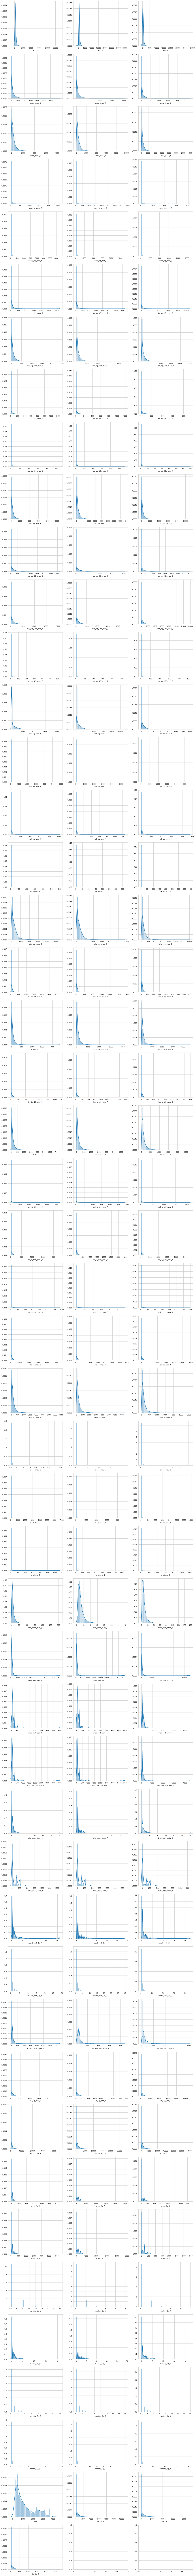

In [65]:
variable_list = [col for col in telecom_final.columns[:-1] if telecom_final[col].dtype!='int8']
row = len(variable_list)//3 + 1
fig, ax = plt.subplots(row, 3, figsize=(15, row*4))

for i in range(len(variable_list)):
    sns.distplot(telecom_final[variable_list[i]], ax=ax[i//3, i%3],kde_kws={'bw':1.5})

plt.tight_layout()
plt.show()

### Bivariate Analysis

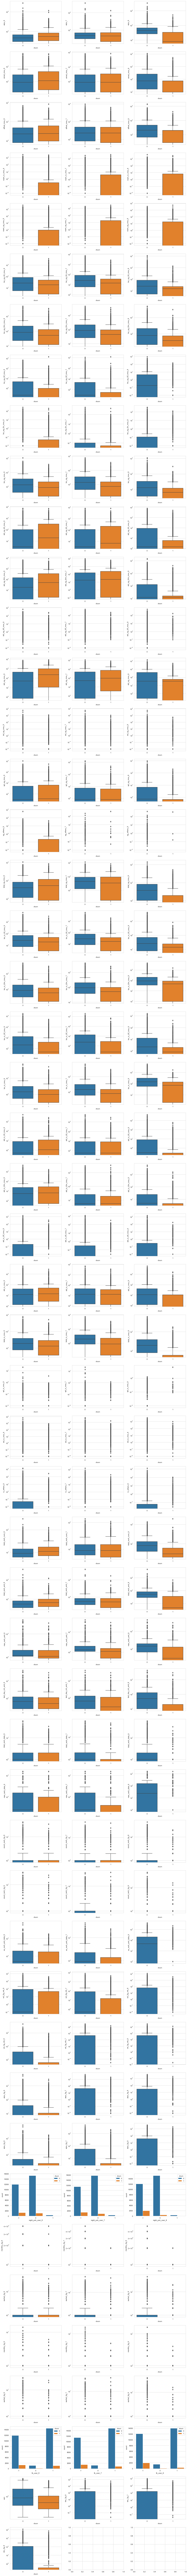

In [66]:
variable_list = telecom_final.columns[:-1]
row = len(variable_list)//3 + 1
fig, ax = plt.subplots(row, 3, figsize=(15, row*4))

for i in range(len(variable_list)):
    if telecom_final[variable_list[i]].dtype=='int8':
        sns.countplot(x=variable_list[i], hue='churn', data=telecom_final, ax=ax[i//3, i%3])
    else:
        sns.boxplot(y=variable_list[i], x='churn', data=telecom_final, ax=ax[i//3, i%3],kde_kws={'bw':1.5})
        ax[i//3, i%3].set(yscale='log')

plt.tight_layout()
plt.show()

### Correlation Analysis

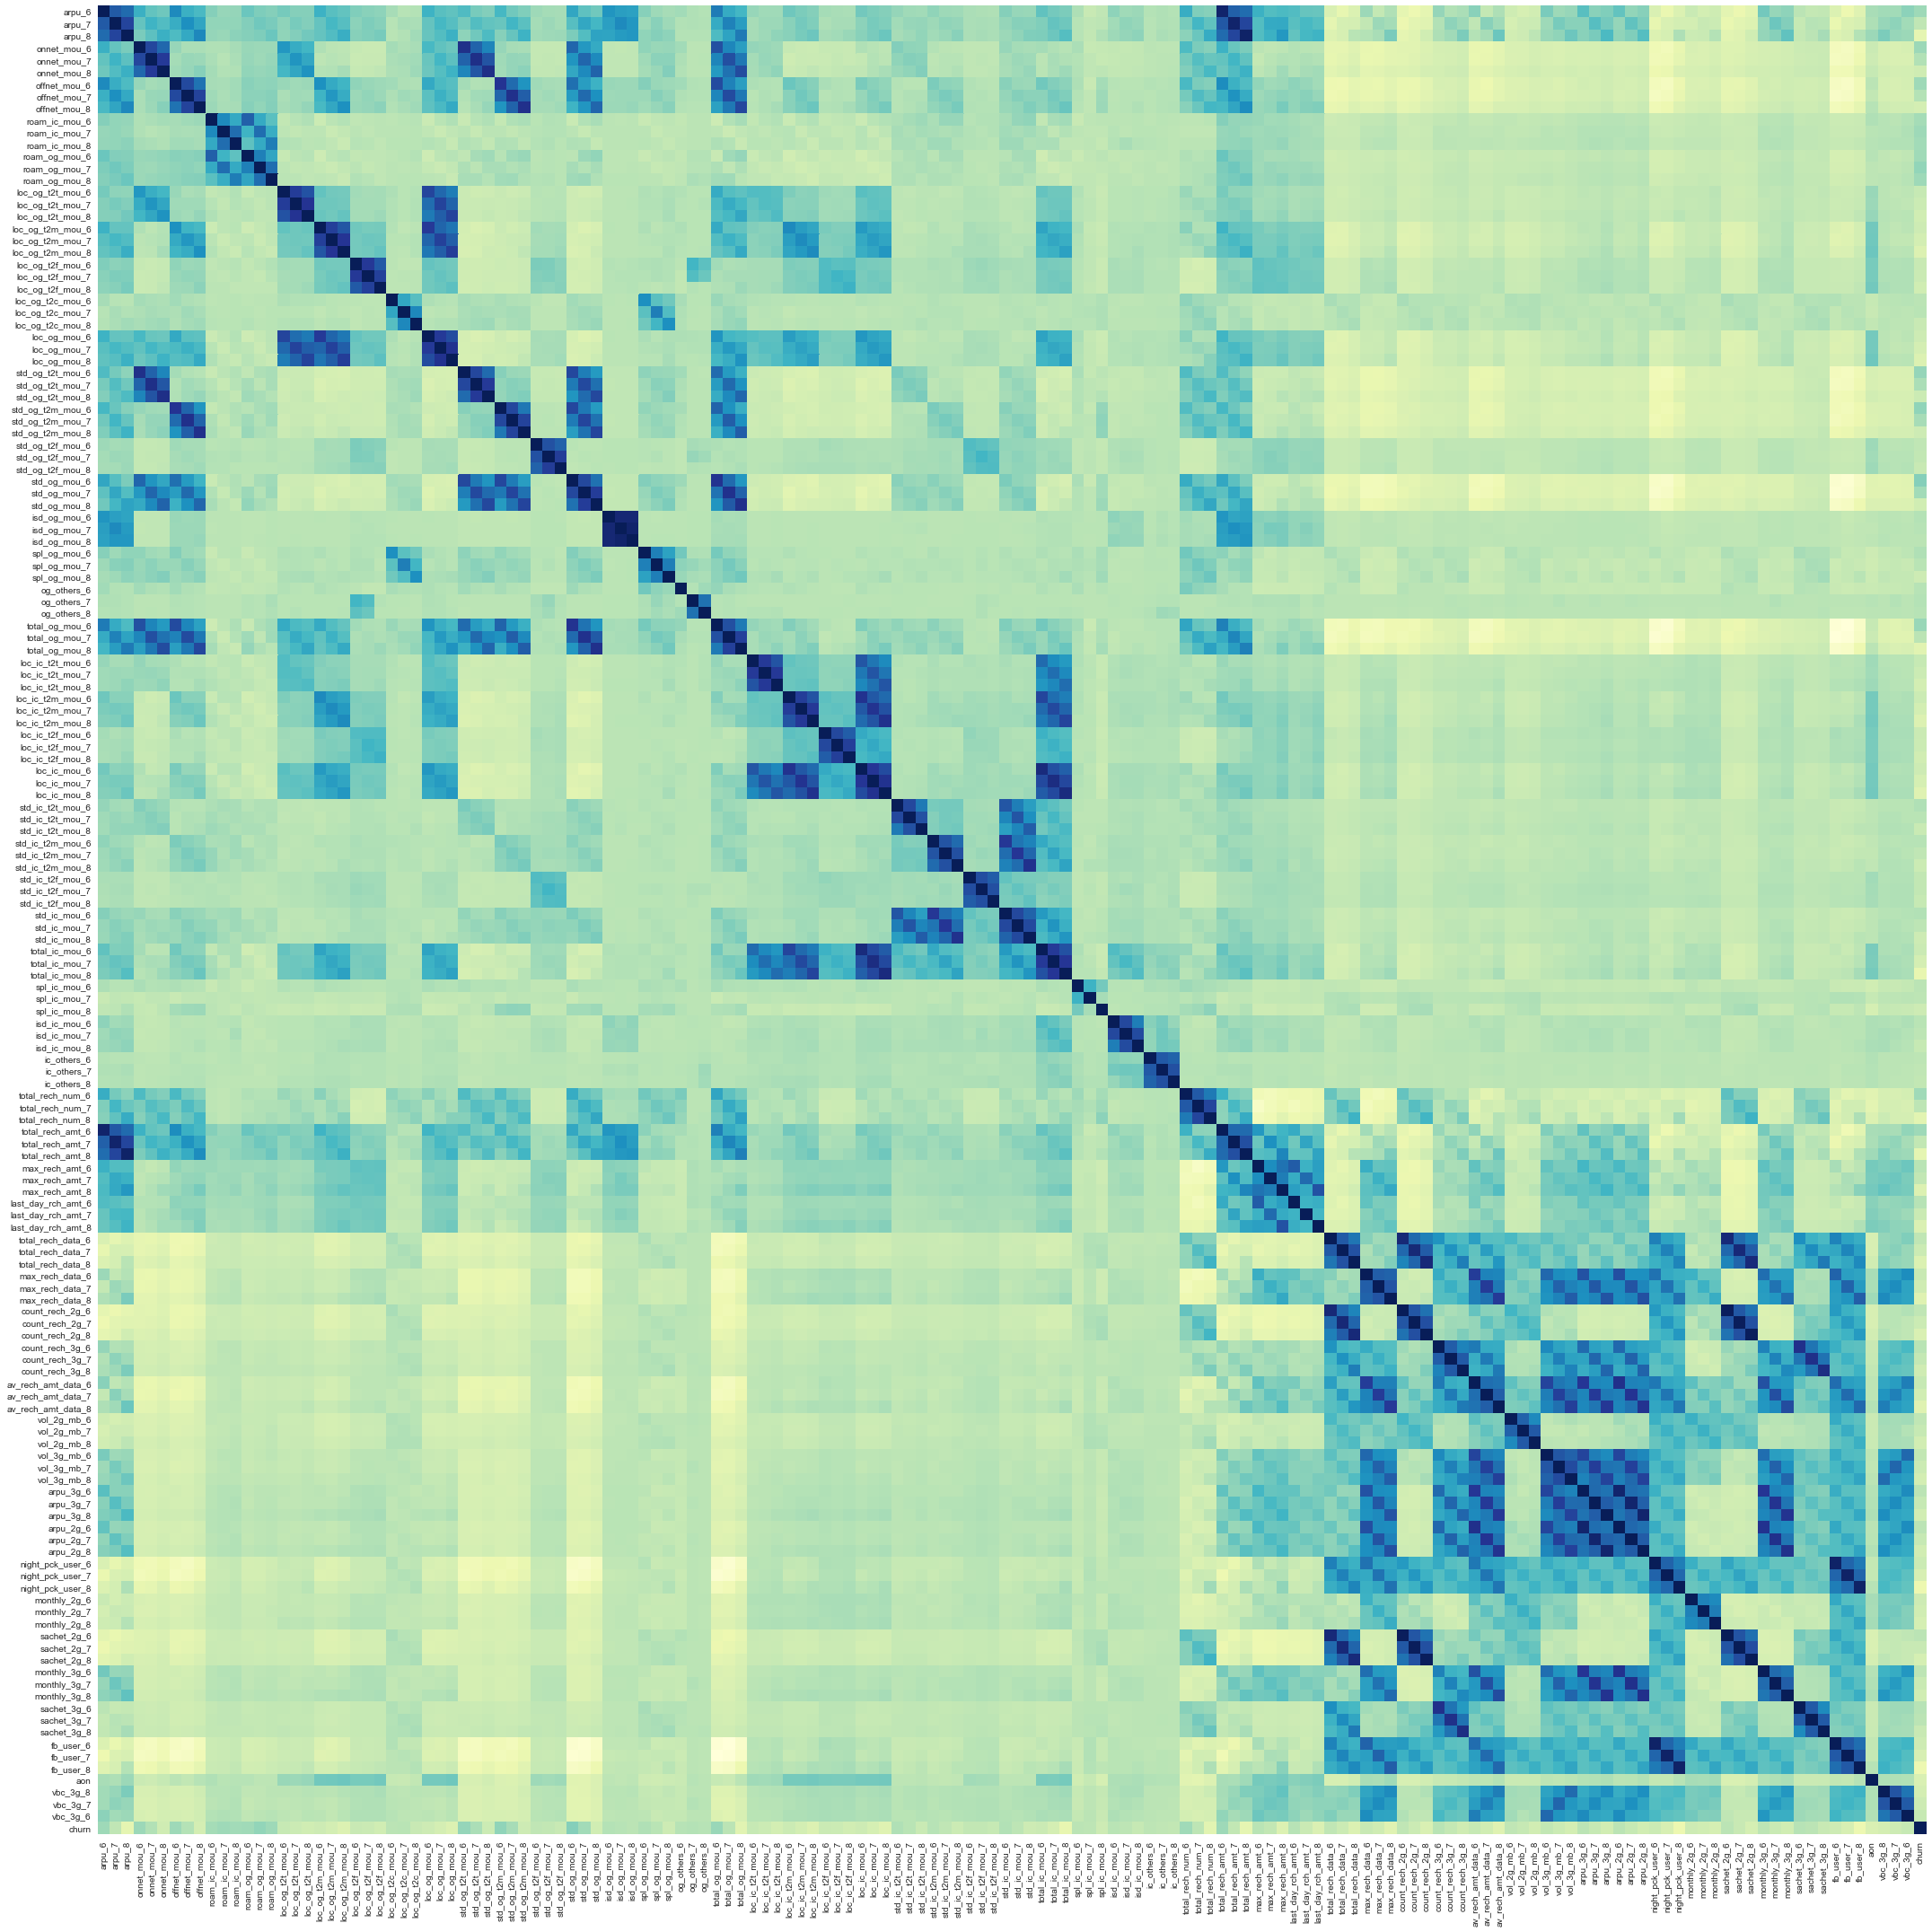

In [67]:
# creating heatmap with correlation coefficients
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(telecom_final.corr(), cmap='YlGnBu', cbar=False)
plt.tight_layout()
plt.show()

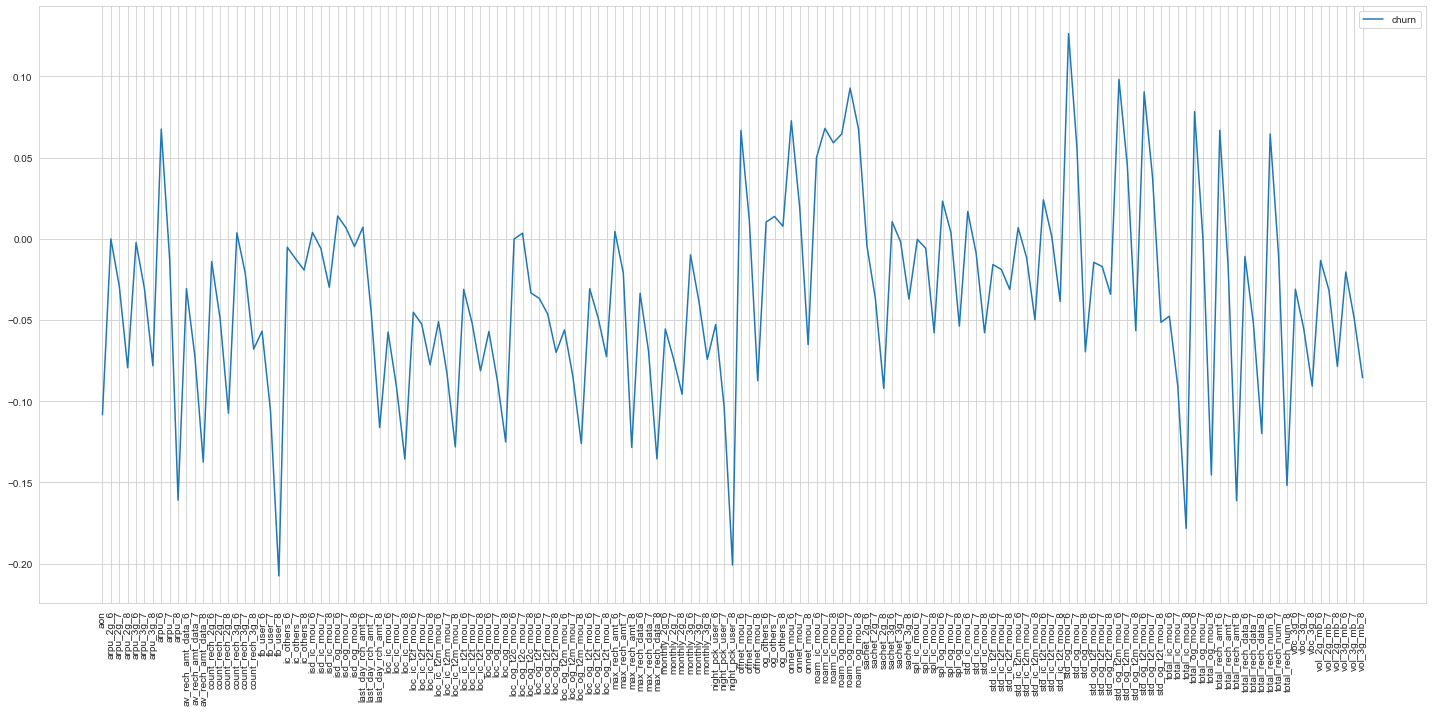

In [68]:
corr_table = telecom_final.corr()[['churn']]

fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=corr_table.iloc[:-1, :])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Observation made during EDA:
- It can be observed from univariate analysis that, all of the independent variables are highly skewed to the right.
- Some clear patterns can be visible for bivariate analysis. E.g.:
    - arpu difference for churn and non-churn customers keeps increasing as months progress.
    - Increasing roaming incoming and outgoing pattern can be visible for churn customers. But for non-churn customers it's mostly 0
    - Local outgoing call to call center is very high in 6th months for churn customers compared to non-churn customers.
    - For most of the KPIs a significnt decrease can be observed over the months for churn customers.
- From Heatmap it can be observed that a high correlation is present within many of the independent variables.
- But when analyzed the correlation of target variable with other independent variable, it's within $\pm$.2.

## Feature Engineering

Below are the new features we'll be creating to use for model preparation:
- Transform data for decrease skewness.
- Difference between total incoming and outgoing call duration.
- Difference between data and call usage.
- Difference between 2g and 3g data usage.
- Difference between average of good phase and action phase for all the KPIs.
- Group AON to different categories.
- Create dummy variable for categorical variables

In [64]:
skew_df = pd.DataFrame(columns=['col', 'skew', 'cuberoot', 'log+1'])
for col in telecom_final.columns[:-1]:
    data_dict = {'col':col, 'skew':stats.skew(telecom_final[col])}
    try:
        data_dict['cuberoot'] = stats.skew(telecom_final[col]**(1/3))
    except:
        data_dict['cuberoot'] = 'X'
    try:
        data_dict['log+1'] = stats.skew(np.log(telecom_final[col] + 1))
    except:
        data_dict['log+1'] = 'X'
    skew_df = skew_df.append(data_dict, ignore_index=True)
    
skew_df.sort_values(by='cuberoot')

col     skew  cuberoot   log+1
95     total_rech_amt_8  17.8631   -0.7848 -2.2261
98       max_rech_amt_8   6.2584   -0.6227 -1.8988
94     total_rech_amt_7  16.0623   -0.5797 -3.2640
93     total_rech_amt_6  13.0917   -0.4980 -3.2853
100  last_day_rch_amt_7   5.8486   -0.2243 -0.9358
99   last_day_rch_amt_6   6.6634   -0.2199 -1.0706
51       total_og_mou_6   2.5273   -0.1955 -1.4113
52       total_og_mou_7   2.6230   -0.1837 -1.3967
53       total_og_mou_8   3.2943   -0.0963 -1.1618
101  last_day_rch_amt_8   7.9697   -0.0594 -0.5916
80       total_ic_mou_8   3.8417   -0.0479 -1.2975
92     total_rech_num_8   2.9299   -0.0376 -0.1752
78       total_ic_mou_6   4.1709    0.0787 -1.3606
97       max_rech_amt_7   5.4445    0.0967 -2.0267
79       total_ic_mou_7   4.1921    0.1100 -1.4067
115  av_rech_amt_data_7   3.8973    0.1502 -0.1258
6          offnet_mou_6   3.4311    0.1700 -1.2225
7          offnet_mou_7   3.6697    0.1917 -1.1999
65         loc_ic_mou_8   4.2541    0.1973 -1.1577
114  av_rech_amt_data_6   5.6906    0.1991 -0.0734
8          offnet_mou_8   5.0849    0.2136 -1.1282
96       max_rech_amt_6   5.5650    0.2140 -1.9285
29         loc_og_mou_8   5.3831    0.2164 -0.9028
106     max_rech_data_7   2.8521    0.2230 -0.0126
20     loc_og_t2m_mou_8   4.1286    0.2412 -0.7384
105     max_rech_data_6   2.7992    0.2504  0.0214
28         loc_og_mou_7   4.4131    0.2537 -0.9585
59     loc_ic_t2m_mou_8   5.0263    0.2593 -0.9559
19     loc_og_t2m_mou_7   4.1046    0.2665 -0.7895
27         loc_og_mou_6   4.5171    0.2728 -0.9223
63         loc_ic_mou_6   4.5886    0.2922 -1.0821
103   total_rech_data_7   3.7845    0.2994  0.8413
18     loc_og_t2m_mou_6   4.3757    0.3080 -0.7537
102   total_rech_data_6   3.9474    0.3186  0.8999
64         loc_ic_mou_7   4.4242    0.3276 -1.1035
116  av_rech_amt_data_8   3.7657    0.3295  0.0484
57     loc_ic_t2m_mou_6   5.0736    0.3461 -0.8987
107     max_rech_data_8   2.7966    0.3697  0.1371
58     loc_ic_t2m_mou_7   5.1186    0.3737 -0.9196
147                 aon   0.9937    0.3749  0.0128
104   total_rech_data_8   4.7437    0.4436  1.0264
91     total_rech_num_7   2.7632    0.4687  0.0428
90     total_rech_num_6   3.7863    0.4939 -0.0020
39         std_og_mou_6   3.1006    0.5650 -0.1041
40         std_og_mou_7   3.2387    0.5651 -0.0909
3           onnet_mou_6   4.0487    0.6311 -0.5276
4           onnet_mou_7   4.2477    0.6531 -0.5011
41         std_og_mou_8   4.1861    0.7434  0.0281
5           onnet_mou_8   5.0851    0.7477 -0.4477
109     count_rech_2g_7   3.4124    0.7623  1.2500
108     count_rech_2g_6   3.5693    0.8051  1.3447
110     count_rech_2g_8   3.7737    0.8904  1.4238
56     loc_ic_t2t_mou_8  10.5744    0.9164 -0.2757
46         spl_og_mou_7  19.4238    0.9205  0.8688
54     loc_ic_t2t_mou_6  11.8779    0.9244 -0.2720
33     std_og_t2m_mou_6   4.6953    0.9431  0.1740
34     std_og_t2m_mou_7   4.9096    0.9612  0.1917
55     loc_ic_t2t_mou_7  11.0775    0.9851 -0.2802
47         spl_og_mou_8  14.4254    0.9930  0.9590
17     loc_og_t2t_mou_8  14.1427    1.0421 -0.1289
75         std_ic_mou_6  12.3268    1.0432  0.1285
45         spl_og_mou_6  15.3742    1.0448  1.0618
76         std_ic_mou_7  13.5740    1.0610  0.1110
15     loc_og_t2t_mou_6   9.5396    1.0691 -0.1464
121         vol_3g_mb_7   7.5283    1.0991  0.6922
60     loc_ic_t2f_mou_6  10.6331    1.1038  0.7690
35     std_og_t2m_mou_8   7.3348    1.1052  0.3063
62     loc_ic_t2f_mou_8  10.9244    1.1063  0.7870
16     loc_og_t2t_mou_7  10.5629    1.1104 -0.1527
77         std_ic_mou_8  13.0789    1.1115  0.1924
61     loc_ic_t2f_mou_7  11.2495    1.1321  0.7595
69     std_ic_t2m_mou_6  14.4917    1.1499  0.4422
31     std_og_t2t_mou_7   4.7058    1.1543  0.5526
30     std_og_t2t_mou_6   4.6524    1.1615  0.5535
70     std_ic_t2m_mou_7  12.6809    1.1835  0.4280
120         vol_3g_mb_6  10.7943    1.1882  0.7814
122         vol_3g_mb_8   8.8107    1.2034  0.7989
117         vol_2g_mb_6   6.3729    1.2102

In [65]:
col_to_transform = list(skew_df[(skew_df.cuberoot.notna()) & (skew_df.col!='aon')].col)
col_to_transform

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 

In [66]:
telecom_final[col_to_transform] = telecom_final[col_to_transform].apply(lambda x: x**(1/3))

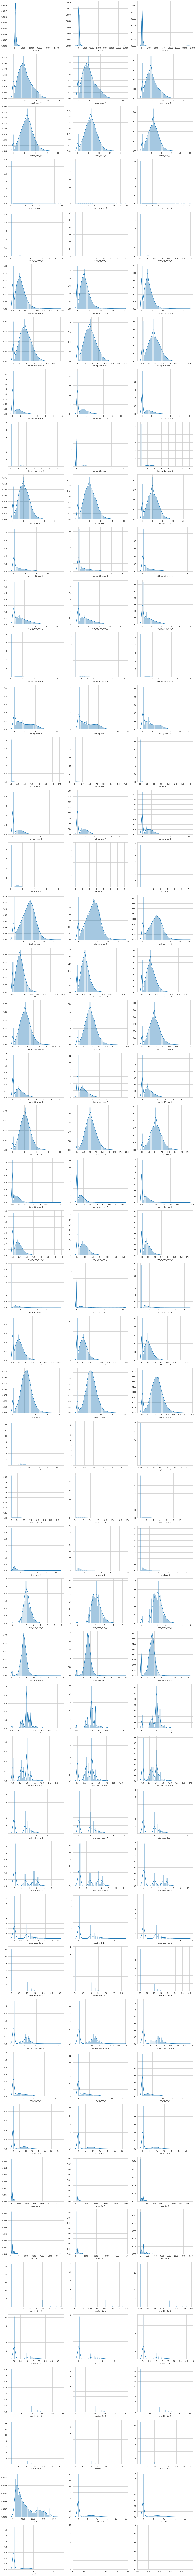

In [72]:
variable_list = [col for col in telecom_final.columns[:-1] if telecom_final[col].dtype!='int8']
row = len(variable_list)//3 + 1
fig, ax = plt.subplots(row, 3, figsize=(15, row*4))

for i in range(len(variable_list)):
    sns.distplot(telecom_final[variable_list[i]], ax=ax[i//3, i%3],kde_kws={'bw':1.5})

plt.tight_layout()
plt.show()

In [67]:
# Difference between total incoming and outgoing call duration
telecom_final['der_ic_og_diff_6'] = telecom_final.total_ic_mou_6 - telecom_final.total_og_mou_6
telecom_final['der_ic_og_diff_7'] = telecom_final.total_ic_mou_7 - telecom_final.total_og_mou_7
telecom_final['der_ic_og_diff_8'] = telecom_final.total_ic_mou_8 - telecom_final.total_og_mou_8

# Difference between data and call usage
telecom_final['der_data_call_diff_6'] = (telecom_final.vol_2g_mb_6+telecom_final.vol_3g_mb_6)-(telecom_final.total_ic_mou_6+telecom_final.total_og_mou_6)
telecom_final['der_data_call_diff_7'] = (telecom_final.vol_2g_mb_7+telecom_final.vol_3g_mb_7)-(telecom_final.total_ic_mou_7+telecom_final.total_og_mou_7)
telecom_final['der_data_call_diff_8'] = (telecom_final.vol_2g_mb_8+telecom_final.vol_3g_mb_8)-(telecom_final.total_ic_mou_8+telecom_final.total_og_mou_8)

# Difference between 2g and 3g data usage
telecom_final['der_2g_3g_diff_6'] = telecom_final.vol_2g_mb_6 - telecom_final.vol_3g_mb_6
telecom_final['der_2g_3g_diff_7'] = telecom_final.vol_2g_mb_7 - telecom_final.vol_3g_mb_7
telecom_final['der_2g_3g_diff_8'] = telecom_final.vol_2g_mb_8 - telecom_final.vol_3g_mb_8

# Difference between average of good phase and action phase for all the KPIs.
col_list = [col for col in telecom_final.columns if '_6' in col]

for col in col_list:
    if col!='fb_user_6' and col!='night_pck_user_6':
        col_base_name = col[:-2]
        col_7_name = col_base_name + '_7'
        col_8_name = col_base_name + '_8'
        col_derived_name = 'der_diff_' + col_base_name
        telecom_final[col_derived_name] = (telecom_final[col] + telecom_final[col_7_name])/2 - telecom_final[col_8_name]

In [68]:
# Group AON to different categories
telecom_final['aon'].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9])

count   30001.0000
mean     1209.3688
std       957.6780
min       180.0000
10%       284.0000
20%       393.0000
30%       495.0000
40%       659.0000
50%       846.0000
60%      1103.0000
70%      1474.0000
80%      2204.0000
90%      2793.0000
max      4321.0000
Name: aon, dtype: float64

In [69]:
# As the range of aon variable is very high, lets divide it to 5 '20 percentile' groups
telecom_final['der_aon_cat'] = pd.qcut(telecom_final['aon'], 5, labels=['1', '2', '3', '4', '5'])

# dropping 'aon' as it won't be useful
telecom_final.drop(columns='aon', axis=1, inplace=True)

# Create dummy variable for fb_user and night_pack_user
col_cat = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'der_aon_cat']
telecom_final[col_cat] = telecom_final[col_cat].astype('category')
telecom_final = pd.concat([telecom_final, pd.get_dummies(telecom_final[col_cat], drop_first=True)], axis=1).drop(
                    columns=col_cat, axis=1)

# putting 'churn' at the end
telecom_final['churn'] = telecom_final.pop('churn')

In [70]:
telecom_final.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.3850  214.8160  213.8030       4.4490       4.4291       0.0000   
1 1069.1800 1349.8500 3171.4800       3.8673       3.7956       3.7394   
2  378.7210  492.2230  137.3620       7.4512       7.0542       3.2736   
3  514.4530  597.7530  637.7600       4.6786       5.0931       4.3992   
4   74.3500  193.8970  366.9660       3.6583       3.7002       3.2262   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0        6.1237        6.1012        0.0000         0.0000         0.0000   
1        7.6825        8.2776        6.8818         2.5319         3.2233   
2        4.5575        4.3202        5.1486         0.0000         0.0000   
3        9.1175        9.6430        9.9443         0.0000         0.0000   
4        4.4039        4.4708        5.9049         0.0000         0.0000   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0         0.0000         0.0000         0.0000         0.0000   
1         3.1629         2.8740         2.3264         3.3637   
2         0.0000         0.0000         0.0000         0.0000   
3         0.0000         0.0000         0.0000         0.0000   
4         0.0000         0.0000         0.0000         0.0000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0            2.9465            2.9541            0.0000            4.3132   
1            3.7179            3.1542            3.4279            6.7579   
2            6.6729            6.0147            2.3202            4.3260   
3            1.6485            1.8331            2.8578            4.5112   
4            3.6583            3.7002            3.2262            4.3610   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0            4.3389            0.0000            0.4791            0.5944   
1            7.6482            5.4545            3.9607            3.8062   
2            4.1326            3.6972            0.0000            0.0000   
3            4.4468            4.7148            0.9086            0.0000   
4            4.3622            5.2962            0.0000            0.0000   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0            0.0000            0.0000            0.0000            0.0000   
1            3.7617            0.0000            0.0000            0.0000   
2            0.0000            0.0000            0.0000            1.9265   
3            1.1647            0.0000            0.0000            0.0000   
4            0.0000            0.0000            0.0000            2.6066   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0        5.0573        5.1010        0.0000            1.4978   
1        7.5017        8.1125        6.3479            1.6261   
2        7.2310        6.6052        3.9799            4.8848   
3        4.5953        4.5483        5.0624            4.6093   
4        5.0905        5.1132        5.6685            0.0000   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            1.4888            0.0000            2.6297            2.6086   
1            2.8558            2.2901            3.6813            3.1668   
2            5.1100            2.8265            2.3922            2.1573   
3            5.0125            3.9534            8.7301            9.3169   
4            0.0000            0.0000            1.3314            1.8518   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0            0.0000            0.0000            0.0000            0.0000   
1            3.6628            1.8814            2.7180            2.5550   
2            4.2301            0.0000            0.0000            0.0000   
3            9.5719            0.0000            0.0000            0.0000   
4            3.4088            0.0000            0.0000            0.0000   



In [71]:
telecom_final.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 221 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   arpu_6                       float64
 1   arpu_7                       float64
 2   arpu_8                       float64
 3   onnet_mou_6                  float64
 4   onnet_mou_7                  float64
 5   onnet_mou_8                  float64
 6   offnet_mou_6                 float64
 7   offnet_mou_7                 float64
 8   offnet_mou_8                 float64
 9   roam_ic_mou_6                float64
 10  roam_ic_mou_7                float64
 11  roam_ic_mou_8                float64
 12  roam_og_mou_6                float64
 13  roam_og_mou_7                float64
 14  roam_og_mou_8                float64
 15  loc_og_t2t_mou_6             float64
 16  loc_og_t2t_mou_7             float64
 17  loc_og_t2t_mou_8             float64
 18  loc_og_t2m_mou_6             float64
 19  loc

In [72]:
telecom_final.shape

(30001, 221)

In [73]:
print(f'total memory used by final data frame: {round(telecom_final.memory_usage(deep=True).sum()/1024**2, 2)}')

total memory used by final data frame: 47.18


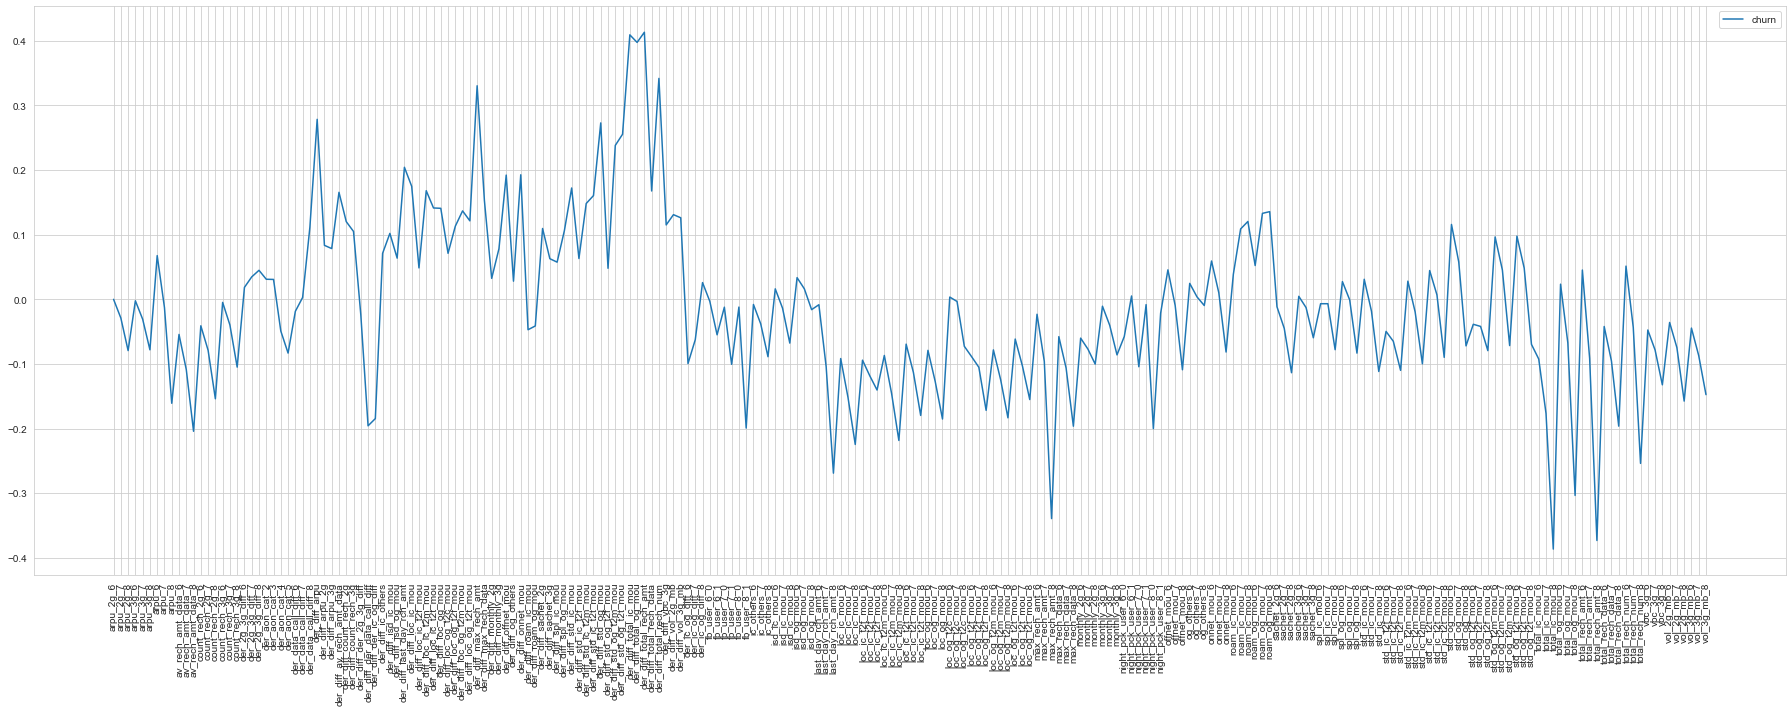

In [81]:
#corr_table.sort_values(by='churn')
corr_table = telecom_final.corr()[['churn']]

fig, ax = plt.subplots(figsize=(25, 10))
sns.lineplot(data=corr_table.iloc[:-1, :])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Below are the outcome from fearure engineering phase:
- Total 220 dependent variables are there to create the model.
- Total data frame size is ~47 MB.
- Correlation coefficient with target variable is higher for some of the newly created features compare to raw features.

# Model Building

We'll be creating 2 different models:
- Model for understanding important variables. Below algorithms will be used for this type of models:
    - Random Forest and Logistic Regression
    - Decision Tree
- Model for accurate prediction. Below algorithns will be used for this type of models:
    - Data pre processing with PCA
    - Logistic Regression
    - Support Vector Machine
    - Random Forest
    - AdaBoost
    - XGBoost
    
## Data Preprocessing for Model Building
In this section we'll proceed with following:
- Create train and test data set.
- Treat outliers in training data: As for this data set outliers are important part of data, we won't try to remove or correct the outliers. We'll try to oversample the outliers (for complete data set without segregating major or minor class) in the data set so that outlier data become significant in the data set.
- Treat class imbalance in training data: We'll use SMOTE to oversample minority class.
- Scale independent variables using standard scaler.

In [140]:
# import necessary modules
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, scorer
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

# creating a constant for setting random_state to 100
RANDOM_STATE = 100

In [291]:
# creating data frame for summerizing all model details
result_df = pd.DataFrame(columns=['model', 'data', 'recall', 'precision', 'f1', 'auc'])

### Train-Test Split

In [75]:
X = telecom_final.iloc[:, :-1]
y = telecom_final.churn

X.shape, y.shape

((30001, 220), (30001,))

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21000, 220), (9001, 220), (21000,), (9001,))

In [77]:
round(y_train.value_counts()/y_train.shape[0], 3)

0   0.9190
1   0.0810
Name: churn, dtype: float64

In [78]:
round(y_test.value_counts()/y_test.shape[0], 3)

0   0.9170
1   0.0830
Name: churn, dtype: float64

Data set is divided to train and test data set and percentage of major class and minor class looks similar in both the set.

### Outlier Treatment

In [79]:
col_list = [col for col in X_train.columns if X_train[col].dtype=='float64']
ol_obs_list_per = set()
ol_obs_list_iqr = set()
ol_obs_list_z = set()

for col in col_list:
    Q05 = X_train[col].quantile(.05)
    Q95 = X_train[col].quantile(.95)
    ol_obs_list_per.update(list(X_train[(X_train[col]<Q05) | (X_train[col]>Q95)].index))
    
    Q1 = X_train[col].quantile(.25)
    Q3 = X_train[col].quantile(.75)
    IQR = Q3 - Q1
    ol_obs_list_iqr.update(list(X_train[(X_train[col]<(Q1 - 1.5*IQR)) | (X_train[col]>(Q3 + 1.5*IQR))].index))
    
    mean = X_train[col].mean()
    std = X_train[col].std()
    ol_obs_list_z.update(list(X_train[(X_train[col]<(mean - 3*std)) | (X_train[col]>(mean + 3*std))].index))
    
print(f'% of observation contains outlier based on Percentile technique: {round(len(ol_obs_list_per)*100/X_train.shape[0], 3)}')
print(f'% of observation contains outlier based on IQR technique: {round(len(ol_obs_list_iqr)*100/X_train.shape[0], 3)}')
print(f'% of observation contains outlier based on Z-Score technique: {round(len(ol_obs_list_z)*100/X_train.shape[0], 3)}')

% of observation contains outlier based on Percentile technique: 97.767
% of observation contains outlier based on IQR technique: 99.457
% of observation contains outlier based on Z-Score technique: 68.157


We've verified percentage of observations containg outlier for atleast 1 observations. Below are the findings:
- Percentile Method: In this method we denote a value as outlier if its less than 5th percentile or more than 95th percentile of that variable. ~98% observations contain outlier data.
- IQR Method: In this method we denote a value as outlier if its less than 1.5 IQR from 1st quantile or more than 1.5 IQR from 3rd quantile. Almost all the observations contain outlier data.
- Z-Score Method: In this method we denote a value as outlier if it's Z-Score is less than -3 or more than 3. ~68% observations contain outlier data.

As observed, very high percentage of observations contain outlier for some of the variables, we won't oversample this data for outlier and use it as it is for model building activities.

### Class Imbalance Treatment - SMOTE Sampling
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [80]:
X_train_resampled, y_train_resampled = SMOTE(sampling_strategy='minority',
                                             random_state=RANDOM_STATE).fit_resample(X_train, y_train)
X_train_resampled.shape, y_train_resampled.shape

((38618, 220), (38618,))

In [81]:
round(y_train_resampled.value_counts()/y_train_resampled.shape[0], 3)

1   0.5000
0   0.5000
Name: churn, dtype: float64

After treating the class imbalance issue with SMOTE, 50% observations are related to churn customers compared to ~8% before applying SMOTE.

### Scaling

We'll use standard scaling to scale all the independent variables.

In [82]:
data = np.zeros((X_train_resampled.shape[0], X_train_resampled.shape[1]))
X_train_resampled_scaled = pd.DataFrame(data=data, columns=X_train_resampled.columns)
col = X_train_resampled_scaled.columns

scaler = StandardScaler()
X_train_resampled_scaled[col] = scaler.fit_transform(X_train_resampled[col])
X_train_resampled_scaled.describe().T

count    mean    std      min     25%  \
arpu_6                      38618.0000 -0.0000 1.0000  -5.9361 -0.5805   
arpu_7                      38618.0000 -0.0000 1.0000  -5.3924 -0.5648   
arpu_8                      38618.0000 -0.0000 1.0000  -1.5051 -0.6969   
onnet_mou_6                 38618.0000  0.0000 1.0000  -1.6662 -0.7107   
onnet_mou_7                 38618.0000 -0.0000 1.0000  -1.6296 -0.7049   
onnet_mou_8                 38618.0000  0.0000 1.0000  -1.5506 -0.6642   
offnet_mou_6                38618.0000  0.0000 1.0000  -2.2252 -0.6403   
offnet_mou_7                38618.0000  0.0000 1.0000  -2.1608 -0.6477   
offnet_mou_8                38618.0000 -0.0000 1.0000  -2.0289 -0.6516   
roam_ic_mou_6               38618.0000  0.0000 1.0000  -0.4816 -0.4816   
roam_ic_mou_7               38618.0000 -0.0000 1.0000  -0.5011 -0.5011   
roam_ic_mou_8               38618.0000 -0.0000 1.0000  -0.5380 -0.5380   
roam_og_mou_6               38618.0000 -0.0000 1.0000  -0.4946 -0.4946   
roam_og_mou_7               38618.0000 -0.0000 1.0000  -0.5382 -0.5382   
roam_og_mou_8               38618.0000  0.0000 1.0000  -0.5535 -0.5535   
loc_og_t2t_mou_6            38618.0000  0.0000 1.0000  -1.4838 -0.6450   
loc_og_t2t_mou_7            38618.0000 -0.0000 1.0000  -1.4373 -0.6525   
loc_og_t2t_mou_8            38618.0000 -0.0000 1.0000  -1.3244 -0.7044   
loc_og_t2m_mou_6            38618.0000  0.0000 1.0000  -1.8173 -0.6578   
loc_og_t2m_mou_7            38618.0000  0.0000 1.0000  -1.7956 -0.6490   
loc_og_t2m_mou_8            38618.0000 -0.0000 1.0000  -1.5924 -0.7078   
loc_og_t2f_mou_6            38618.0000  0.0000 1.0000  -0.7520 -0.7520   
loc_og_t2f_mou_7            38618.0000 -0.0000 1.0000  -0.7460 -0.7460   
loc_og_t2f_mou_8            38618.0000 -0.0000 1.0000  -0.5939 -0.5939   
loc_og_t2c_mou_6            38618.0000  0.0000 1.0000  -0.5506 -0.5506   
loc_og_t2c_mou_7            38618.0000  0.0000 1.0000  -0.5587 -0.5587   
loc_og_t2c_mou_8            38618.0000  0.0000 1.0000  -0.4524 -0.4524   
loc_og_mou_6                38618.0000  0.0000 1.0000  -1.8730 -0.6555   
loc_og_mou_7                38618.0000  0.0000 1.0000  -1.8434 -0.6438   
loc_og_mou_8                38618.0000  0.0000 1.0000  -1.6279 -0.6959   
std_og_t2t_mou_6            38618.0000 -0.0000 1.0000  -0.9604 -0.9604   
std_og_t2t_mou_7            38618.0000  0.0000 1.0000  -0.9224 -0.9224   
std_og_t2t_mou_8            38618.0000 -0.0000 1.0000  -0.7564 -0.7564   
std_og_t2m_mou_6            38618.0000 -0.0000 1.0000  -1.1511 -0.8507   
std_og_t2m_mou_7            38618.0000  0.0000 1.0000  -1.1004 -0.8571   
std_og_t2m_mou_8            38618.0000 -0.0000 1.0000  -0.9752 -0.8806   
std_og_t2f_mou_6            38618.0000 -0.0000 1.0000  -0.3468 -0.3468   
std_og_t2f_mou_7            38618.0000  0.0000 1.0000  -0.3339 -0.3339   
std_og_t2f_mou_8            38618.0000  0.0000 1.0000  -0.2771 -0.2771   
std_og_mou_6                38618.0000 -0.0000 1.0000  -1.2930 -0.8963   
std_og_mou_7                38618.0000 -0.0000 1.0000  -1.2416 -0.8913   
std_og_mou_8                38618.0000 -0.0000 1.0000  -1.0796 -0.8171   
isd_og_mou_6                38618.0000 -0.0000 1.0000  -0.2457 -0.2457   
isd_og_mou_7                38618.0000  0.0000 1.0000  -0.2337 -0.2337   
isd_og_mou_8                38618.0000  0.0000 1.0000  -0.1860 -0.1860   
spl_og_mou_6                38618.0000 -0.0000 1.0000  -0.9744 -0.9744   
spl_og_mou_7                38618.0000 -0.0000 1.0000  -1.0151 -1.0151   
spl_og_mou_8                38618.0000 -0.0000 1.0000  -0.9236 -0.9236   
og_others_6                 38618.0000  0.0000 1.0000  -0.5667 -0.5667   
og_others_7                 38618.0000  0.0000 1.0000  -0.0623 -0.0623   
og_others_8                 38618.0000 -0.0000 1.0000  -0.0469 -0.0469   
total_og_mou_6              38618.0000 -0.0000 1.0000  -1.9443 -0.6799   
total_og_mou_7              38618.0000  0.0000 1.0000  -1.8082 -0.7180   
total_og_mou_8              38618.000

Below are the data set will be used as training data for model building process:
- X_train_resampled_scaled
- y_train_resampled

## Model Type 1: For Understanding Important Variables

### Logistic Regression
Below process will be followed to create model in Logistic Regression:
- As number of variables are very high, it's not possible to start analyzing importance of variables for all of them.
- Random Forest will be used to identify most important variables and then Logistic Regression model will be built using those.
- VIF and p-value analysis will be done to find out final set of variables

In [143]:
# importing necessary modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [144]:
# random forest model with default features to understand importance of different variables
rf = RandomForestClassifier(n_estimators=500, max_features=10, max_samples=.7, oob_score=True,
                            random_state=RANDOM_STATE, n_jobs=4, verbose=1)
rf.fit(X_train_resampled, y_train_resampled)

rf.oob_score_

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   31.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:  1.4min finished


0.9706095603086643

In [145]:
# listing features sorted by importancs
col_list = X_train_resampled.columns
imp_list = rf.feature_importances_

var_df = pd.DataFrame({'features':col_list, 'importance':imp_list*100}).sort_values(
                                                    'importance', ascending=False).reset_index(drop=True)
var_df['cum_importance'] = var_df.importance.cumsum()

var_df

features  importance  cum_importance
0                  roam_og_mou_8      3.4697          3.4697
1        der_diff_total_rech_amt      3.3538          6.8235
2                  roam_ic_mou_8      3.3531         10.1766
3                 total_ic_mou_8      3.2606         13.4372
4          der_diff_total_og_mou      2.6586         16.0958
5          der_diff_total_ic_mou      2.4144         18.5102
6             last_day_rch_amt_8      2.3264         20.8366
7                         arpu_8      2.2441         23.0806
8             night_pck_user_8_0      2.2026         25.2833
9           der_diff_roam_og_mou      2.0257         27.3089
10              total_rech_amt_8      1.9888         29.2977
11                total_og_mou_8      1.7556         31.0533
12         der_diff_max_rech_amt      1.7153         32.7686
13             total_rech_data_8      1.6716         34.4402
14                max_rech_amt_8      1.6670         36.1071
15          der_diff_roam_ic_mou      1.6206         37.7277
16                 der_diff_arpu      1.5913         39.3190
17     der_diff_last_day_rch_amt      1.5786         40.8976
18                  loc_ic_mou_8      1.4922         42.3897
19                   fb_user_8_1      1.4668         43.8565
20               max_rech_data_8      1.3452         45.2018
21                  loc_og_mou_8      1.2686         46.4703
22            av_rech_amt_data_8      1.2665         47.7369
23       der_diff_total_rech_num      1.1788         48.9157
24              loc_ic_t2t_mou_8      1.1570         50.0727
25          der_data_call_diff_8      1.0759         51.1486
26               count_rech_2g_8      1.0757         52.2243
27              loc_ic_t2m_mou_8      1.0646         53.2889
28              loc_og_t2m_mou_8      1.0348         54.3237
29              total_rech_num_8      0.9128         55.2365
30                 roam_og_mou_7      0.8401         56.0766
31              loc_og_t2t_mou_8      0.8238         56.9003
32              loc_ic_t2f_mou_8      0.8144         57.7147
33                 roam_ic_mou_7      0.7365         58.4513
34       der_diff_std_og_t2t_mou      0.6808         59.1321
35                   vol_2g_mb_8      0.5992         59.7312
36           der_diff_std_og_mou      0.5747         60.3059
37              loc_og_t2f_mou_8      0.5722         60.8782
38              std_og_t2t_mou_8      0.5498         61.4279
39           der_diff_loc_ic_mou      0.5386         61.9666
40       der_diff_loc_ic_t2m_mou      0.5248         62.4913
41                total_ic_mou_7      0.4804         62.9718
42              std_og_t2t_mou_6      0.4693         63.4411
43              std_ic_t2m_mou_8      0.4685         63.9096
44           der_diff_offnet_mou      0.4635         64.3731
45                   vol_3g_mb_8      0.4349         64.8080
46              std_og_t2t_mou_7      0.4255         65.2335
47                  std_ic_mou_8      0.4227         65.6562
48              std_og_t2m_mou_8      0.4173         66.0735
49   der_diff_der_data_call_diff      0.4171         66.4906
50                  spl_og_mou_7      0.4111         66.9018
51                total_ic_mou_6      0.4107         67.3124
52              der_ic_og_diff_8      0.4074         67.7199
53       der_diff_std_og_t2m_mou      0.4006         68.1205
54              std_ic_t2t_mou_8      0.3976         68.5181
55                total_og_mou_7      0.3807         68.8988
56                  offnet_mou_8      0.3772         69.2759
57              std_ic_t2t_mou_7      0.3676         69.6435
58                   onnet_mou_8      0.3666         70.0101
59                  spl_og_mou_8      0.3649         70.3750
60                  std_og_mou_8      0.3570         70.7320
61              std_ic_t2t_mou_6      0.3557         71.0877
62       der_diff_std_ic_t2t_mou      0.3544         71.4421
63                   sachet_2g_8      0.3514         71.7934
64            der_diff_vol_2g_mb      0.3432         72.136

In [146]:
# first model using top 20 most important features which togeter represent ~45% importance
selected_col = list(var_df.features[:20])

X_train_lr = X_train_resampled_scaled.loc[:, selected_col]
X_train_lr_sm = sm.add_constant(X_train_lr)

model_lr_1 = sm.GLM(y_train_resampled, X_train_lr_sm, family=sm.families.Binomial()).fit()
model_lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38597
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12758.
Date:                Mon, 18 May 2020   Deviance:                       25516.
Time:                        17:21:47   Pearson chi2:                 3.19e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0018      0.018      0.096      0.923      -0.034       0.038
roam_og_mou_8                 0.3882      0.052      7.410      0.000       0.286       0.491
der_diff_total_rech_amt       0.6233      0.096      6.472      0.000       0.435       0.812
roam_ic_mou_8                 0.0870      0.051      1.701      0.089      -0.013       0.187
total_ic_mou_8               -1.5811      0.043    -36.823      0.000      -1.665      -1.497
der_diff_total_og_mou        -0.3002      0.045     -6.660      0.000      -0.389      -0.212
der_diff_total_ic_mou         0.3351      0.036      9.385      0.000       0.265       0.405
last_day_rch_amt_8           -0.6537      0.036    -18.238      0.000      -0.724      -0.583
arpu_8                        0.3198      0.044      7.307      0.000       0.234       0.406
night_pck_user_8_0           -1.0823      0.039    -27.965      0.000      -1.158      -1.006
der_diff_roam_og_mou         -0.2978      0.048     -6.266      0.000      -0.391      -0.205
total_rech_amt_8             -0.2895      0.096     -3.024      0.002      -0.477      -0.102
total_og_mou_8               -0.4456      0.039    -11.509      0.000      -0.521      -0.370
der_diff_max_rech_amt        -0.5395      0.052    -10.442      0.000      -0.641      -0.438
total_rech_data_8             0.7374      0.033     22.332      0.000       0.673       0.802
max_rech_amt_8                0.3414      0.048      7.040      0.000       0.246       0.436
der_diff_roam_ic_mou          0.1195      0.047      2.570      0.010       0.028       0.211
der_diff_arpu                 0.2778      0.041      6.818      0.000       0.198       0.358
der_diff_last_day_rch_amt    -0.0819      0.031     -2.650      0.008      -0.143      -0.021
loc_ic_mou_8                  0.5426      0.032     16.979      0.000       0.480       0.605
fb_user_8_1                  -0.7172      0.037    -19.517      0.000      -0.789      -0.645
=============================================================================================
"""

In [147]:
# dropping roam_ic_mou_8 as p value is highest for this variable
X_train_lr.drop(columns=['roam_ic_mou_8'], axis=1, inplace=True)
X_train_lr_sm = sm.add_constant(X_train_lr)

model_lr_2 = sm.GLM(y_train_resampled, X_train_lr_sm, family=sm.families.Binomial()).fit()
model_lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38598
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12760.
Date:                Mon, 18 May 2020   Deviance:                       25519.
Time:                        17:21:49   Pearson chi2:                 2.88e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0018      0.018      0.099      0.921      -0.034       0.038
roam_og_mou_8                 0.4691      0.022     21.052      0.000       0.425       0.513
der_diff_total_rech_amt       0.6165      0.096      6.410      0.000       0.428       0.805
total_ic_mou_8               -1.5694      0.042    -37.062      0.000      -1.652      -1.486
der_diff_total_og_mou        -0.3045      0.045     -6.760      0.000      -0.393      -0.216
der_diff_total_ic_mou         0.3406      0.036      9.584      0.000       0.271       0.410
last_day_rch_amt_8           -0.6537      0.036    -18.243      0.000      -0.724      -0.583
arpu_8                        0.3185      0.044      7.270      0.000       0.233       0.404
night_pck_user_8_0           -1.0828      0.039    -27.972      0.000      -1.159      -1.007
der_diff_roam_og_mou         -0.2422      0.035     -7.007      0.000      -0.310      -0.174
total_rech_amt_8             -0.2951      0.096     -3.085      0.002      -0.483      -0.108
total_og_mou_8               -0.4526      0.039    -11.751      0.000      -0.528      -0.377
der_diff_max_rech_amt        -0.5353      0.052    -10.370      0.000      -0.636      -0.434
total_rech_data_8             0.7367      0.033     22.307      0.000       0.672       0.801
max_rech_amt_8                0.3480      0.048      7.202      0.000       0.253       0.443
der_diff_roam_ic_mou          0.0631      0.033      1.935      0.053      -0.001       0.127
der_diff_arpu                 0.2795      0.041      6.859      0.000       0.200       0.359
der_diff_last_day_rch_amt    -0.0821      0.031     -2.655      0.008      -0.143      -0.021
loc_ic_mou_8                  0.5384      0.032     16.907      0.000       0.476       0.601
fb_user_8_1                  -0.7169      0.037    -19.506      0.000      -0.789      -0.645
=============================================================================================
"""

In [148]:
# dropping der_diff_roam_ic_mou as p value is highest for this variable
X_train_lr.drop(columns=['der_diff_roam_ic_mou'], axis=1, inplace=True)
X_train_lr_sm = sm.add_constant(X_train_lr)

model_lr_3 = sm.GLM(y_train_resampled, X_train_lr_sm, family=sm.families.Binomial()).fit()
model_lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38599
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12761.
Date:                Mon, 18 May 2020   Deviance:                       25523.
Time:                        17:21:50   Pearson chi2:                 2.59e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0006      0.018      0.035      0.972      -0.035       0.037
roam_og_mou_8                 0.4677      0.022     20.998      0.000       0.424       0.511
der_diff_total_rech_amt       0.6215      0.096      6.466      0.000       0.433       0.810
total_ic_mou_8               -1.5738      0.042    -37.228      0.000      -1.657      -1.491
der_diff_total_og_mou        -0.3091      0.045     -6.870      0.000      -0.397      -0.221
der_diff_total_ic_mou         0.3400      0.036      9.573      0.000       0.270       0.410
last_day_rch_amt_8           -0.6519      0.036    -18.200      0.000      -0.722      -0.582
arpu_8                        0.3162      0.044      7.238      0.000       0.231       0.402
night_pck_user_8_0           -1.0851      0.039    -28.035      0.000      -1.161      -1.009
der_diff_roam_og_mou         -0.1897      0.021     -8.852      0.000      -0.232      -0.148
total_rech_amt_8             -0.2886      0.096     -3.021      0.003      -0.476      -0.101
total_og_mou_8               -0.4511      0.038    -11.723      0.000      -0.527      -0.376
der_diff_max_rech_amt        -0.5368      0.052    -10.406      0.000      -0.638      -0.436
total_rech_data_8             0.7377      0.033     22.334      0.000       0.673       0.802
max_rech_amt_8                0.3456      0.048      7.155      0.000       0.251       0.440
der_diff_arpu                 0.2775      0.041      6.818      0.000       0.198       0.357
der_diff_last_day_rch_amt    -0.0799      0.031     -2.585      0.010      -0.140      -0.019
loc_ic_mou_8                  0.5426      0.032     17.087      0.000       0.480       0.605
fb_user_8_1                  -0.7168      0.037    -19.496      0.000      -0.789      -0.645
=============================================================================================
"""

In [149]:
vif = pd.DataFrame()
vif['Features'] = X_train_lr.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_lr.values, i), 2) for i in range(X_train_lr.shape[1])]
vif.sort_values(by='VIF', ascending=False)

Features     VIF
9            total_rech_amt_8 31.5700
1     der_diff_total_rech_amt 30.4300
13             max_rech_amt_8 10.1100
11      der_diff_max_rech_amt 10.0200
7          night_pck_user_8_0  7.4200
3       der_diff_total_og_mou  6.4500
10             total_og_mou_8  6.2100
17                fb_user_8_1  6.1500
2              total_ic_mou_8  6.0900
5          last_day_rch_amt_8  5.2800
12          total_rech_data_8  4.6700
14              der_diff_arpu  4.4100
6                      arpu_8  4.0200
4       der_diff_total_ic_mou  3.8300
15  der_diff_last_day_rch_amt  3.7700
16               loc_ic_mou_8  2.9100
0               roam_og_mou_8  2.1800
8        der_diff_roam_og_mou  1.7300

In [150]:
# dropping total_rech_amt_8 as vif is highest for this variable
X_train_lr.drop(columns=['total_rech_amt_8'], axis=1, inplace=True)
X_train_lr_sm = sm.add_constant(X_train_lr)

model_lr_4 = sm.GLM(y_train_resampled, X_train_lr_sm, family=sm.families.Binomial()).fit()
model_lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38600
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12766.
Date:                Mon, 18 May 2020   Deviance:                       25532.
Time:                        17:21:55   Pearson chi2:                 8.84e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0030      0.018     -0.162      0.872      -0.039       0.033
roam_og_mou_8                 0.4559      0.022     20.747      0.000       0.413       0.499
der_diff_total_rech_amt       0.8213      0.070     11.750      0.000       0.684       0.958
total_ic_mou_8               -1.5782      0.042    -37.393      0.000      -1.661      -1.495
der_diff_total_og_mou        -0.3464      0.043     -7.995      0.000      -0.431      -0.261
der_diff_total_ic_mou         0.3360      0.035      9.465      0.000       0.266       0.406
last_day_rch_amt_8           -0.6758      0.035    -19.301      0.000      -0.744      -0.607
arpu_8                        0.2274      0.032      7.198      0.000       0.165       0.289
night_pck_user_8_0           -1.0766      0.039    -27.893      0.000      -1.152      -1.001
der_diff_roam_og_mou         -0.1963      0.021     -9.206      0.000      -0.238      -0.155
total_og_mou_8               -0.5166      0.032    -16.196      0.000      -0.579      -0.454
der_diff_max_rech_amt        -0.5633      0.051    -11.035      0.000      -0.663      -0.463
total_rech_data_8             0.7249      0.033     22.142      0.000       0.661       0.789
max_rech_amt_8                0.2800      0.043      6.496      0.000       0.195       0.364
der_diff_arpu                 0.2144      0.034      6.216      0.000       0.147       0.282
der_diff_last_day_rch_amt    -0.0943      0.031     -3.083      0.002      -0.154      -0.034
loc_ic_mou_8                  0.5424      0.032     17.120      0.000       0.480       0.604
fb_user_8_1                  -0.7229      0.037    -19.665      0.000      -0.795      -0.651
=============================================================================================
"""

In [151]:
vif = pd.DataFrame()
vif['Features'] = X_train_lr.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_lr.values, i), 2) for i in range(X_train_lr.shape[1])]
vif.sort_values(by='VIF', ascending=False)

Features     VIF
1     der_diff_total_rech_amt 18.7800
10      der_diff_max_rech_amt  9.7600
12             max_rech_amt_8  7.5800
7          night_pck_user_8_0  7.3500
16                fb_user_8_1  6.1400
2              total_ic_mou_8  6.0700
3       der_diff_total_og_mou  5.8600
5          last_day_rch_amt_8  5.0300
11          total_rech_data_8  4.5200
9              total_og_mou_8  4.0000
4       der_diff_total_ic_mou  3.8300
13              der_diff_arpu  3.7300
14  der_diff_last_day_rch_amt  3.6800
15               loc_ic_mou_8  2.9100
6                      arpu_8  2.5100
0               roam_og_mou_8  2.0300
8        der_diff_roam_og_mou  1.6900

In [152]:
# dropping der_diff_total_rech_amt as vif is highest for this variable
X_train_lr.drop(columns=['der_diff_total_rech_amt'], axis=1, inplace=True)
X_train_lr_sm = sm.add_constant(X_train_lr)

model_lr_5 = sm.GLM(y_train_resampled, X_train_lr_sm, family=sm.families.Binomial()).fit()
model_lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38601
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12834.
Date:                Mon, 18 May 2020   Deviance:                       25669.
Time:                        17:21:59   Pearson chi2:                 9.14e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0017      0.018      0.090      0.928      -0.034       0.038
roam_og_mou_8                 0.4535      0.022     20.645      0.000       0.410       0.497
total_ic_mou_8               -1.5540      0.042    -36.828      0.000      -1.637      -1.471
der_diff_total_og_mou        -0.1689      0.041     -4.160      0.000      -0.249      -0.089
der_diff_total_ic_mou         0.3572      0.035     10.090      0.000       0.288       0.427
last_day_rch_amt_8           -0.6640      0.035    -18.940      0.000      -0.733      -0.595
arpu_8                        0.2356      0.032      7.422      0.000       0.173       0.298
night_pck_user_8_0           -1.0578      0.039    -27.450      0.000      -1.133      -0.982
der_diff_roam_og_mou         -0.1670      0.021     -7.905      0.000      -0.208      -0.126
total_og_mou_8               -0.5342      0.032    -16.749      0.000      -0.597      -0.472
der_diff_max_rech_amt        -0.1442      0.037     -3.933      0.000      -0.216      -0.072
total_rech_data_8             0.6827      0.032     21.106      0.000       0.619       0.746
max_rech_amt_8                0.2206      0.043      5.130      0.000       0.136       0.305
der_diff_arpu                 0.4317      0.031     13.968      0.000       0.371       0.492
der_diff_last_day_rch_amt    -0.0356      0.030     -1.177      0.239      -0.095       0.024
loc_ic_mou_8                  0.5234      0.032     16.521      0.000       0.461       0.585
fb_user_8_1                  -0.7400      0.037    -20.102      0.000      -0.812      -0.668
=============================================================================================
"""

In [153]:
# dropping der_diff_last_day_rch_amt as p value is highest for this variable
X_train_lr.drop(columns=['der_diff_last_day_rch_amt'], axis=1, inplace=True)
X_train_lr_sm = sm.add_constant(X_train_lr)

model_lr_6 = sm.GLM(y_train_resampled, X_train_lr_sm, family=sm.families.Binomial()).fit()
model_lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38602
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12835.
Date:                Mon, 18 May 2020   Deviance:                       25670.
Time:                        17:22:00   Pearson chi2:                 9.10e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0015      0.018      0.084      0.933      -0.034       0.037
roam_og_mou_8             0.4529      0.022     20.622      0.000       0.410       0.496
total_ic_mou_8           -1.5531      0.042    -36.827      0.000      -1.636      -1.470
der_diff_total_og_mou    -0.1686      0.041     -4.153      0.000      -0.248      -0.089
der_diff_total_ic_mou     0.3578      0.035     10.107      0.000       0.288       0.427
last_day_rch_amt_8       -0.6303      0.020    -31.273      0.000      -0.670      -0.591
arpu_8                    0.2339      0.032      7.393      0.000       0.172       0.296
night_pck_user_8_0       -1.0580      0.039    -27.454      0.000      -1.134      -0.983
der_diff_roam_og_mou     -0.1670      0.021     -7.911      0.000      -0.208      -0.126
total_og_mou_8           -0.5367      0.032    -16.868      0.000      -0.599      -0.474
der_diff_max_rech_amt    -0.1572      0.035     -4.499      0.000      -0.226      -0.089
total_rech_data_8         0.6848      0.032     21.197      0.000       0.621       0.748
max_rech_amt_8            0.2041      0.041      5.016      0.000       0.124       0.284
der_diff_arpu             0.4287      0.031     13.925      0.000       0.368       0.489
loc_ic_mou_8              0.5226      0.032     16.507      0.000       0.461       0.585
fb_user_8_1              -0.7410      0.037    -20.128      0.000      -0.813      -0.669
=========================================================================================
"""

In [154]:
vif = pd.DataFrame()
vif['Features'] = X_train_lr.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_lr.values, i), 2) for i in range(X_train_lr.shape[1])]
vif.sort_values(by='VIF', ascending=False)

Features    VIF
6      night_pck_user_8_0 7.3300
11         max_rech_amt_8 6.6100
14            fb_user_8_1 6.1300
1          total_ic_mou_8 6.0600
2   der_diff_total_og_mou 4.8400
9   der_diff_max_rech_amt 4.7600
10      total_rech_data_8 4.4400
8          total_og_mou_8 3.9800
3   der_diff_total_ic_mou 3.8200
13           loc_ic_mou_8 2.9000
12          der_diff_arpu 2.6700
5                  arpu_8 2.4900
0           roam_og_mou_8 2.0200
4      last_day_rch_amt_8 1.9100
7    der_diff_roam_og_mou 1.6700

In [155]:
# dropping night_pck_user_8_0 as vif is highest for this variable
X_train_lr.drop(columns=['night_pck_user_8_0'], axis=1, inplace=True)
X_train_lr_sm = sm.add_constant(X_train_lr)

model_lr_7 = sm.GLM(y_train_resampled, X_train_lr_sm, family=sm.families.Binomial()).fit()
model_lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38603
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13227.
Date:                Mon, 18 May 2020   Deviance:                       26454.
Time:                        17:22:04   Pearson chi2:                 5.60e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0218      0.018      1.210      0.226      -0.013       0.057
roam_og_mou_8             0.4267      0.022     19.694      0.000       0.384       0.469
total_ic_mou_8           -1.4424      0.041    -35.063      0.000      -1.523      -1.362
der_diff_total_og_mou    -0.2150      0.040     -5.338      0.000      -0.294      -0.136
der_diff_total_ic_mou     0.3679      0.035     10.526      0.000       0.299       0.436
last_day_rch_amt_8       -0.6076      0.020    -30.859      0.000      -0.646      -0.569
arpu_8                    0.3179      0.033      9.759      0.000       0.254       0.382
der_diff_roam_og_mou     -0.1900      0.021     -9.133      0.000      -0.231      -0.149
total_og_mou_8           -0.5990      0.032    -18.872      0.000      -0.661      -0.537
der_diff_max_rech_amt    -0.2247      0.034     -6.513      0.000      -0.292      -0.157
total_rech_data_8         0.1950      0.026      7.572      0.000       0.145       0.245
max_rech_amt_8            0.0577      0.040      1.443      0.149      -0.021       0.136
der_diff_arpu             0.4729      0.031     15.394      0.000       0.413       0.533
loc_ic_mou_8              0.4377      0.031     14.133      0.000       0.377       0.498
fb_user_8_1              -1.2379      0.030    -41.036      0.000      -1.297      -1.179
=========================================================================================
"""

In [156]:
# dropping max_rech_amt_8 as p value is highest for this variable
X_train_lr.drop(columns=['max_rech_amt_8'], axis=1, inplace=True)
X_train_lr_sm = sm.add_constant(X_train_lr)

model_lr_8 = sm.GLM(y_train_resampled, X_train_lr_sm, family=sm.families.Binomial()).fit()
model_lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38604
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13228.
Date:                Mon, 18 May 2020   Deviance:                       26456.
Time:                        17:22:05   Pearson chi2:                 1.26e+07
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0247      0.018      1.378      0.168      -0.010       0.060
roam_og_mou_8             0.4297      0.022     19.930      0.000       0.387       0.472
total_ic_mou_8           -1.4364      0.041    -35.066      0.000      -1.517      -1.356
der_diff_total_og_mou    -0.2205      0.040     -5.497      0.000      -0.299      -0.142
der_diff_total_ic_mou     0.3678      0.035     10.527      0.000       0.299       0.436
last_day_rch_amt_8       -0.6009      0.019    -31.392      0.000      -0.638      -0.563
arpu_8                    0.3339      0.031     10.884      0.000       0.274       0.394
der_diff_roam_og_mou     -0.1898      0.021     -9.121      0.000      -0.231      -0.149
total_og_mou_8           -0.6021      0.032    -19.010      0.000      -0.664      -0.540
der_diff_max_rech_amt    -0.2612      0.023    -11.126      0.000      -0.307      -0.215
total_rech_data_8         0.1919      0.026      7.489      0.000       0.142       0.242
der_diff_arpu             0.4827      0.030     16.091      0.000       0.424       0.542
loc_ic_mou_8              0.4380      0.031     14.125      0.000       0.377       0.499
fb_user_8_1              -1.2312      0.030    -41.319      0.000      -1.290      -1.173
=========================================================================================
"""

In [157]:
vif = pd.DataFrame()
vif['Features'] = X_train_lr.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_lr.values, i), 2) for i in range(X_train_lr.shape[1])]
vif.sort_values(by='VIF', ascending=False)

Features    VIF
1          total_ic_mou_8 5.8200
2   der_diff_total_og_mou 4.8000
7          total_og_mou_8 3.9600
3   der_diff_total_ic_mou 3.8100
12            fb_user_8_1 3.5800
9       total_rech_data_8 3.3500
11           loc_ic_mou_8 2.8500
10          der_diff_arpu 2.5600
8   der_diff_max_rech_amt 2.4500
5                  arpu_8 2.2600
0           roam_og_mou_8 1.9600
4      last_day_rch_amt_8 1.7200
6    der_diff_roam_og_mou 1.6700

In [158]:
# dropping total_ic_mou_8 as vif is highest for this variable
X_train_lr.drop(columns=['total_ic_mou_8'], axis=1, inplace=True)
X_train_lr_sm = sm.add_constant(X_train_lr)

model_lr_9 = sm.GLM(y_train_resampled, X_train_lr_sm, family=sm.families.Binomial()).fit()
model_lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38605
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13917.
Date:                Mon, 18 May 2020   Deviance:                       27835.
Time:                        17:22:08   Pearson chi2:                 1.86e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0160      0.017     -0.958      0.338      -0.049       0.017
roam_og_mou_8             0.3586      0.021     16.758      0.000       0.317       0.400
der_diff_total_og_mou    -0.3906      0.038    -10.399      0.000      -0.464      -0.317
der_diff_total_ic_mou     0.6704      0.033     20.428      0.000       0.606       0.735
last_day_rch_amt_8       -0.6572      0.019    -34.685      0.000      -0.694      -0.620
arpu_8                    0.4271      0.030     14.366      0.000       0.369       0.485
der_diff_roam_og_mou     -0.2062      0.020    -10.206      0.000      -0.246      -0.167
total_og_mou_8           -1.1674      0.028    -41.905      0.000      -1.222      -1.113
der_diff_max_rech_amt    -0.1904      0.023     -8.329      0.000      -0.235      -0.146
total_rech_data_8         0.1193      0.025      4.711      0.000       0.070       0.169
der_diff_arpu             0.5012      0.029     17.340      0.000       0.445       0.558
loc_ic_mou_8             -0.3212      0.020    -15.906      0.000      -0.361      -0.282
fb_user_8_1              -1.2439      0.029    -42.950      0.000      -1.301      -1.187
=========================================================================================
"""

In [159]:
vif = pd.DataFrame()
vif['Features'] = X_train_lr.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_lr.values, i), 2) for i in range(X_train_lr.shape[1])]
vif.sort_values(by='VIF', ascending=False)

Features    VIF
1   der_diff_total_og_mou 4.6400
11            fb_user_8_1 3.5500
2   der_diff_total_ic_mou 3.4400
8       total_rech_data_8 3.3400
6          total_og_mou_8 2.8600
9           der_diff_arpu 2.5600
7   der_diff_max_rech_amt 2.4100
4                  arpu_8 2.2400
0           roam_og_mou_8 1.9400
3      last_day_rch_amt_8 1.7000
5    der_diff_roam_og_mou 1.6700
10           loc_ic_mou_8 1.5500

In [160]:
# hyper parameter tuning for the final model
folds = KFold(5, shuffle=True, random_state=RANDOM_STATE)
hyper_params = [{'penalty':['l1', 'l2'], 'solver':['liblinear', 'saga'], 'C':[.1, 1, 10, 100]}]
scoring_param = ['recall', 'f1']
lr = LogisticRegression(random_state=RANDOM_STATE)

model_cv_lr=GridSearchCV(estimator=lr,
                   param_grid=hyper_params,
                   cv=folds,
                   scoring=scoring_param,
                   refit='recall',
                   return_train_score=True,
                   n_jobs=4,
                   verbose=1)

model_cv_lr.fit(X_train_lr, y_train_resampled)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   23.3s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:   35.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=100, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=4,
             param_grid=[{'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga']}],
             pre_dispatch='2*n_jobs', refit='recall', return_train_score=True,
             scoring=['recall', 'f1'], verbose=1)

In [161]:
cv_result_lr = pd.DataFrame(model_cv_lr.cv_results_)
cv_result_lr

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0          0.5050        0.1363           0.1462          0.0680  0.1000   
1          1.8819        0.6219           0.0156          0.0000  0.1000   
2          0.2374        0.0117           0.0250          0.0077  0.1000   
3          1.5509        0.5072           0.0221          0.0079  0.1000   
4          0.2950        0.0120           0.0219          0.0077       1   
5          1.9724        0.6625           0.0173          0.0033       1   
6          0.3189        0.0563           0.0303          0.0109       1   
7          2.2706        0.6961           0.0274          0.0048       1   
8          0.4967        0.0683           0.0304          0.0072      10   
9          2.1280        0.6689           0.0203          0.0025      10   
10         0.2752        0.0301           0.0272          0.0045      10   
11         2.0747        0.7261           0.0230          0.0042      10   
12         0.4055        0.0425           0.0244          0.0059     100   
13         2.0659        0.7001           0.0248          0.0088     100   
14         0.2700        0.0175           0.0213          0.0026     100   
15         1.6533        0.5074           0.0182          0.0014     100   

   param_penalty param_solver  \
0             l1    liblinear   
1             l1         saga   
2             l2    liblinear   
3             l2         saga   
4             l1    liblinear   
5             l1         saga   
6             l2    liblinear   
7             l2         saga   
8             l1    liblinear   
9             l1         saga   
10            l2    liblinear   
11            l2         saga   
12            l1    liblinear   
13            l1         saga   
14            l2    liblinear   
15            l2         saga   

                                               params  split0_test_recall  \
0   {'C': 0.1, 'penalty': 'l1', 'solver': 'libline...              0.8422   
1       {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}              0.8422   
2   {'C': 0.1, 'penalty': 'l2', 'solver': 'libline...              0.8432   
3       {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}              0.8432   
4    {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}              0.8435   
5         {'C': 1, 'penalty': 'l1', 'solver': 'saga'}              0.8438   
6    {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}              0.8438   
7         {'C': 1, 'penalty': 'l2', 'solver': 'saga'}              0.8438   
8   {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}              0.8438   
9        {'C': 10, 'penalty': 'l1', 'solver': 'saga'}              0.8438   
10  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}              0.8438   
11       {'C': 10, 'penalty': 'l2', 'solver': 'saga'}              0.8438   
12  {'C': 100, 'penalty': 'l1', 'solver': 'libline...              0.8438   
13      {'C': 100, 'penalty': 'l1', 'solver': 'saga'}              0.8438   
14  {'C': 100, 'penalty': 'l2', 'solver': 'libline...              0.8438   
15      {'C': 100, 'penalty': 'l2', 'solver': 'saga'}              0.8438   

    split1_test_recall  split2_test_recall  split3_test_recall  \
0               0.8363              0.8389              0.8387   
1               0.8358              0.8386              0.8387   
2               0.8361              0.8394              0.8395   
3               0.8361              0.8391              0.8395   
4               0.8361              0.8396              0.8402   
5               0.8361              0.8396              0.8402   
6               0.8361              0.8396              0.8402   
7               0.8361              0.8396              0.8402   
8               0.8361              0.8394              0.8402   
9               0.8361              0.8394              0.8402   
10              0.8361              0.8394              0.8402   
11              0.8361              0.8394     

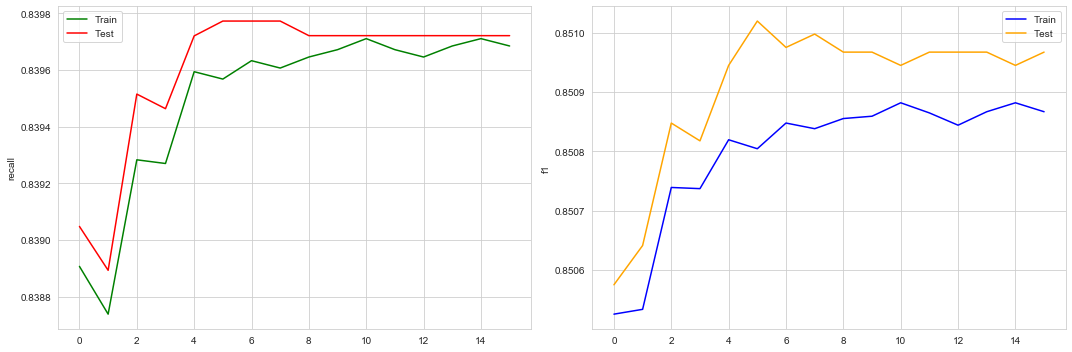

In [162]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=cv_result_lr.index, y='mean_train_recall', data=cv_result_lr, color='g', ax=ax[0])
sns.lineplot(x=cv_result_lr.index, y='mean_test_recall', data=cv_result_lr, color='r', ax=ax[0])
ax[0].legend(['Train', 'Test'])
ax[0].set_ylabel('recall')

sns.lineplot(x=cv_result_lr.index, y='mean_train_f1', data=cv_result_lr, color='b', ax=ax[1])
sns.lineplot(x=cv_result_lr.index, y='mean_test_f1', data=cv_result_lr, color='orange', ax=ax[1])
ax[1].legend(['Train', 'Test'])
ax[1].set_ylabel('f1')

plt.tight_layout()
plt.show()

In [163]:
# creating final logistic regression model using best hyper parameter
model_lr = LogisticRegression(solver='saga', penalty='l1', C=1, random_state=RANDOM_STATE)
model_lr.fit(X_train_lr, y_train_resampled)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=100, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [216]:
# prediction for train data set
y_pred_train = model_lr.predict(X_train_lr)
print(metrics.classification_report(y_train_resampled, y_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85     19309
           1       0.86      0.84      0.85     19309

    accuracy                           0.85     38618
   macro avg       0.85      0.85      0.85     38618
weighted avg       0.85      0.85      0.85     38618



In [217]:
metrics.confusion_matrix(y_train_resampled, y_pred_train)

array([[16725,  2584],
       [ 3097, 16212]], dtype=int64)

In [223]:
round(metrics.roc_auc_score(y_train_resampled, y_pred_train), 2)

0.85

In [197]:
# pre-processing independent variables of test data set
data = np.zeros((X_test.shape[0], X_test.shape[1]))
X_test_scaled = pd.DataFrame(data=data, columns=X_test.columns)
col = X_test.columns

X_test_scaled[col] = scaler.transform(X_test[col])
X_test_lr = X_test_scaled.loc[:, X_train_lr.columns]
X_test_lr.head()

roam_og_mou_8  der_diff_total_og_mou  der_diff_total_ic_mou  \
0        -0.5535                -0.5047                -0.2922   
1         0.3862                -0.2953                -0.3059   
2        -0.5535                -0.5864                -0.5275   
3        -0.5535                -0.5069                 0.0582   
4         1.3159                 1.1410                 1.1293   

   last_day_rch_amt_8  arpu_8  der_diff_roam_og_mou  total_og_mou_8  \
0              1.1914 -0.2107                0.0198         -0.4181   
1             -0.9761 -0.6287                0.1114         -0.7188   
2              1.1187  0.5013                0.0198          1.3276   
3              0.3088  0.1571                0.0198          0.5008   
4             -0.9761 -0.5952               -1.9763         -0.6340   

   der_diff_max_rech_amt  total_rech_data_8  der_diff_arpu  loc_ic_mou_8  \
0                -0.5694            -0.7410         0.1744       -0.3243   
1                -0.5572             1.4711        -0.3199       -1.0060   
2                -0.6021            -0.7410        -0.2457        1.3082   
3                -0.5158            -0.7410        -0.4517        0.5579   
4                -0.2587            -0.7410         0.5632       -0.6683   

   fb_user_8_1  
0      -0.6385  
1       1.5661  
2      -0.6385  
3      -0.6385  
4      -0.6385

In [218]:
# prediction for test data set
y_pred_test = model_lr.predict(X_test_lr)
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8251
           1       0.36      0.80      0.49       750

    accuracy                           0.86      9001
   macro avg       0.67      0.83      0.71      9001
weighted avg       0.93      0.86      0.89      9001



In [219]:
metrics.confusion_matrix(y_test, y_pred_test)

array([[7172, 1079],
       [ 150,  600]], dtype=int64)

In [222]:
round(metrics.roc_auc_score(y_test, y_pred_test), 2)

0.83

In [293]:
model_dict = {'model':'LogisticRegression', 'data':'train', 'recall':0.84, 'precision':0.86, 'f1':0.85, 'auc':0.85}
result_df = result_df.append(model_dict, ignore_index=True)
model_dict = {'model':'LogisticRegression', 'data':'test', 'recall':0.80, 'precision':0.36, 'f1':0.49, 'auc':0.83}
result_df = result_df.append(model_dict, ignore_index=True)

Best features identified from Logistic Regression are:
- der_diff_total_og_mou
- fb_user_8_1
- der_diff_total_ic_mou
- total_rech_data_8
- total_og_mou_8
- der_diff_arpu
- der_diff_max_rech_amt
- arpu_8
- roam_og_mou_8
- last_day_rch_amt_8
- der_diff_roam_og_mou
- loc_ic_mou_8

Logistic Regression without any PCA was able to acheive 0.8 recall value.

### Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [189]:
folds = KFold(3, shuffle=True, random_state=RANDOM_STATE)
hyper_params = [{
                 'max_leaf_nodes':range(5, 16, 5),
                 'min_samples_leaf':range(100, 501, 100)
                }]
scoring_param = ['recall', 'f1']
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

model_cv_dt=GridSearchCV(estimator=dt,
                   param_grid=hyper_params,
                   cv=folds,
                   scoring=scoring_param,
                   refit='recall',
                   return_train_score=True,
                   n_jobs=4,
                   verbose=1)

model_cv_dt.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:   47.5s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=4,
             param_gr

In [190]:
cv_result_dt = pd.DataFrame(model_cv_dt.cv_results_)
cv_result_dt

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          3.5183        0.0887           0.1065          0.0200   
1          3.1308        0.1770           0.0820          0.0084   
2          2.8821        0.0673           0.0781          0.0128   
3          2.7666        0.0265           0.0885          0.0074   
4          2.7505        0.0266           0.0781          0.0128   
5          3.8221        0.0757           0.0810          0.0094   
6          3.7917        0.0594           0.0729          0.0074   
7          3.7770        0.1524           0.0896          0.0280   
8          4.3761        0.0779           0.0833          0.0074   
9          3.6883        0.3571           0.0729          0.0074   
10         3.9959        0.0963           0.0677          0.0074   
11         4.0343        0.0852           0.0781          0.0128   
12         4.3378        0.0820           0.0781          0.0128   
13         4.4160        0.0147           0.0833          0.0074   
14         4.3457        0.0548           0.0729          0.0074   

   param_max_leaf_nodes param_min_samples_leaf  \
0                     5                    100   
1                     5                    200   
2                     5                    300   
3                     5                    400   
4                     5                    500   
5                    10                    100   
6                    10                    200   
7                    10                    300   
8                    10                    400   
9                    10                    500   
10                   15                    100   
11                   15                    200   
12                   15                    300   
13                   15                    400   
14                   15                    500   

                                             params  split0_test_recall  \
0    {'max_leaf_nodes': 5, 'min_samples_leaf': 100}              0.8658   
1    {'max_leaf_nodes': 5, 'min_samples_leaf': 200}              0.8658   
2    {'max_leaf_nodes': 5, 'min_samples_leaf': 300}              0.8658   
3    {'max_leaf_nodes': 5, 'min_samples_leaf': 400}              0.8658   
4    {'max_leaf_nodes': 5, 'min_samples_leaf': 500}              0.8658   
5   {'max_leaf_nodes': 10, 'min_samples_leaf': 100}              0.8577   
6   {'max_leaf_nodes': 10, 'min_samples_leaf': 200}              0.8487   
7   {'max_leaf_nodes': 10, 'min_samples_leaf': 300}              0.8607   
8   {'max_leaf_nodes': 10, 'min_samples_leaf': 400}              0.8682   
9   {'max_leaf_nodes': 10, 'min_samples_leaf': 500}              0.8682   
10  {'max_leaf_nodes': 15, 'min_samples_leaf': 100}              0.8679   
11  {'max_leaf_nodes': 15, 'min_samples_leaf': 200}              0.8808   
12  {'max_leaf_nodes': 15, 'min_samples_leaf': 300}              0.8895   
13  {'max_leaf_nodes': 15, 'min_samples_leaf': 400}              0.8682   
14  {'max_leaf_nodes': 15, 'min_samples_leaf': 500}              0.8682   

    split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
0               0.8631              0.8553            0.8614           0.0045   
1               0.8631              0.8553            0.8614           0.0045   
2               0.8631              0.8553            0.8614           0.0045   
3               0.8631              0.8553            0.8614           0.0045   
4               0.8631              0.8553            0.8614           0.0045   
5               0.8701              0.8621            0.8633           0.0051   
6               0.8549              0.8621            0.8552           0.0055   
7               0.8775              0.8609            0.8664           0.0079   
8               0.8801              0.8766            0.8750           0.0050   
9               0.8611              0.8612            0.8635           0.0033   
10              0.8993

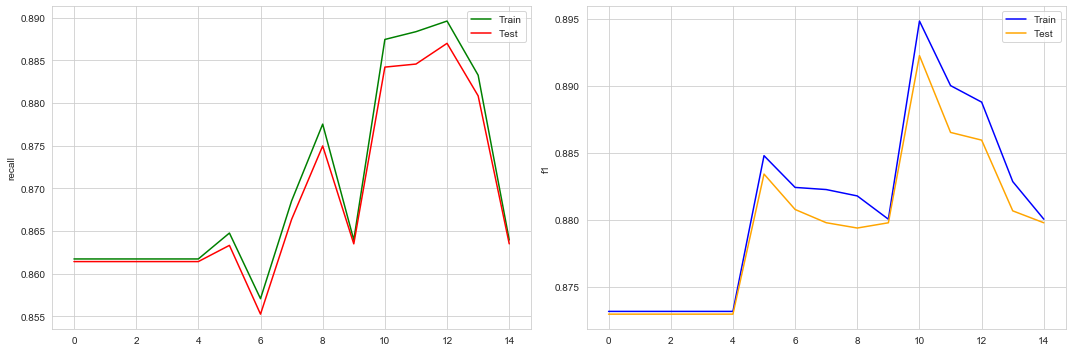

In [191]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=cv_result_dt.index, y='mean_train_recall', data=cv_result_dt, color='g', ax=ax[0])
sns.lineplot(x=cv_result_dt.index, y='mean_test_recall', data=cv_result_dt, color='r', ax=ax[0])
ax[0].legend(['Train', 'Test'])
ax[0].set_ylabel('recall')

sns.lineplot(x=cv_result_dt.index, y='mean_train_f1', data=cv_result_dt, color='b', ax=ax[1])
sns.lineplot(x=cv_result_dt.index, y='mean_test_f1', data=cv_result_dt, color='orange', ax=ax[1])
ax[1].legend(['Train', 'Test'])
ax[1].set_ylabel('f1')

plt.tight_layout()
plt.show()

In [227]:
model_dt = DecisionTreeClassifier(max_leaf_nodes=15, min_samples_leaf=300, random_state=RANDOM_STATE)
model_dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=300, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [253]:
# prediction for train data set
y_pred_train = model_dt.predict(X_train_resampled)
print(metrics.classification_report(y_train_resampled, y_pred_train))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     19309
           1       0.89      0.89      0.89     19309

    accuracy                           0.89     38618
   macro avg       0.89      0.89      0.89     38618
weighted avg       0.89      0.89      0.89     38618



In [229]:
metrics.confusion_matrix(y_train_resampled, y_pred_train)

array([[17274,  2035],
       [ 2194, 17115]], dtype=int64)

In [230]:
round(metrics.roc_auc_score(y_train_resampled, y_pred_train), 2)

0.89

In [231]:
# prediction for test data set
y_pred_test = model_dt.predict(X_test)
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8251
           1       0.42      0.77      0.54       750

    accuracy                           0.89      9001
   macro avg       0.70      0.83      0.74      9001
weighted avg       0.93      0.89      0.91      9001



In [232]:
metrics.confusion_matrix(y_test, y_pred_test)

array([[7449,  802],
       [ 176,  574]], dtype=int64)

In [233]:
round(metrics.roc_auc_score(y_test, y_pred_test), 2)

0.83

In [294]:
model_dict = {'model':'Decision Tree', 'data':'train', 'recall':0.89, 'precision':0.89, 'f1':0.89, 'auc':0.89}
result_df = result_df.append(model_dict, ignore_index=True)
model_dict = {'model':'Decision Tree', 'data':'test', 'recall':0.77, 'precision':0.42, 'f1':0.54, 'auc':0.83}
result_df = result_df.append(model_dict, ignore_index=True)

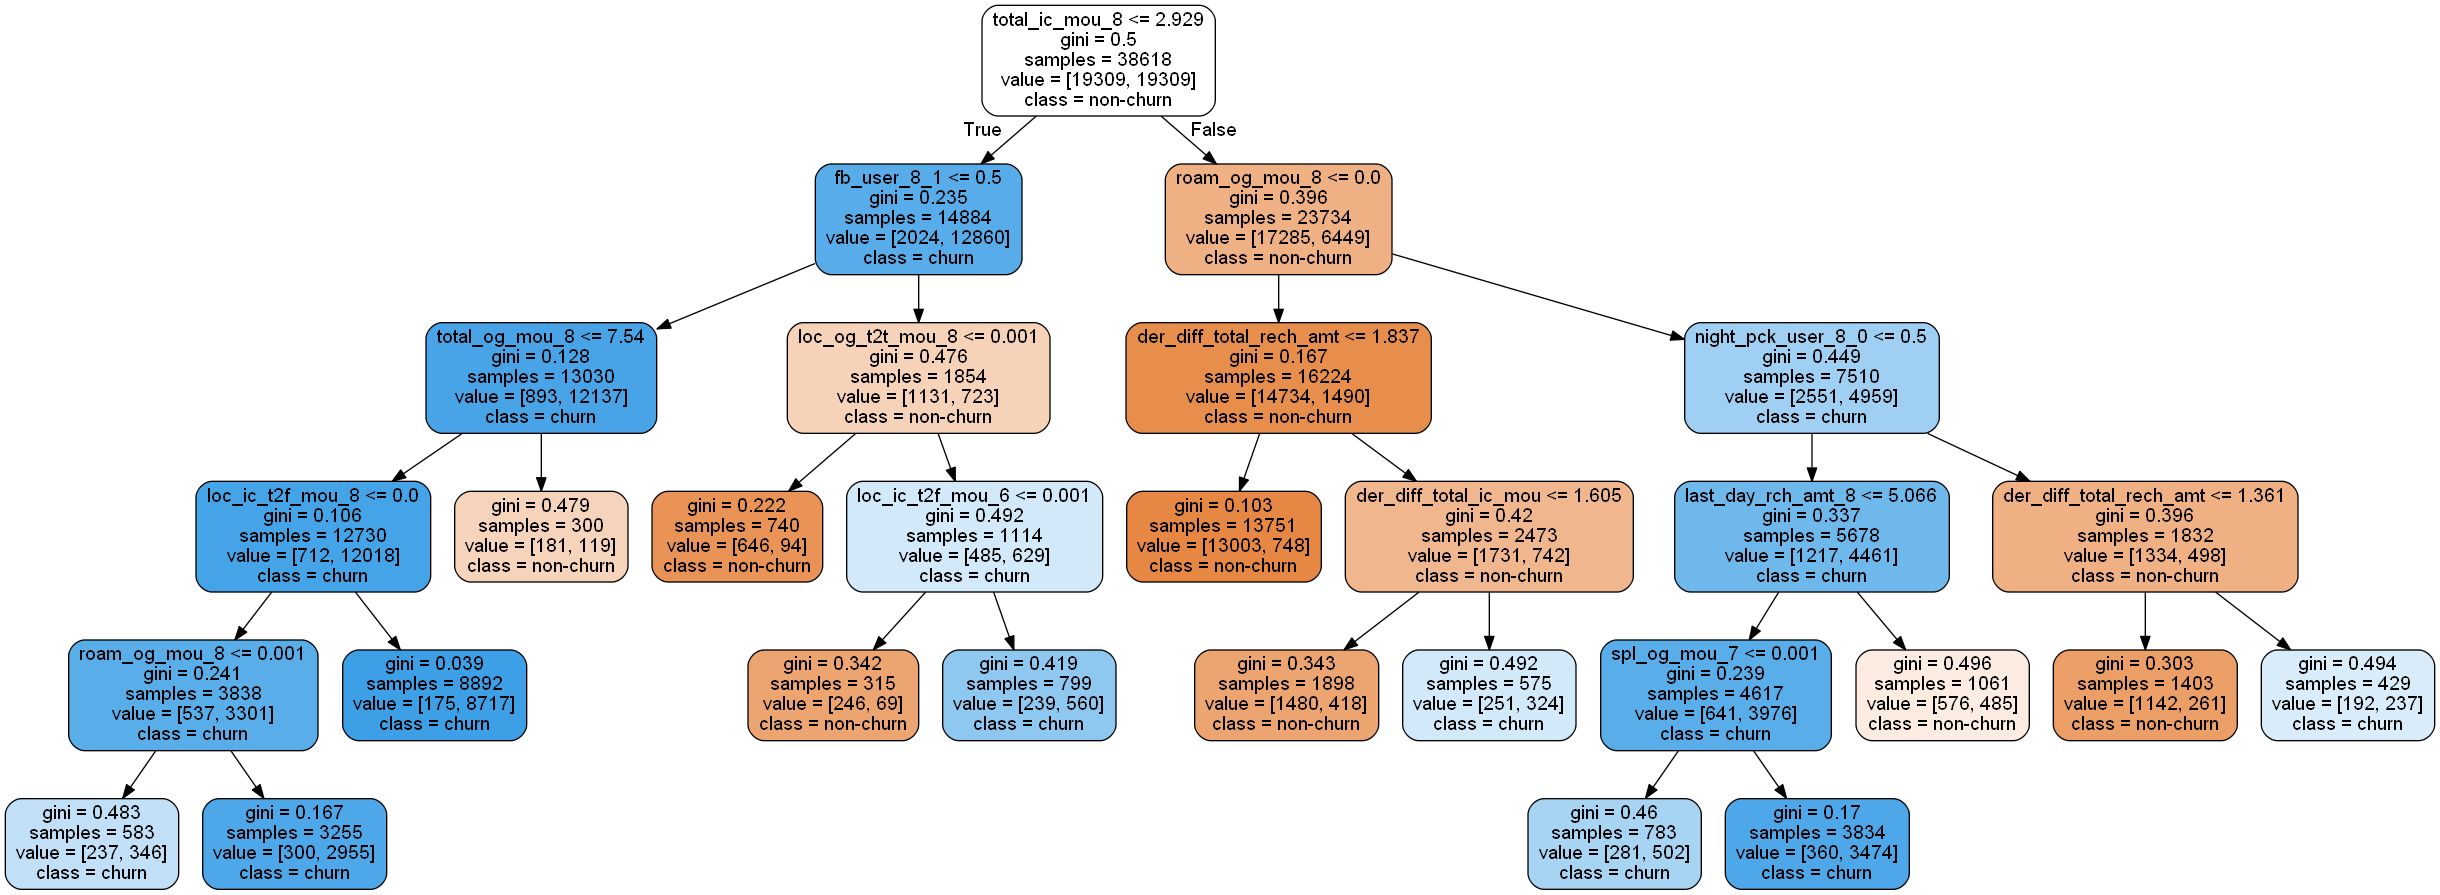

In [197]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# plotting tree
dot_data = StringIO()  
export_graphviz(model_dt, out_file=dot_data, feature_names=X_train_resampled_scaled.columns,
                class_names=['non-churn', 'churn'], filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Best features identified from Decision Tree are:
- total_ic_mou_8
- fb_user_8_1
- roam_og_mou_8
- total_og_mou_8
- loc_og_t2t_mou_8
- der_diff_total_rech_amt
- night_pack_user_8_0
- loc_ic_t2f_mou_8
- loc_ic_t2t_mou_6
- der_diff_total_ic_mou
- last_day_rch_amt_8
- der_diff_total_rech_amt
- roam_og_mou_8
- spl_og_mou_7

Decision Tree without any PCA was able to acheive 0.77 recall value.

## Model Type 2: For Better Prediction

### PCA

In [85]:
from sklearn.decomposition import PCA

In [199]:
pca = PCA(random_state=RANDOM_STATE)
pca.fit(X_train_resampled_scaled)

# listing pca dimention sorted by variance ratio
imp_list = pca.explained_variance_ratio_

var_df = pd.DataFrame({'dimention':range(1, len(X_train_resampled_scaled.columns)+1), 'variance_ratio':imp_list*100})
var_df['cum_variance_ratio'] = var_df.variance_ratio.cumsum()

var_df

dimention  variance_ratio  cum_variance_ratio
0            1         13.7281             13.7281
1            2         11.1775             24.9057
2            3          6.4669             31.3725
3            4          5.0986             36.4711
4            5          4.4799             40.9511
5            6          3.5324             44.4834
6            7          2.5311             47.0146
7            8          2.3950             49.4095
8            9          1.9393             51.3489
9           10          1.8665             53.2154
10          11          1.7061             54.9215
11          12          1.6702             56.5917
12          13          1.5184             58.1100
13          14          1.4089             59.5189
14          15          1.3353             60.8542
15          16          1.2940             62.1482
16          17          1.1634             63.3115
17          18          1.1265             64.4380
18          19          1.0883             65.5264
19          20          1.0609             66.5872
20          21          1.0038             67.5911
21          22          0.9719             68.5630
22          23          0.9244             69.4874
23          24          0.9015             70.3889
24          25          0.8894             71.2783
25          26          0.8391             72.1174
26          27          0.8092             72.9266
27          28          0.7983             73.7249
28          29          0.7811             74.5060
29          30          0.7588             75.2648
30          31          0.7552             76.0200
31          32          0.7079             76.7279
32          33          0.6843             77.4122
33          34          0.6644             78.0765
34          35          0.6504             78.7270
35          36          0.6283             79.3552
36          37          0.6082             79.9635
37          38          0.5924             80.5559
38          39          0.5859             81.1418
39          40          0.5614             81.7032
40          41          0.5439             82.2472
41          42          0.5222             82.7694
42          43          0.5134             83.2828
43          44          0.5094             83.7922
44          45          0.4926             84.2848
45          46          0.4824             84.7672
46          47          0.4772             85.2444
47          48          0.4609             85.7053
48          49          0.4519             86.1572
49          50          0.4479             86.6051
50          51          0.4315             87.0365
51          52          0.4259             87.4624
52          53          0.4120             87.8744
53          54          0.3984             88.2728
54          55          0.3924             88.6652
55          56          0.3872             89.0524
56          57          0.3748             89.4272
57          58          0.3566             89.7838
58          59          0.3472             90.1310
59          60          0.3355             90.4665
60          61          0.3266             90.7931
61          62          0.3108             91.1039
62          63          0.3069             91.4108
63          64          0.2991             91.7099
64          65          0.2926             92.0025
65          66          0.2865             92.2890
66          67          0.2715             92.5605
67          68          0.2682             92.8287
68          69          0.2522             93.0809
69          70          0.2498             93.3307
70          71          0.2446             93.5753
71          72          0.2342             93.8095
72          73          0.2330             94.0424
73          74          0.2292             94.2716
74          75          0.2178             94.4895
75          76          0.2141             94.7035
76          77          0.2099             94.9134
77          78          0.2

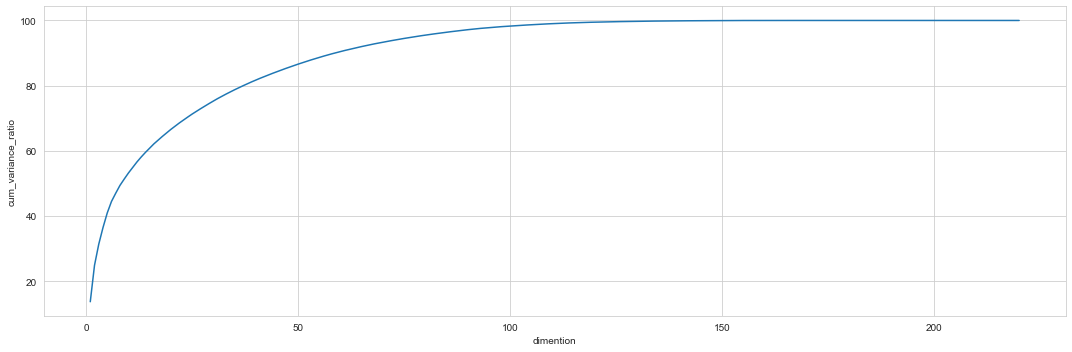

In [200]:
# scree plot
fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(x='dimention', y='cum_variance_ratio', data=var_df)
    
plt.tight_layout()
plt.show()

We'll be selecting top 45 dimension for PCA as it can acheive ~85% of variance in data. Aslo for beyond 45, adding a new feature add less than .5% of variance.

In [86]:
pca = PCA(n_components=45, random_state=RANDOM_STATE)

X_train_pca = pd.DataFrame(data=pca.fit_transform(X_train_resampled_scaled), columns=['dim'+str(i) for i in range(45)])
X_train_pca.head()

dim0   dim1    dim2    dim3    dim4    dim5    dim6    dim7    dim8  \
0 -1.5282 2.0291 -0.2118 -2.0349  0.9614 -4.9491  6.1328 -0.4993  0.6836   
1  3.9342 4.2498  4.4344 -0.9199 -3.2295  1.6920  3.6505  1.6300 -1.4233   
2  0.4179 1.8917 -1.7887 -2.7690 -0.3715  1.6077  3.7173 -0.5076  1.8040   
3 -3.9458 9.2439 -0.7522 -3.7678  0.6597 -0.9985  1.1871  4.4313 -1.0976   
4  5.5283 3.1476  3.9985 -0.7194 -4.1713 -1.0147 -0.6875 -0.9106 -0.5714   

     dim9   dim10   dim11   dim12   dim13   dim14   dim15   dim16   dim17  \
0 -0.0272  9.9445  5.1997 -1.4866  4.2198 -2.5519 -2.1471  0.3239  0.1643   
1 -1.1246  1.2126 -0.1543 -1.8181 -0.1502  1.7775  2.5101 -2.1318 -0.0561   
2  0.7286 -0.9387 -0.3277  1.9835  0.4789 -2.3939 -0.3286 -1.2985 -3.3996   
3 -0.4385 -2.6926 -0.2729  1.4388  0.3937  2.5642 -0.8457 -0.3524 -5.8700   
4  0.6194  0.1619 -1.8220 -2.0219 -0.3390  3.1008 -2.1761 -3.2140  0.8154   

    dim18   dim19   dim20   dim21   dim22   dim23   dim24   dim25   dim26  \
0 -0.2037 -0.2463  0.3688 -3.0641  0.2650 -1.3838  1.2087 -1.1706  0.8853   
1 -1.9289  0.7391 -1.3932  1.0330 -0.4941  0.0456 -3.1988  0.6534 -1.0186   
2 -0.1854 -1.1130  0.7745 -0.2012  0.8237 -1.7738  1.8016 -0.9808  1.7899   
3  0.8516  1.3971  4.0733  2.2895  0.5143 -5.6526 -3.1916  1.7519 -0.6266   
4  0.1315 -0.1343  0.1694  0.0671 -1.8970 -0.9995 -0.9753  0.2498 -0.2189   

    dim27   dim28   dim29   dim30   dim31   dim32   dim33   dim34   dim35  \
0 -1.5208  0.1533 -1.1384 -0.0207 -0.6130 -1.9673 -0.7527  0.3649  3.6122   
1 -0.0590 -3.4393  0.2424  2.5753  1.1481 -0.3466 -1.7890 -0.8255  0.1359   
2  1.7249  0.8917  0.2586  0.8538  1.7561 -3.2638 -1.5425 -3.5216 -3.6236   
3 -1.8318  1.1129 -1.9892  0.0467 -5.1671  3.0013 -0.6420 -0.3841  2.1709   
4  0.3247  0.6227  2.3700 -0.2289  2.8542 -2.9402  1.9357 -1.3243 -2.9278   

    dim36   dim37   dim38   dim39   dim40   dim41   dim42   dim43   dim44  
0  0.2637 -0.1935  0.7184 -0.5505 -1.4300  0.2809 -1.1395 -1.2470  0.7267  
1  0.7515  1.9982 -0.7306 -0.2250 -0.9169 -0.0487 -2.3791  1.1808  2.8060  
2  0.0829 -0.6674 -0.8162  0.2706  0.1620 -0.9876 -1.5231  0.5913 -0.5919  
3 -1.9032 -0.8821  1.6586 -0.1384 -2.0106 -3.0640  2.0828  2.7254 -1.2562  
4  0.4652 -2.7053 -0.5494  2.1534  1.6756  0.2395 -0.0998  0.5680 -0.4230

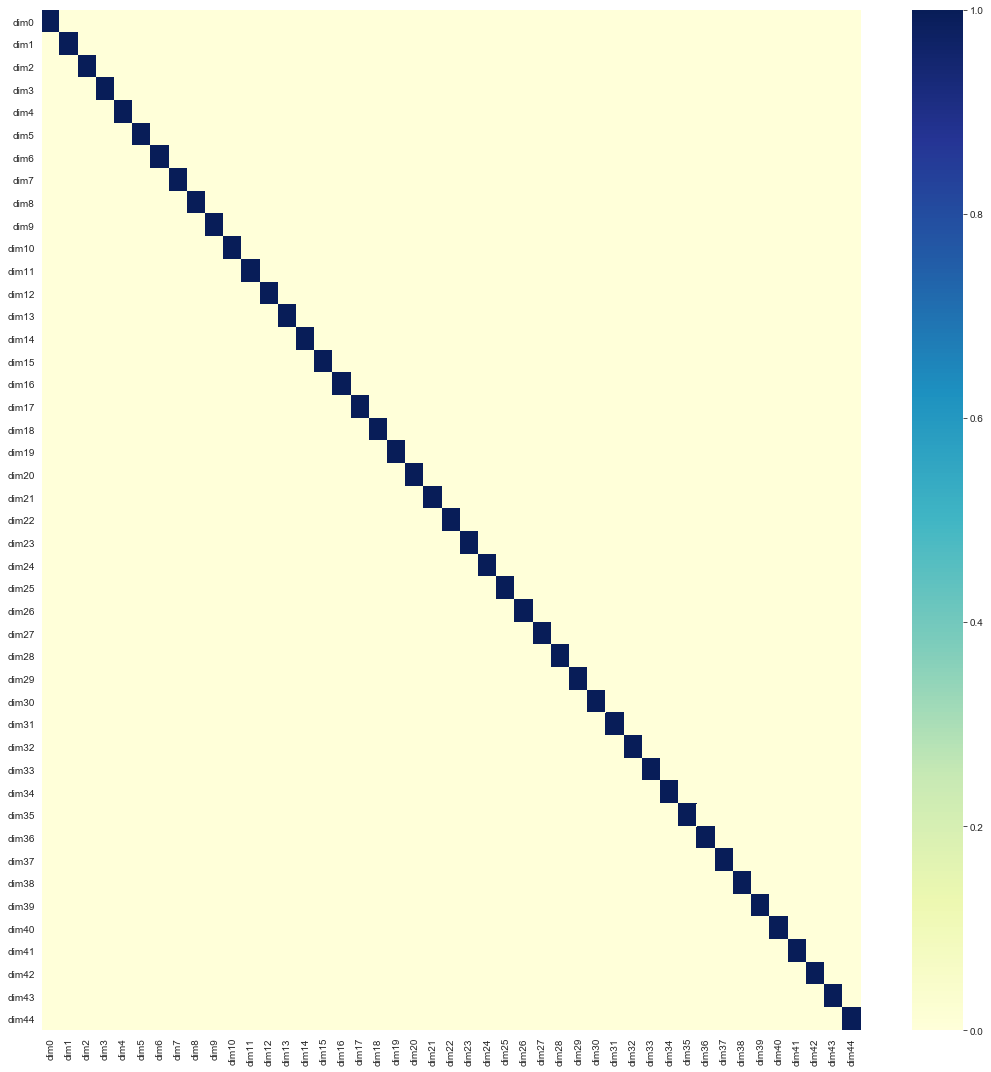

In [202]:
# creating heatmap with correlation coefficients after pca
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(X_train_pca.corr(), cmap='YlGnBu')
plt.tight_layout()
plt.show()

### Logistic Regression

In [238]:
folds = KFold(3, shuffle=True, random_state=RANDOM_STATE)
lr = LogisticRegression(random_state=RANDOM_STATE)
                       
hyper_params = [{
                 'penalty':['l1', 'l2'],
                 'C':[1e-4, 1e-3, 1e-2, 1e-1, 1],
                 'solver':['liblinear', 'saga'],
                }]
scoring_param = ['recall', 'f1']

model_cv_lr=GridSearchCV(estimator=lr,
                   param_grid=hyper_params,
                   cv=folds,
                   scoring=scoring_param,
                   refit='recall',
                   return_train_score=True,
                   n_jobs=4,
                   verbose=1)

model_cv_lr.fit(X_train_pca, y_train_resampled)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:   17.7s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=100, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=4,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1],
                          'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga']}],
             pre_dispatch='2*n_jobs', refit='recall', return_train_score=True,
             scoring=['recall', 'f1'], ver

In [239]:
cv_result_lr = pd.DataFrame(model_cv_lr.cv_results_)
cv_result_lr

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0          0.5915        0.4586           0.0316          0.0033  0.0001   
1          1.0487        0.0697           0.0260          0.0074  0.0001   
2          0.6052        0.2394           0.0351          0.0068  0.0001   
3          1.0550        0.0480           0.0355          0.0184  0.0001   
4          0.4764        0.2716           0.0281          0.0044  0.0010   
5          1.2425        0.0318           0.0380          0.0066  0.0010   
6          0.4636        0.0151           0.0331          0.0027  0.0010   
7          1.1841        0.0775           0.0219          0.0104  0.0010   
8          0.5923        0.1889           0.0272          0.0083  0.0100   
9          1.3050        0.1955           0.0260          0.0074  0.0100   
10         0.5671        0.0665           0.0272          0.0083  0.0100   
11         1.3558        0.0946           0.0312          0.0000  0.0100   
12         0.4049        0.0129           0.0312          0.0000  0.1000   
13         1.8330        0.2522           0.0362          0.0036  0.1000   
14         0.6385        0.0602           0.0156          0.0000  0.1000   
15         1.4853        0.2254           0.0419          0.0061  0.1000   
16         0.5417        0.1230           0.0292          0.0104       1   
17         2.4900        0.4227           0.0503          0.0114       1   
18         0.9149        0.1133           0.0391          0.0090       1   
19         1.6825        0.1155           0.0401          0.0131       1   

   param_penalty param_solver  \
0             l1    liblinear   
1             l1         saga   
2             l2    liblinear   
3             l2         saga   
4             l1    liblinear   
5             l1         saga   
6             l2    liblinear   
7             l2         saga   
8             l1    liblinear   
9             l1         saga   
10            l2    liblinear   
11            l2         saga   
12            l1    liblinear   
13            l1         saga   
14            l2    liblinear   
15            l2         saga   
16            l1    liblinear   
17            l1         saga   
18            l2    liblinear   
19            l2         saga   

                                               params  split0_test_recall  \
0   {'C': 0.0001, 'penalty': 'l1', 'solver': 'libl...              0.8057   
1    {'C': 0.0001, 'penalty': 'l1', 'solver': 'saga'}              0.8049   
2   {'C': 0.0001, 'penalty': 'l2', 'solver': 'libl...              0.8299   
3    {'C': 0.0001, 'penalty': 'l2', 'solver': 'saga'}              0.8308   
4   {'C': 0.001, 'penalty': 'l1', 'solver': 'libli...              0.8188   
5     {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}              0.8197   
6   {'C': 0.001, 'penalty': 'l2', 'solver': 'libli...              0.8496   
7     {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}              0.8493   
8   {'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...              0.8531   
9      {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}              0.8526   
10  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...              0.8542   
11     {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}              0.8540   
12  {'C': 0.1, 'penalty': 'l1', 'solver': 'libline...              0.8545   
13      {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}              0.8538   
14  {'C': 0.1, 'penalty': 'l2', 'solver': 'libline...              0.8545   
15      {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}              0.8545   
16   {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}              0.8543   
17        {'C': 1, 'penalty': 'l1', 'solver': 'saga'}              0.8543   
18   {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}              0.8543   
19        {'C': 1, 'penalty': 'l2', 'solver': 'saga'}              0.8543   

    split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
0             

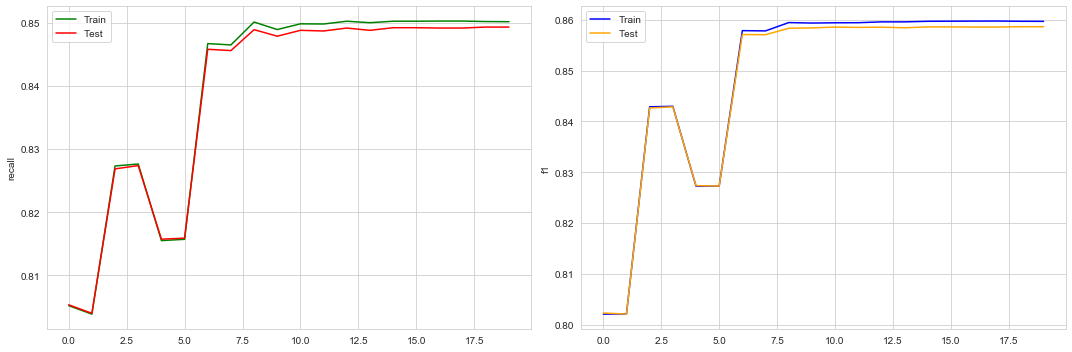

In [240]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=cv_result_lr.index, y='mean_train_recall', data=cv_result_lr, color='g', ax=ax[0])
sns.lineplot(x=cv_result_lr.index, y='mean_test_recall', data=cv_result_lr, color='r', ax=ax[0])
ax[0].legend(['Train', 'Test'])
ax[0].set_ylabel('recall')

sns.lineplot(x=cv_result_lr.index, y='mean_train_f1', data=cv_result_lr, color='b', ax=ax[1])
sns.lineplot(x=cv_result_lr.index, y='mean_test_f1', data=cv_result_lr, color='orange', ax=ax[1])
ax[1].legend(['Train', 'Test'])
ax[1].set_ylabel('f1')

plt.tight_layout()
plt.show()

In [254]:
model_lr = LogisticRegression(penalty='l2', C=.001, solver='liblinear', random_state=RANDOM_STATE)
model_lr.fit(X_train_pca, y_train_resampled)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [255]:
# prediction for train data set
y_pred_train = model_lr.predict(X_train_pca)

# classification report
print(metrics.classification_report(y_train_resampled, y_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     19309
           1       0.87      0.85      0.86     19309

    accuracy                           0.86     38618
   macro avg       0.86      0.86      0.86     38618
weighted avg       0.86      0.86      0.86     38618



In [256]:
# confusion matrix
metrics.confusion_matrix(y_train_resampled, y_pred_train)

array([[16858,  2451],
       [ 2938, 16371]], dtype=int64)

In [257]:
round(metrics.roc_auc_score(y_train_resampled, y_pred_train), 2)

0.86

In [258]:
# prediction for test data set
y_pred_test = model_lr.predict(pca.transform(X_test_scaled))

# classification report
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92      8251
           1       0.37      0.79      0.50       750

    accuracy                           0.87      9001
   macro avg       0.67      0.83      0.71      9001
weighted avg       0.93      0.87      0.89      9001



In [259]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_test)

array([[7227, 1024],
       [ 158,  592]], dtype=int64)

In [260]:
round(metrics.roc_auc_score(y_test, y_pred_test), 2)

0.83

In [295]:
model_dict = {'model':'LogisticRegression with PCA', 'data':'train', 'recall':0.85, 'precision':0.87, 'f1':0.86, 'auc':0.86}
result_df = result_df.append(model_dict, ignore_index=True)
model_dict = {'model':'LogisticRegression with PCA', 'data':'test', 'recall':0.79, 'precision':0.37, 'f1':0.50, 'auc':0.83}
result_df = result_df.append(model_dict, ignore_index=True)

Logistic Regression with PCA was able to acheive .73 recall.

### SVM

In [263]:
from sklearn.svm import SVC

In [253]:
folds = KFold(3, shuffle=True, random_state=RANDOM_STATE)
hyper_params = [{
                 'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                }]
scoring_param = ['recall', 'f1']

svm = SVC(random_state=RANDOM_STATE)

model_cv_svm_1=GridSearchCV(estimator=svm,
                   param_grid=hyper_params,
                   cv=folds,
                   scoring=scoring_param,
                   refit='recall',
                   return_train_score=True,
                   n_jobs=4,
                   verbose=1)

model_cv_svm_1.fit(X_train_pca, y_train_resampled)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed: 17.4min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=100, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid=[{'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit='recall', return_train_score=True,
             scoring=['recall', 'f1'], verbose=1)

In [254]:
cv_result_svm_1 = pd.DataFrame(model_cv_svm_1.cv_results_)
cv_result_svm_1

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_kernel  \
0       898.1696       32.4740          16.6720          0.7613       linear   
1        92.1156        4.4323          19.7715          2.0386         poly   
2        70.6068        9.7817          16.6122          2.7338          rbf   
3        74.2901       10.3016          11.9981          2.2959      sigmoid   

                  params  split0_test_recall  split1_test_recall  \
0   {'kernel': 'linear'}              0.8498              0.8446   
1     {'kernel': 'poly'}              0.9654              0.9694   
2      {'kernel': 'rbf'}              0.9656              0.9652   
3  {'kernel': 'sigmoid'}              0.7795              0.7833   

   split2_test_recall  mean_test_recall  std_test_recall  rank_test_recall  \
0              0.8459            0.8468           0.0022                 3   
1              0.9711            0.9686           0.0024                 1   
2              0.9650            0.9652           0.0002                 2   
3              0.7759            0.7796           0.0030                 4   

   split0_train_recall  split1_train_recall  split2_train_recall  \
0               0.8490               0.8475               0.8465   
1               0.9756               0.9745               0.9742   
2               0.9728               0.9720               0.9741   
3               0.7776               0.7793               0.7828   

   mean_train_recall  std_train_recall  split0_test_f1  split1_test_f1  \
0             0.8476            0.0010          0.8623          0.8581   
1             0.9748            0.0006          0.9348          0.9339   
2             0.9729            0.0009          0.9499          0.9483   
3             0.7799            0.0022          0.7809          0.7849   

   split2_test_f1  mean_test_f1  std_test_f1  rank_test_f1  split0_train_f1  \
0          0.8596        0.8600       0.0017             3           0.8603   
1          0.9343        0.9343       0.0003             2           0.9490   
2          0.9479        0.9487       0.0009             1           0.9579   
3          0.7786        0.7815       0.0026             4           0.7782   

   split1_train_f1  split2_train_f1  mean_train_f1  std_train_f1  
0           0.8602           0.8605         0.8604        0.0001  
1           0.9512           0.9512         0.9504        0.0010  
2           0.9590           0.9602         0.9590        0.0009  
3           0.7803           0.7829         0.7805        0.0019

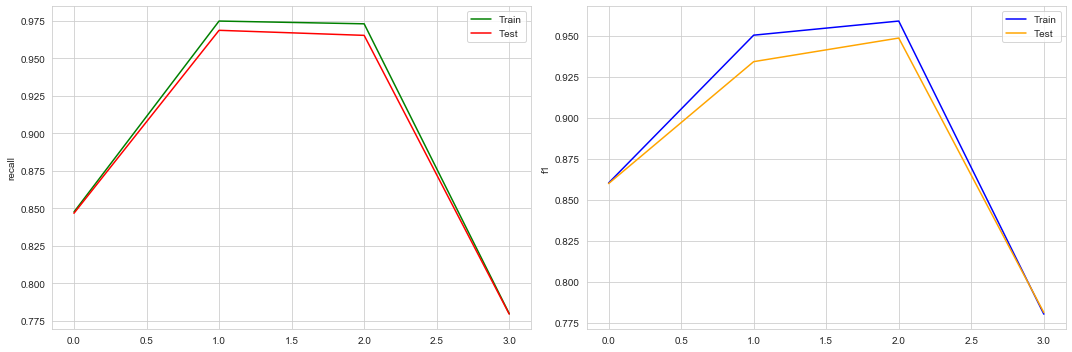

In [255]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=cv_result_svm_1.index, y='mean_train_recall', data=cv_result_svm_1, color='g', ax=ax[0])
sns.lineplot(x=cv_result_svm_1.index, y='mean_test_recall', data=cv_result_svm_1, color='r', ax=ax[0])
ax[0].legend(['Train', 'Test'])
ax[0].set_ylabel('recall')

sns.lineplot(x=cv_result_svm_1.index, y='mean_train_f1', data=cv_result_svm_1, color='b', ax=ax[1])
sns.lineplot(x=cv_result_svm_1.index, y='mean_test_f1', data=cv_result_svm_1, color='orange', ax=ax[1])
ax[1].legend(['Train', 'Test'])
ax[1].set_ylabel('f1')

plt.tight_layout()
plt.show()

In [256]:
folds = KFold(3, shuffle=True, random_state=RANDOM_STATE)
hyper_params = [{
                 'C':[1e-2, 1e-1, 1, 1e1, 1e2, 1e3],
                }]
scoring_param = ['recall', 'f1']

svm = SVC(kernel='rbf', random_state=RANDOM_STATE)

model_cv_svm_2=GridSearchCV(estimator=svm,
                   param_grid=hyper_params,
                   cv=folds,
                   scoring=scoring_param,
                   refit='recall',
                   return_train_score=True,
                   n_jobs=4,
                   verbose=1)

model_cv_svm_2.fit(X_train_pca, y_train_resampled)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed: 13.6min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=100, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid=[{'C': [0.01, 0.1, 1, 10.0, 100.0, 1000.0]}],
             pre_dispatch='2*n_jobs', refit='recall', return_train_score=True,
             scoring=['recall', 'f1'], verbose=1)

In [257]:
cv_result_svm_2 = pd.DataFrame(model_cv_svm_2.cv_results_)
cv_result_svm_2

mean_fit_time  std_fit_time  mean_score_time  std_score_time   param_C  \
0       128.7540        0.2977          27.2874          0.7242    0.0100   
1        80.7354        5.7803          22.1800          2.0800    0.1000   
2        67.2261        3.7755          15.1864          1.2086         1   
3       124.3971        3.3595           9.9535          0.4970   10.0000   
4       171.0075        5.1228           7.7627          0.1430  100.0000   
5       146.7169       21.5124           6.0405          0.7060 1000.0000   

          params  split0_test_recall  split1_test_recall  split2_test_recall  \
0    {'C': 0.01}              0.8147              0.8115              0.8096   
1     {'C': 0.1}              0.8945              0.8914              0.8973   
2       {'C': 1}              0.9656              0.9652              0.9650   
3    {'C': 10.0}              0.9871              0.9876              0.9844   
4   {'C': 100.0}              0.9869              0.9893              0.9851   
5  {'C': 1000.0}              0.9832              0.9872              0.9832   

   mean_test_recall  std_test_recall  rank_test_recall  split0_train_recall  \
0            0.8120           0.0021                 6               0.8140   
1            0.8944           0.0024                 5               0.9002   
2            0.9652           0.0002                 4               0.9728   
3            0.9864           0.0014                 2               0.9969   
4            0.9871           0.0017                 1               0.9996   
5            0.9845           0.0019                 3               1.0000   

   split1_train_recall  split2_train_recall  mean_train_recall  \
0               0.8109               0.8116             0.8122   
1               0.8988               0.8991             0.8993   
2               0.9720               0.9741             0.9729   
3               0.9963               0.9968             0.9967   
4               0.9998               0.9999             0.9998   
5               1.0000               1.0000             1.0000   

   std_train_recall  split0_test_f1  split1_test_f1  split2_test_f1  \
0            0.0013          0.8501          0.8488          0.8463   
1            0.0006          0.9019          0.8985          0.9017   
2            0.0009          0.9499          0.9483          0.9479   
3            0.0003          0.9707          0.9679          0.9663   
4            0.0001          0.9696          0.9689          0.9645   
5            0.0000          0.9656          0.9654          0.9625   

   mean_test_f1  std_test_f1  rank_test_f1  split0_train_f1  split1_train_f1  \
0        0.8484       0.0016             6           0.8486           0.8490   
1        0.9007       0.0015             5           0.9046           0.9053   
2        0.9487       0.0009             4           0.9579           0.9590   
3        0.9683       0.0018             1           0.9888           0.9897   
4        0.9677       0.0023             2           0.9988           0.9989   
5        0.9645       0.0014             3           1.0000           1.0000   

   split2_train_f1  mean_train_f1  std_train_f1  
0           0.8494         0.8490        0.0003  
1           0.9051         0.9050        0.0003  
2           0.9602         0.9590        0.0009  
3           0.9906         0.9897        0.0007  
4           0.9991         0.9989        0.0001  
5           1.0000         1.0000        0.0000

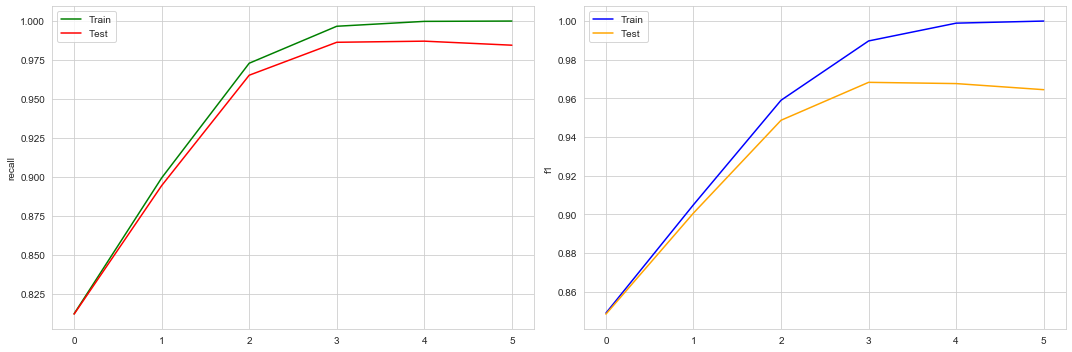

In [258]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=cv_result_svm_2.index, y='mean_train_recall', data=cv_result_svm_2, color='g', ax=ax[0])
sns.lineplot(x=cv_result_svm_2.index, y='mean_test_recall', data=cv_result_svm_2, color='r', ax=ax[0])
ax[0].legend(['Train', 'Test'])
ax[0].set_ylabel('recall')

sns.lineplot(x=cv_result_svm_2.index, y='mean_train_f1', data=cv_result_svm_2, color='b', ax=ax[1])
sns.lineplot(x=cv_result_svm_2.index, y='mean_test_f1', data=cv_result_svm_2, color='orange', ax=ax[1])
ax[1].legend(['Train', 'Test'])
ax[1].set_ylabel('f1')

plt.tight_layout()
plt.show()

In [259]:
folds = KFold(3, shuffle=True, random_state=RANDOM_STATE)
hyper_params = [{
                 'gamma':[1e-1, 1e-2, 1e-3, 1e-4],
                }]
scoring_param = ['recall', 'f1']

svm = SVC(kernel='rbf', random_state=RANDOM_STATE)

model_cv_svm_3=GridSearchCV(estimator=svm,
                   param_grid=hyper_params,
                   cv=folds,
                   scoring=scoring_param,
                   refit='recall',
                   return_train_score=True,
                   n_jobs=4,
                   verbose=1)

model_cv_svm_3.fit(X_train_pca, y_train_resampled)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed: 13.8min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=100, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid=[{'gamma': [0.1, 0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit='recall', return_train_score=True,
             scoring=['recall', 'f1'], verbose=1)

In [260]:
cv_result_svm_3 = pd.DataFrame(model_cv_svm_3.cv_results_)
cv_result_svm_3

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_gamma  \
0       446.7300        6.5820          52.2117          0.2427      0.1000   
1       114.3444        5.5456          15.9677          1.9196      0.0100   
2        70.2473        3.8288          18.2100          0.8277      0.0010   
3        79.0461        6.3241          19.1019          3.0587      0.0001   

              params  split0_test_recall  split1_test_recall  \
0     {'gamma': 0.1}              0.8956              0.8955   
1    {'gamma': 0.01}              0.9780              0.9838   
2   {'gamma': 0.001}              0.9023              0.8975   
3  {'gamma': 0.0001}              0.8436              0.8370   

   split2_test_recall  mean_test_recall  std_test_recall  rank_test_recall  \
0              0.8844            0.8918           0.0053                 3   
1              0.9799            0.9806           0.0024                 1   
2              0.9037            0.9011           0.0027                 2   
3              0.8377            0.8394           0.0030                 4   

   split0_train_recall  split1_train_recall  split2_train_recall  \
0               1.0000               1.0000               1.0000   
1               0.9896               0.9886               0.9910   
2               0.9021               0.9044               0.9037   
3               0.8413               0.8401               0.8386   

   mean_train_recall  std_train_recall  split0_test_f1  split1_test_f1  \
0             1.0000            0.0000          0.9428          0.9422   
1             0.9897            0.0010          0.9631          0.9623   
2             0.9034            0.0010          0.9029          0.8980   
3             0.8400            0.0011          0.8609          0.8571   

   split2_test_f1  mean_test_f1  std_test_f1  rank_test_f1  split0_train_f1  \
0          0.9353        0.9401       0.0034             2           0.9998   
1          0.9617        0.9624       0.0006             1           0.9766   
2          0.9018        0.9009       0.0021             3           0.9016   
3          0.8573        0.8585       0.0017             4           0.8586   

   split1_train_f1  split2_train_f1  mean_train_f1  std_train_f1  
0           0.9997           0.9998         0.9998        0.0001  
1           0.9777           0.9779         0.9774        0.0006  
2           0.9039           0.9046         0.9034        0.0013  
3           0.8593           0.8590         0.8590        0.0003

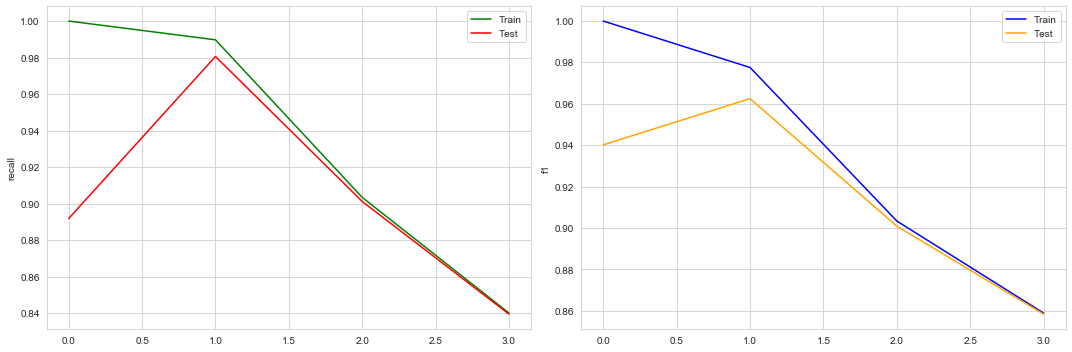

In [261]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=cv_result_svm_3.index, y='mean_train_recall', data=cv_result_svm_3, color='g', ax=ax[0])
sns.lineplot(x=cv_result_svm_3.index, y='mean_test_recall', data=cv_result_svm_3, color='r', ax=ax[0])
ax[0].legend(['Train', 'Test'])
ax[0].set_ylabel('recall')

sns.lineplot(x=cv_result_svm_3.index, y='mean_train_f1', data=cv_result_svm_3, color='b', ax=ax[1])
sns.lineplot(x=cv_result_svm_3.index, y='mean_test_f1', data=cv_result_svm_3, color='orange', ax=ax[1])
ax[1].legend(['Train', 'Test'])
ax[1].set_ylabel('f1')

plt.tight_layout()
plt.show()

In [120]:
folds = KFold(3, shuffle=True, random_state=RANDOM_STATE)
hyper_params = [{
                 'kernel':['poly', 'rbf'],
                 'gamma':[0.01],
                 'C':[1e-2, 1e-1, 1],
                }]
scoring_param = ['recall', 'f1']

svm = SVC(random_state=RANDOM_STATE)

model_cv_svm=GridSearchCV(estimator=svm,
                   param_grid=hyper_params,
                   cv=folds,
                   scoring=scoring_param,
                   refit='recall',
                   return_train_score=True,
                   n_jobs=4,
                   verbose=1)

model_cv_svm.fit(X_train_pca, y_train_resampled)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed: 15.0min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=100, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid=[{'C': [0.01, 0.1, 1], 'gamma': [0.01],
                          'kernel': ['poly', 'rbf']}],
             pre_dispatch='2*n_jobs', refit='recall', return_train_score=True,
             scoring=['recall', 'f1'], verbose=2)

In [121]:
cv_result_svm = pd.DataFrame(model_cv_svm.cv_results_)
cv_result_svm

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       100.3107        1.2124          29.0874          0.4742  0.0100   
1       140.5132        2.1466          35.5095          2.5678  0.0100   
2        81.1348        2.1442          19.0944          2.0829  0.1000   
3        97.7045        0.4951          24.1549          2.2127  0.1000   
4       170.4791       12.0624          13.6088          0.9420       1   
5       115.5736       18.7570          14.2678          3.0437       1   

  param_gamma param_kernel                                        params  \
0      0.0100         poly  {'C': 0.01, 'gamma': 0.01, 'kernel': 'poly'}   
1      0.0100          rbf   {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}   
2      0.0100         poly   {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}   
3      0.0100          rbf    {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}   
4      0.0100         poly     {'C': 1, 'gamma': 0.01, 'kernel': 'poly'}   
5      0.0100          rbf      {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}   

   split0_test_recall  split1_test_recall  split2_test_recall  \
0              0.9067              0.9041              0.9105   
1              0.7706              0.7686              0.7630   
2              0.9606              0.9637              0.9653   
3              0.9011              0.9030              0.9004   
4              0.9808              0.9845              0.9844   
5              0.9780              0.9838              0.9799   

   mean_test_recall  std_test_recall  rank_test_recall  split0_train_recall  \
0            0.9071           0.0026                 4               0.9142   
1            0.7674           0.0033                 6               0.7746   
2            0.9632           0.0020                 3               0.9695   
3            0.9015           0.0011                 5               0.9095   
4            0.9833           0.0017                 1               0.9924   
5            0.9806           0.0024                 2               0.9896   

   split1_train_recall  split2_train_recall  mean_train_recall  \
0               0.9094               0.9121             0.9119   
1               0.7663               0.7705             0.7704   
2               0.9682               0.9692             0.9690   
3               0.9105               0.9118             0.9106   
4               0.9924               0.9927             0.9925   
5               0.9886               0.9910             0.9897   

   std_train_recall  split0_test_f1  split1_test_f1  split2_test_f1  \
0            0.0020          0.8896          0.8888          0.8886   
1            0.0034          0.8321          0.8324          0.8266   
2            0.0005          0.9295          0.9288          0.9288   
3            0.0009          0.9106          0.9101          0.9087   
4            0.0002          0.9453          0.9477          0.9473   
5            0.0010          0.9631          0.9623          0.9617   

   mean_test_f1  std_test_f1  rank_test_f1  split0_train_f1  split1_train_f1  \
0        0.8890       0.0004             5           0.8936           0.8953   
1        0.8304       0.0026             6           0.8339           0.8303   
2        0.9290       0.0004             3           0.9411           0.9437   
3        0.9098       0.0008             4           0.9158           0.9177   
4        0.9467       0.0011             2           0.9770           0.9783   
5        0.9624       0.0006             1           0.9766           0.9777   

   split2_train_f1  mean_train_f1  std_train_f1  
0           0.8958         0.8949        0.0009  
1           0.8334         0.8325        0.0016  
2           0.9438         0.9429        0.0012  
3           0.9178         0.9171        0.0009  
4           0.9787         0.9780        0.0007  
5           0.9779         0.9774        0.0006

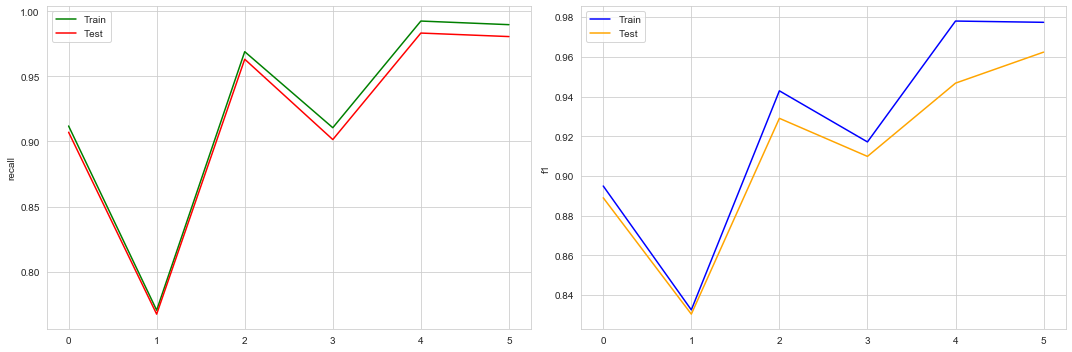

In [122]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=cv_result_svm.index, y='mean_train_recall', data=cv_result_svm, color='g', ax=ax[0])
sns.lineplot(x=cv_result_svm.index, y='mean_test_recall', data=cv_result_svm, color='r', ax=ax[0])
ax[0].legend(['Train', 'Test'])
ax[0].set_ylabel('recall')

sns.lineplot(x=cv_result_svm.index, y='mean_train_f1', data=cv_result_svm, color='b', ax=ax[1])
sns.lineplot(x=cv_result_svm.index, y='mean_test_f1', data=cv_result_svm, color='orange', ax=ax[1])
ax[1].legend(['Train', 'Test'])
ax[1].set_ylabel('f1')

plt.tight_layout()
plt.show()

In [264]:
# Index 2 looks like best parameters which is not overfitted
model_svm = SVC(kernel='poly', C=.1, gamma=0.01, random_state=RANDOM_STATE)
model_svm.fit(X_train_pca, y_train_resampled)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
    max_iter=-1, probability=False, random_state=100, shrinking=True, tol=0.001,
    verbose=False)

In [265]:
# prediction for train data set
y_pred_train = model_svm.predict(X_train_pca)

# classification report
print(metrics.classification_report(y_train_resampled, y_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     19309
           1       0.92      0.97      0.95     19309

    accuracy                           0.95     38618
   macro avg       0.95      0.95      0.95     38618
weighted avg       0.95      0.95      0.95     38618



In [266]:
# confusion matrix
metrics.confusion_matrix(y_train_resampled, y_pred_train)

array([[17711,  1598],
       [  510, 18799]], dtype=int64)

In [267]:
round(metrics.roc_auc_score(y_train_resampled, y_pred_train), 2)

0.95

In [268]:
# prediction for test data set
y_pred_test = model_svm.predict(pca.transform(scaler.transform(X_test)))

# classification report
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8251
           1       0.42      0.76      0.54       750

    accuracy                           0.89      9001
   macro avg       0.70      0.83      0.74      9001
weighted avg       0.93      0.89      0.90      9001



In [269]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_test)

array([[7449,  802],
       [ 180,  570]], dtype=int64)

In [270]:
round(metrics.roc_auc_score(y_test, y_pred_test), 2)

0.83

In [296]:
model_dict = {'model':'SVM', 'data':'train', 'recall':0.97, 'precision':0.92, 'f1':0.95, 'auc':0.95}
result_df = result_df.append(model_dict, ignore_index=True)
model_dict = {'model':'SVM', 'data':'test', 'recall':0.76, 'precision':0.42, 'f1':0.54, 'auc':0.83}
result_df = result_df.append(model_dict, ignore_index=True)

SVM can acheive 0.76 recall score for test data.

### Random Forest
Random Forests “cannot overfit” the data. It is certainly true that increasing B [the number of trees in the ensemble] does not cause the random forest sequence to overfit. However, this limit can overfit the data; the average of fully grown trees can result in too rich a model, and incur unnecessary variance. Segal (2004) demonstrates small gains in performance by controlling the depths of the individual trees grown in random forests. Our experience is that using full-grown trees seldom costs much, and results in one less tuning parameter. Stated another way, for a fixed hyperparameter configuration, increasing the number of trees cannot overfit the data; however, the other hyperparameters might be a source of overfit.
    
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
 
- Evaluating multiple combinations of paramaters using Randomized SearchCV

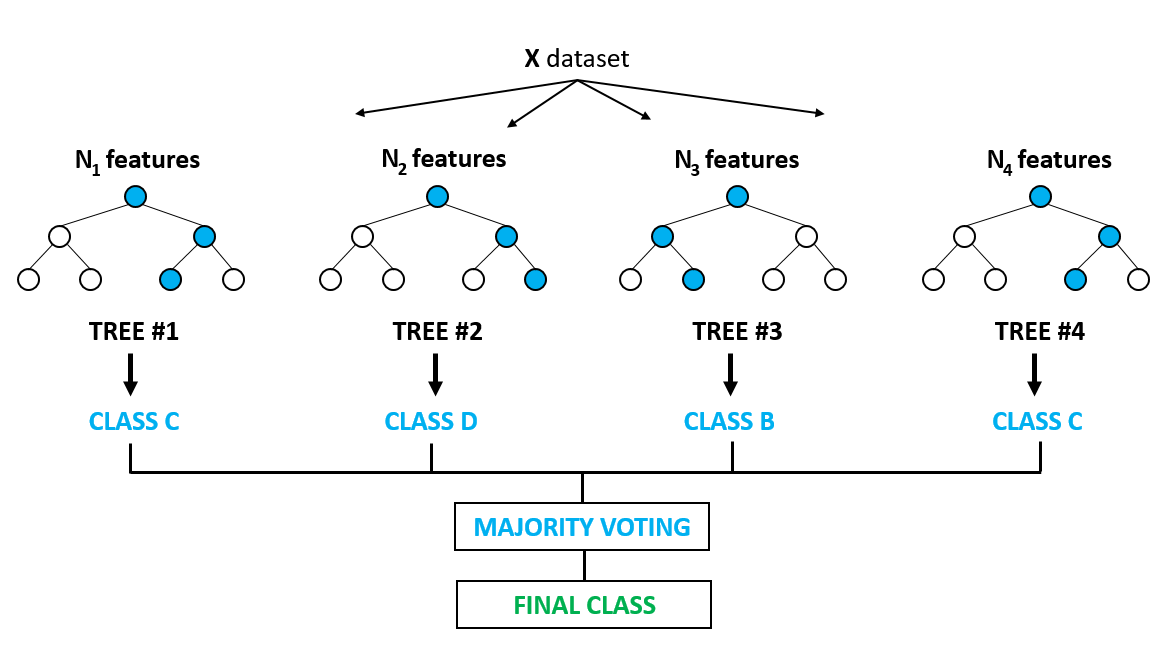

In [170]:
Image("randomforest.png", width=800, height=800)

In [184]:
folds = KFold(3, shuffle=True, random_state=RANDOM_STATE)
rf = RandomForestClassifier(class_weight={1:0.67, 0:0.33}, oob_score=True, random_state=RANDOM_STATE) 
                       
hyper_params = [{
                 'n_estimators':[100, 250, 500],
                }]
scoring_param = ['recall', 'f1']

model_cv_rf_1=GridSearchCV(estimator=rf,
                   param_grid=hyper_params,
                   cv=folds,
                   scoring=scoring_param,
                   refit='recall',
                   return_train_score=True,
                   n_jobs=4,
                   verbose=1)

model_cv_rf_1.fit(X_train_pca, y_train_resampled)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed:  9.3min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.33, 1: 0.67},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                       

In [185]:
cv_result_rf_1 = pd.DataFrame(model_cv_rf_1.cv_results_)
cv_result_rf_1

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        69.2654        0.7592           0.7834          0.0925   
1       187.3258        3.1654           2.4368          0.0765   
2       310.2654       27.5045           2.8680          0.2804   

  param_n_estimators                 params  split0_test_recall  \
0                100  {'n_estimators': 100}              0.9487   
1                250  {'n_estimators': 250}              0.9503   
2                500  {'n_estimators': 500}              0.9511   

   split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
0              0.9517              0.9438            0.9481           0.0033   
1              0.9558              0.9443            0.9501           0.0047   
2              0.9559              0.9452            0.9507           0.0044   

   rank_test_recall  split0_train_recall  split1_train_recall  \
0                 3               1.0000               1.0000   
1                 2               1.0000               1.0000   
2                 1               1.0000               1.0000   

   split2_train_recall  mean_train_recall  std_train_recall  split0_test_f1  \
0               1.0000             1.0000            0.0000          0.9525   
1               1.0000             1.0000            0.0000          0.9536   
2               1.0000             1.0000            0.0000          0.9546   

   split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  rank_test_f1  \
0          0.9518          0.9481        0.9508       0.0019             3   
1          0.9543          0.9489        0.9522       0.0024             2   
2          0.9544          0.9491        0.9527       0.0025             1   

   split0_train_f1  split1_train_f1  split2_train_f1  mean_train_f1  \
0           1.0000           1.0000           1.0000         1.0000   
1           1.0000           1.0000           1.0000         1.0000   
2           1.0000           1.0000           1.0000         1.0000   

   std_train_f1  
0        0.0000  
1        0.0000  
2        0.0000

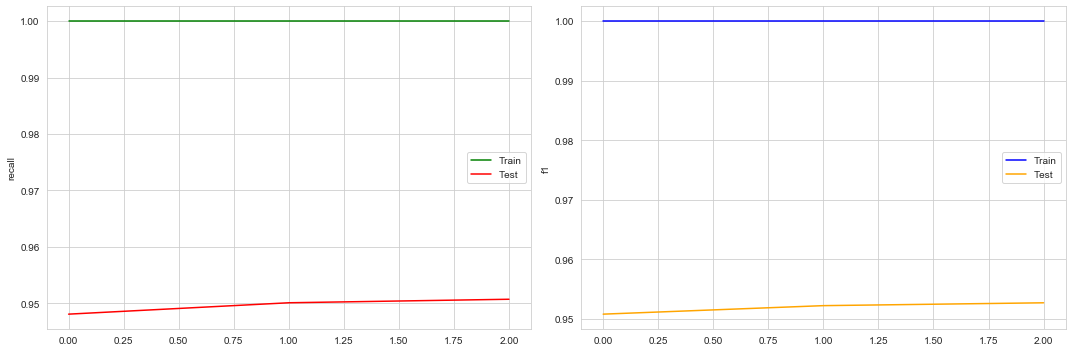

In [186]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=cv_result_rf_1.index, y='mean_train_recall', data=cv_result_rf_1, color='g', ax=ax[0])
sns.lineplot(x=cv_result_rf_1.index, y='mean_test_recall', data=cv_result_rf_1, color='r', ax=ax[0])
ax[0].legend(['Train', 'Test'])
ax[0].set_ylabel('recall')

sns.lineplot(x=cv_result_rf_1.index, y='mean_train_f1', data=cv_result_rf_1, color='b', ax=ax[1])
sns.lineplot(x=cv_result_rf_1.index, y='mean_test_f1', data=cv_result_rf_1, color='orange', ax=ax[1])
ax[1].legend(['Train', 'Test'])
ax[1].set_ylabel('f1')

plt.tight_layout()
plt.show()

In [188]:
folds = KFold(3, shuffle=True, random_state=RANDOM_STATE)
rf = RandomForestClassifier(n_estimators=250, class_weight={1:0.67, 0:0.33}, oob_score=True, random_state=RANDOM_STATE)
                       
hyper_params = [{
                 'max_samples':[.25, .5, .75],
                }]
scoring_param = ['recall', 'f1']

model_cv_rf_2=GridSearchCV(estimator=rf,
                   param_grid=hyper_params,
                   cv=folds,
                   scoring=scoring_param,
                   refit='recall',
                   return_train_score=True,
                   n_jobs=4,
                   verbose=1)

model_cv_rf_2.fit(X_train_pca, y_train_resampled)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed:  4.7min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.33, 1: 0.67},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=250, n_jobs=None,
                                       

In [189]:
cv_result_rf_2 = pd.DataFrame(model_cv_rf_2.cv_results_)
cv_result_rf_2

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        53.5460        0.6801           1.6747          0.0364   
1       102.4391        0.9579           1.7858          0.2552   
2       126.3685       11.4522           1.4055          0.1259   

  param_max_samples                 params  split0_test_recall  \
0            0.2500  {'max_samples': 0.25}              0.9190   
1            0.5000   {'max_samples': 0.5}              0.9411   
2            0.7500  {'max_samples': 0.75}              0.9475   

   split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
0              0.9234              0.9139            0.9188           0.0039   
1              0.9453              0.9351            0.9405           0.0042   
2              0.9502              0.9419            0.9465           0.0034   

   rank_test_recall  split0_train_recall  split1_train_recall  \
0                 3               0.9733               0.9754   
1                 2               0.9972               0.9979   
2                 1               1.0000               1.0000   

   split2_train_recall  mean_train_recall  std_train_recall  split0_test_f1  \
0               0.9763             0.9750            0.0013          0.9313   
1               0.9974             0.9975            0.0003          0.9462   
2               1.0000             1.0000            0.0000          0.9516   

   split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  rank_test_f1  \
0          0.9316          0.9269        0.9299       0.0021             3   
1          0.9460          0.9411        0.9444       0.0024             2   
2          0.9502          0.9458        0.9492       0.0024             1   

   split0_train_f1  split1_train_f1  split2_train_f1  mean_train_f1  \
0           0.9723           0.9742           0.9744         0.9736   
1           0.9944           0.9952           0.9950         0.9949   
2           0.9999           1.0000           0.9999         0.9999   

   std_train_f1  
0        0.0010  
1        0.0003  
2        0.0000

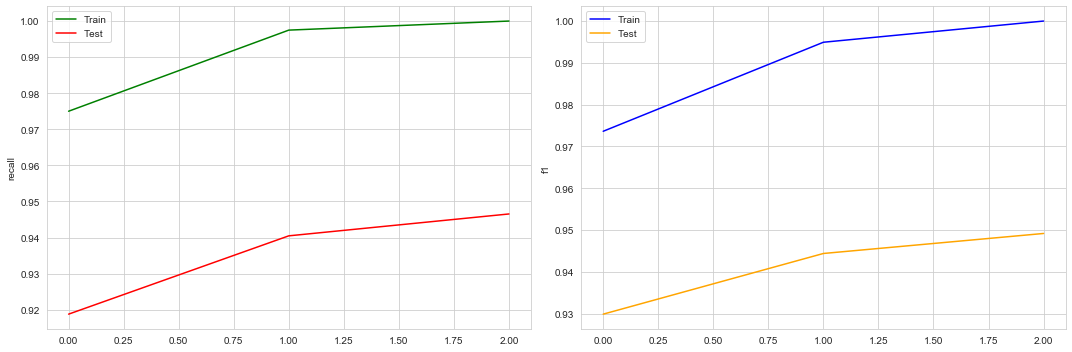

In [190]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=cv_result_rf_2.index, y='mean_train_recall', data=cv_result_rf_2, color='g', ax=ax[0])
sns.lineplot(x=cv_result_rf_2.index, y='mean_test_recall', data=cv_result_rf_2, color='r', ax=ax[0])
ax[0].legend(['Train', 'Test'])
ax[0].set_ylabel('recall')

sns.lineplot(x=cv_result_rf_2.index, y='mean_train_f1', data=cv_result_rf_2, color='b', ax=ax[1])
sns.lineplot(x=cv_result_rf_2.index, y='mean_test_f1', data=cv_result_rf_2, color='orange', ax=ax[1])
ax[1].legend(['Train', 'Test'])
ax[1].set_ylabel('f1')

plt.tight_layout()
plt.show()

In [191]:
folds = KFold(3, shuffle=True, random_state=RANDOM_STATE)
rf = RandomForestClassifier(n_estimators=250, class_weight={1:0.67, 0:0.33}, oob_score=True, random_state=RANDOM_STATE)
                       
hyper_params = [{
                 'max_depth':[10, 20, 30],
                }]
scoring_param = ['recall', 'f1']

model_cv_rf_3=GridSearchCV(estimator=rf,
                   param_grid=hyper_params,
                   cv=folds,
                   scoring=scoring_param,
                   refit='recall',
                   return_train_score=True,
                   n_jobs=4,
                   verbose=1)

model_cv_rf_3.fit(X_train_pca, y_train_resampled)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed:  6.3min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.33, 1: 0.67},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=250, n_jobs=None,
                                       

In [192]:
cv_result_rf_3 = pd.DataFrame(model_cv_rf_3.cv_results_)
cv_result_rf_3

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        85.0155        0.7387           1.4248          0.0412   
1       145.3573        7.9776           1.6408          0.1178   
2       155.1879       19.5627           1.4842          0.2049   

  param_max_depth             params  split0_test_recall  split1_test_recall  \
0              10  {'max_depth': 10}              0.9651              0.9664   
1              20  {'max_depth': 20}              0.9603              0.9620   
2              30  {'max_depth': 30}              0.9525              0.9564   

   split2_test_recall  mean_test_recall  std_test_recall  rank_test_recall  \
0              0.9651            0.9656           0.0006                 1   
1              0.9539            0.9587           0.0035                 2   
2              0.9469            0.9519           0.0039                 3   

   split0_train_recall  split1_train_recall  split2_train_recall  \
0               0.9933               0.9919               0.9942   
1               1.0000               1.0000               1.0000   
2               1.0000               1.0000               1.0000   

   mean_train_recall  std_train_recall  split0_test_f1  split1_test_f1  \
0             0.9931            0.0009          0.9075          0.9139   
1             1.0000            0.0000          0.9495          0.9484   
2             1.0000            0.0000          0.9522          0.9527   

   split2_test_f1  mean_test_f1  std_test_f1  rank_test_f1  split0_train_f1  \
0          0.9110        0.9108       0.0026             3           0.9351   
1          0.9450        0.9476       0.0019             2           0.9867   
2          0.9474        0.9508       0.0024             1           0.9956   

   split1_train_f1  split2_train_f1  mean_train_f1  std_train_f1  
0           0.9389           0.9390         0.9377        0.0018  
1           0.9888           0.9889         0.9881        0.0010  
2           0.9970           0.9969         0.9965        0.0006

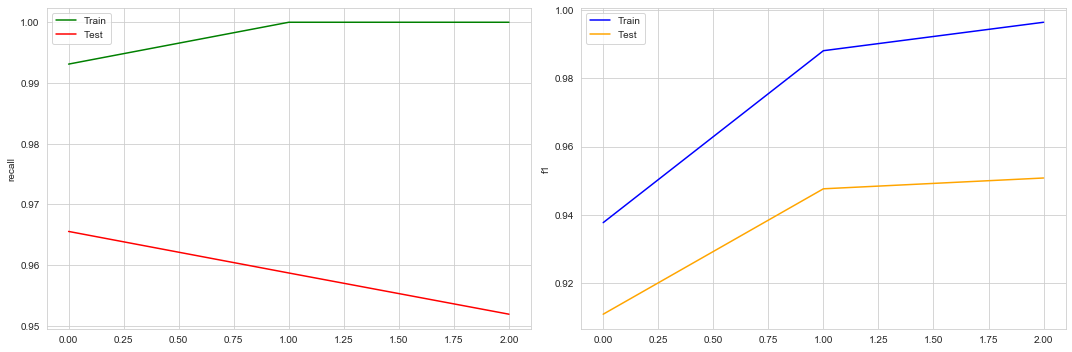

In [193]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=cv_result_rf_3.index, y='mean_train_recall', data=cv_result_rf_3, color='g', ax=ax[0])
sns.lineplot(x=cv_result_rf_3.index, y='mean_test_recall', data=cv_result_rf_3, color='r', ax=ax[0])
ax[0].legend(['Train', 'Test'])
ax[0].set_ylabel('recall')

sns.lineplot(x=cv_result_rf_3.index, y='mean_train_f1', data=cv_result_rf_3, color='b', ax=ax[1])
sns.lineplot(x=cv_result_rf_3.index, y='mean_test_f1', data=cv_result_rf_3, color='orange', ax=ax[1])
ax[1].legend(['Train', 'Test'])
ax[1].set_ylabel('f1')

plt.tight_layout()
plt.show()

In [236]:
folds = KFold(3, shuffle=True, random_state=RANDOM_STATE)
rf = RandomForestClassifier(n_estimators=250, class_weight={1:0.67, 0:0.33}, oob_score=True, random_state=RANDOM_STATE)
                       
hyper_params = [{
                 'min_samples_leaf':[10, 50, 100, 500, 1000],
                }]
scoring_param = ['recall', 'f1']

model_cv_rf_4=GridSearchCV(estimator=rf,
                   param_grid=hyper_params,
                   cv=folds,
                   scoring=scoring_param,
                   refit='recall',
                   return_train_score=True,
                   n_jobs=4,
                   verbose=1)

model_cv_rf_4.fit(X_train_pca, y_train_resampled)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  6.7min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.33, 1: 0.67},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=250, n_jobs=None,
                                       

In [237]:
cv_result_rf_4 = pd.DataFrame(model_cv_rf_4.cv_results_)
cv_result_rf_4

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       144.3240        1.1634           1.5759          0.0132   
1       116.1366        2.2567           1.4208          0.1113   
2       105.0857        7.4889           1.5506          0.1895   
3        78.6722        1.5150           1.0116          0.0481   
4        44.0986        1.8570           0.7754          0.0361   

  param_min_samples_leaf                      params  split0_test_recall  \
0                     10    {'min_samples_leaf': 10}              0.9587   
1                     50    {'min_samples_leaf': 50}              0.9445   
2                    100   {'min_samples_leaf': 100}              0.9411   
3                    500   {'min_samples_leaf': 500}              0.9420   
4                   1000  {'min_samples_leaf': 1000}              0.9551   

   split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
0              0.9593              0.9533            0.9571           0.0027   
1              0.9485              0.9452            0.9461           0.0017   
2              0.9454              0.9415            0.9427           0.0019   
3              0.9468              0.9396            0.9428           0.0030   
4              0.9575              0.9516            0.9547           0.0024   

   rank_test_recall  split0_train_recall  split1_train_recall  \
0                 1               0.9907               0.9907   
1                 3               0.9633               0.9656   
2                 5               0.9528               0.9525   
3                 4               0.9465               0.9477   
4                 2               0.9566               0.9572   

   split2_train_recall  mean_train_recall  std_train_recall  split0_test_f1  \
0               0.9928             0.9914            0.0010          0.9345   
1               0.9652             0.9647            0.0010          0.8962   
2               0.9515             0.9523            0.0005          0.8775   
3               0.9452             0.9465            0.0010          0.8304   
4               0.9593             0.9577            0.0012          0.8001   

   split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  rank_test_f1  \
0          0.9338          0.9315        0.9333       0.0013             1   
1          0.9011          0.8980        0.8984       0.0020             2   
2          0.8850          0.8792        0.8805       0.0032             3   
3          0.8362          0.8287        0.8318       0.0032             4   
4          0.8081          0.8010        0.8031       0.0036             5   

   split0_train_f1  split1_train_f1  split2_train_f1  mean_train_f1  \
0           0.9653           0.9679           0.9682         0.9671   
1           0.9138           0.9177           0.9184         0.9166   
2           0.8895           0.8919           0.8917         0.8910   
3           0.8386           0.8378           0.8352         0.8372   
4           0.8079           0.8046           0.8053         0.8059   

   std_train_f1  
0        0.0013  
1        0.0020  
2        0.0011  
3        0.0015  
4        0.0014

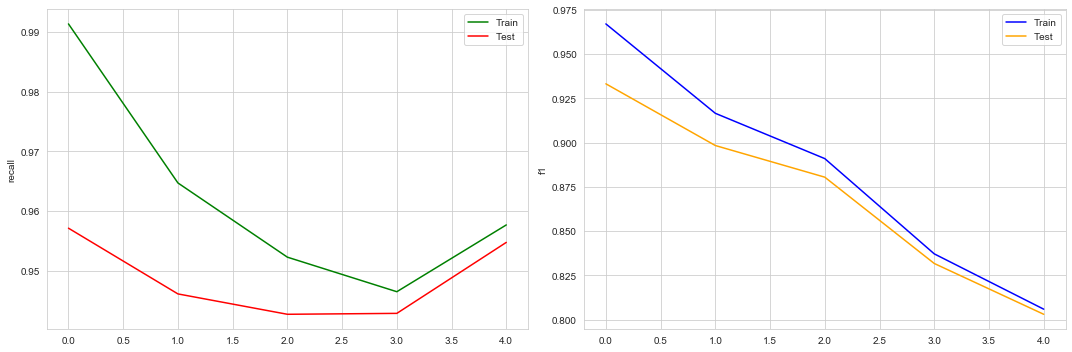

In [238]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=cv_result_rf_4.index, y='mean_train_recall', data=cv_result_rf_4, color='g', ax=ax[0])
sns.lineplot(x=cv_result_rf_4.index, y='mean_test_recall', data=cv_result_rf_4, color='r', ax=ax[0])
ax[0].legend(['Train', 'Test'])
ax[0].set_ylabel('recall')

sns.lineplot(x=cv_result_rf_4.index, y='mean_train_f1', data=cv_result_rf_4, color='b', ax=ax[1])
sns.lineplot(x=cv_result_rf_4.index, y='mean_test_f1', data=cv_result_rf_4, color='orange', ax=ax[1])
ax[1].legend(['Train', 'Test'])
ax[1].set_ylabel('f1')

plt.tight_layout()
plt.show()

In [239]:
folds = KFold(3, shuffle=True, random_state=RANDOM_STATE)
rf = RandomForestClassifier(class_weight={1:0.67, 0:0.33}, oob_score=True, random_state=RANDOM_STATE)
                       
hyper_params = [{
                 'n_estimators':[200, 400],
                 'max_depth':[5, 10, 15],
                 'min_samples_leaf':[100, 250, 500],
                 'max_samples':[.3, .5],
                }]
scoring_param = ['recall', 'f1']

model_cv_rf=GridSearchCV(estimator=rf,
                   param_grid=hyper_params,
                   cv=folds,
                   scoring=scoring_param,
                   refit='recall',
                   return_train_score=True,
                   n_jobs=4,
                   verbose=1)

model_cv_rf.fit(X_train_pca, y_train_resampled)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 108 out of 108 | elapsed: 19.9min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.33, 1: 0.67},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              m..._fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                             

In [240]:
cv_result_rf = pd.DataFrame(model_cv_rf.cv_results_)
cv_result_rf

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         22.1805        0.0612           0.8297          0.0088   
1         44.1027        0.8347           1.5141          0.1741   
2         20.3425        0.4472           0.9272          0.2010   
3         38.1772        1.0472           1.5738          0.1372   
4         16.1700        0.6752           0.6982          0.0750   
5         34.7394        0.1613           1.2561          0.1561   
6         26.2652        2.4568           0.6460          0.0325   
7         56.0338        3.6482           1.4965          0.0256   
8         28.8471        1.1629           0.7730          0.0669   
9         55.3574        1.2774           1.2857          0.1071   
10        25.1913        1.1732           0.7069          0.0412   
11        46.5741        0.0548           1.2770          0.0566   
12        26.8587        0.6351           0.9153          0.0724   
13        54.5664        0.2613           1.6960          0.0156   
14        23.0712        0.6459           0.7237          0.0707   
15        47.0561        0.9803           1.7339          0.2708   
16        20.6371        1.6469           0.8675          0.0771   
17        45.4780        0.2078           1.6555          0.0276   
18        46.8565        2.6153           0.9149          0.1545   
19        80.0273        1.6841           1.7220          0.1361   
20        33.2488        0.4189           0.8078          0.0199   
21        76.6408        2.4274           2.1136          0.0953   
22        33.6155        0.8156           1.0046          0.1014   
23        62.2856        2.4212           1.2394          0.0074   
24        28.1104        3.4718           0.8272          0.0893   
25        50.7289        1.2279           1.5154          0.0629   
26        19.8616        0.4124           0.6704          0.0589   
27        42.5289        3.6529           1.3203          0.0082   
28        15.9099        0.4338           0.6008          0.0051   
29        36.0815        0.7664           1.4901          0.0514   
30        46.7577        1.5614           0.8663          0.1133   
31        79.6572        3.1562           1.5313          0.0410   
32        31.0333        0.4893           0.7087          0.0070   
33        62.0469        0.0777           1.3558          0.0131   
34        24.8138        0.0963           0.6440          0.0173   
35        50.9270        0.3082           1.2015          0.0654   

   param_max_depth param_max_samples param_min_samples_leaf  \
0                5            0.3000                    100   
1                5            0.3000                    100   
2                5            0.3000                    250   
3                5            0.3000                    250   
4                5            0.3000                    500   
5                5            0.3000                    500   
6                5            0.5000                    100   
7                5            0.5000                    100   
8                5            0.5000                    250   
9                5            0.5000                    250   
10               5            0.5000                    500   
11               5            0.5000                    500   
12              10            0.3000                    100   
13              10            0.3000                    100   
14              10            0.3000                    250   
15              10            0.3000                    250   
16              10            0.3000                    500   
17              10            0.3000                    500   
18              10            0.5000                    100   
19              10            0.5000                    100   
20              10            0.5000                    250   
21              10            0.5000                    250   
22              10            0.5000  

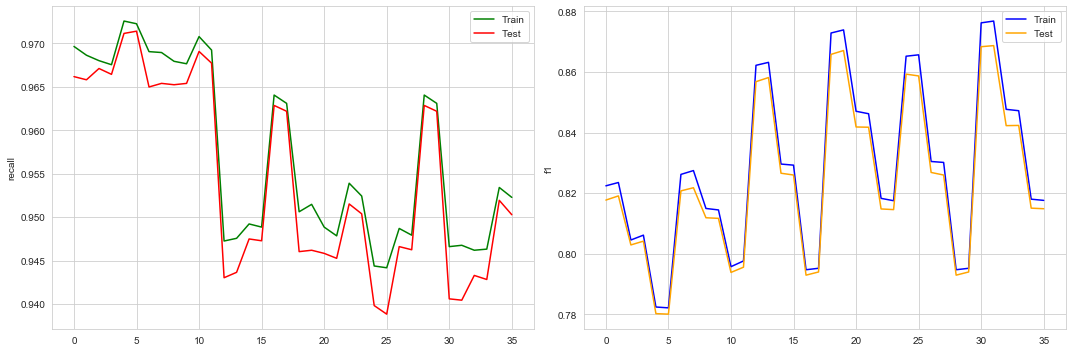

In [241]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=cv_result_rf.index, y='mean_train_recall', data=cv_result_rf, color='g', ax=ax[0])
sns.lineplot(x=cv_result_rf.index, y='mean_test_recall', data=cv_result_rf, color='r', ax=ax[0])
ax[0].legend(['Train', 'Test'])
ax[0].set_ylabel('recall')

sns.lineplot(x=cv_result_rf.index, y='mean_train_f1', data=cv_result_rf, color='b', ax=ax[1])
sns.lineplot(x=cv_result_rf.index, y='mean_test_f1', data=cv_result_rf, color='orange', ax=ax[1])
ax[1].legend(['Train', 'Test'])
ax[1].set_ylabel('f1')

plt.tight_layout()
plt.show()

In [272]:
model_rf = RandomForestClassifier(n_estimators=400, max_depth=10, min_samples_leaf=100, max_samples=.5,
                                  class_weight={1:0.67, 0:0.33}, oob_score=True, random_state=RANDOM_STATE)
model_rf.fit(X_train_pca, y_train_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.33, 1: 0.67}, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       max_samples=0.5, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=400, n_jobs=None, oob_score=True,
                       random_state=100, verbose=0, warm_start=False)

In [273]:
# prediction for train data set
y_pred_train = model_rf.predict(X_train_pca)

# classification report
print(metrics.classification_report(y_train_resampled, y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     19309
           1       0.82      0.96      0.88     19309

    accuracy                           0.87     38618
   macro avg       0.88      0.87      0.87     38618
weighted avg       0.88      0.87      0.87     38618



In [274]:
# confusion matrix
metrics.confusion_matrix(y_train_resampled, y_pred_train)

array([[15188,  4121],
       [  856, 18453]], dtype=int64)

In [275]:
round(metrics.roc_auc_score(y_train_resampled, y_pred_train), 2)

0.87

In [276]:
# prediction for test data set
y_pred_test = model_rf.predict(pca.transform(scaler.transform(X_test)))

# classification report
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87      8251
           1       0.26      0.82      0.39       750

    accuracy                           0.79      9001
   macro avg       0.62      0.80      0.63      9001
weighted avg       0.92      0.79      0.83      9001



In [277]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_test)

array([[6503, 1748],
       [ 137,  613]], dtype=int64)

In [278]:
round(metrics.roc_auc_score(y_test, y_pred_test), 2)

0.8

In [297]:
model_dict = {'model':'RandomForest', 'data':'train', 'recall':0.96, 'precision':0.82, 'f1':0.88, 'auc':0.87}
result_df = result_df.append(model_dict, ignore_index=True)
model_dict = {'model':'RandomForest', 'data':'test', 'recall':0.82, 'precision':0.26, 'f1':0.39, 'auc':0.8}
result_df = result_df.append(model_dict, ignore_index=True)

With Random Forest, 0.82 recall value can be acheived.

### AdaBoost

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

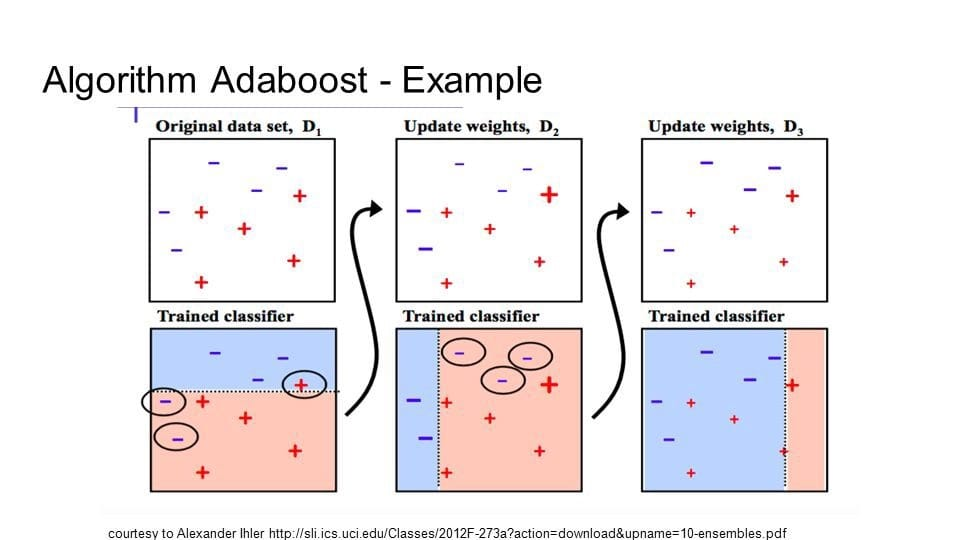

In [173]:
Image("adaboost.jpg", width=800, height=800)

In [110]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [275]:
folds = KFold(3, shuffle=True, random_state=RANDOM_STATE)
hyper_params = [{
                 'base_estimator__max_depth':[2, 3, 5, 7],
                }]
scoring_param = ['recall', 'f1']

tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
ABC = AdaBoostClassifier(base_estimator=tree, random_state=RANDOM_STATE)

model_cv_abc_1=GridSearchCV(estimator=ABC,
                   param_grid=hyper_params,
                   cv=folds,
                   scoring=scoring_param,
                   refit='recall',
                   return_train_score=True,
                   n_jobs=4,
                   verbose=1)

model_cv_abc_1.fit(X_train_pca, y_train_resampled)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:  4.6min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                        

In [276]:
cv_result_abc_1 = pd.DataFrame(model_cv_abc_1.cv_results_)
cv_result_abc_1

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        40.0406        0.3417           0.6610          0.0737   
1        57.3695        0.3929           0.5176          0.0096   
2        92.4545        0.1942           0.5297          0.0019   
3       124.1567        2.0054           0.4894          0.0448   

  param_base_estimator__max_depth                            params  \
0                               2  {'base_estimator__max_depth': 2}   
1                               3  {'base_estimator__max_depth': 3}   
2                               5  {'base_estimator__max_depth': 5}   
3                               7  {'base_estimator__max_depth': 7}   

   split0_test_recall  split1_test_recall  split2_test_recall  \
0              0.8945              0.8964              0.8954   
1              0.9082              0.9143              0.9139   
2              0.9427              0.9534              0.9390   
3              0.9314              0.9292              0.9309   

   mean_test_recall  std_test_recall  rank_test_recall  split0_train_recall  \
0            0.8954           0.0008                 4               0.9064   
1            0.9122           0.0028                 3               0.9407   
2            0.9450           0.0061                 1               0.9991   
3            0.9305           0.0010                 2               1.0000   

   split1_train_recall  split2_train_recall  mean_train_recall  \
0               0.9047               0.9075             0.9062   
1               0.9380               0.9434             0.9407   
2               0.9987               0.9994             0.9990   
3               1.0000               1.0000             1.0000   

   std_train_recall  split0_test_f1  split1_test_f1  split2_test_f1  \
0            0.0011          0.8973          0.8944          0.8926   
1            0.0022          0.9091          0.9071          0.9076   
2            0.0003          0.9373          0.9384          0.9302   
3            0.0000          0.9259          0.9198          0.9266   

   mean_test_f1  std_test_f1  rank_test_f1  split0_train_f1  split1_train_f1  \
0        0.8947       0.0020             4           0.9037           0.9049   
1        0.9079       0.0008             3           0.9358           0.9357   
2        0.9353       0.0036             1           0.9975           0.9974   
3        0.9241       0.0031             2           1.0000           1.0000   

   split2_train_f1  mean_train_f1  std_train_f1  
0           0.9077         0.9055        0.0017  
1           0.9380         0.9365        0.0011  
2           0.9979         0.9976        0.0002  
3           1.0000         1.0000        0.0000

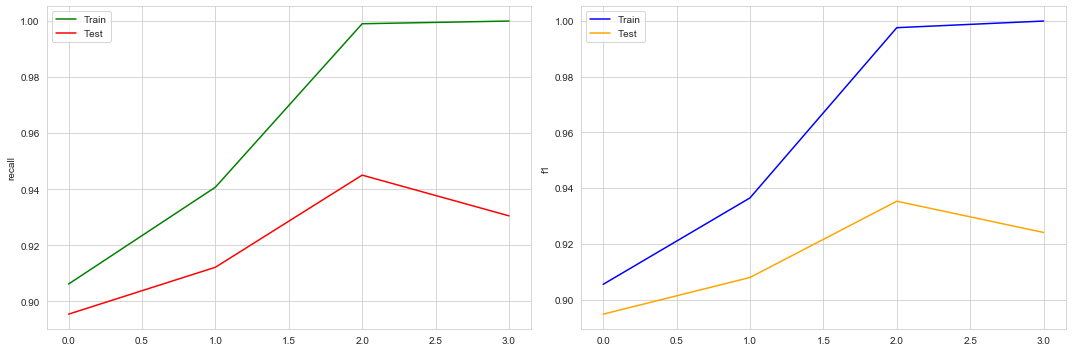

In [277]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=cv_result_abc_1.index, y='mean_train_recall', data=cv_result_abc_1, color='g', ax=ax[0])
sns.lineplot(x=cv_result_abc_1.index, y='mean_test_recall', data=cv_result_abc_1, color='r', ax=ax[0])
ax[0].legend(['Train', 'Test'])
ax[0].set_ylabel('recall')

sns.lineplot(x=cv_result_abc_1.index, y='mean_train_f1', data=cv_result_abc_1, color='b', ax=ax[1])
sns.lineplot(x=cv_result_abc_1.index, y='mean_test_f1', data=cv_result_abc_1, color='orange', ax=ax[1])
ax[1].legend(['Train', 'Test'])
ax[1].set_ylabel('f1')

plt.tight_layout()
plt.show()

In [278]:
folds = KFold(3, shuffle=True, random_state=RANDOM_STATE)
hyper_params = [{
                 'algorithm':['SAMME.R', 'SAMME'],
                }]
scoring_param = ['recall', 'f1']

tree = DecisionTreeClassifier(max_depth=3, random_state=RANDOM_STATE)
ABC = AdaBoostClassifier(base_estimator=tree, random_state=RANDOM_STATE)

model_cv_abc_2=GridSearchCV(estimator=ABC,
                   param_grid=hyper_params,
                   cv=folds,
                   scoring=scoring_param,
                   refit='recall',
                   return_train_score=True,
                   n_jobs=4,
                   verbose=1)

model_cv_abc_2.fit(X_train_pca, y_train_resampled)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:  1.8min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=3,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                           

In [279]:
cv_result_abc_2 = pd.DataFrame(model_cv_abc_2.cv_results_)
cv_result_abc_2

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        54.1994        0.2390           0.5799          0.0097   
1        51.6703        1.3480           0.3304          0.0426   

  param_algorithm                    params  split0_test_recall  \
0         SAMME.R  {'algorithm': 'SAMME.R'}              0.9082   
1           SAMME    {'algorithm': 'SAMME'}              0.8892   

   split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
0              0.9143              0.9139            0.9122           0.0028   
1              0.8869              0.8875            0.8879           0.0010   

   rank_test_recall  split0_train_recall  split1_train_recall  \
0                 1               0.9407               0.9380   
1                 2               0.9026               0.8971   

   split2_train_recall  mean_train_recall  std_train_recall  split0_test_f1  \
0               0.9434             0.9407            0.0022          0.9091   
1               0.9022             0.9006            0.0025          0.8910   

   split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  rank_test_f1  \
0          0.9071          0.9076        0.9079       0.0008             1   
1          0.8922          0.8856        0.8896       0.0029             2   

   split0_train_f1  split1_train_f1  split2_train_f1  mean_train_f1  \
0           0.9358           0.9357           0.9380         0.9365   
1           0.8991           0.9063           0.9024         0.9026   

   std_train_f1  
0        0.0011  
1        0.0029

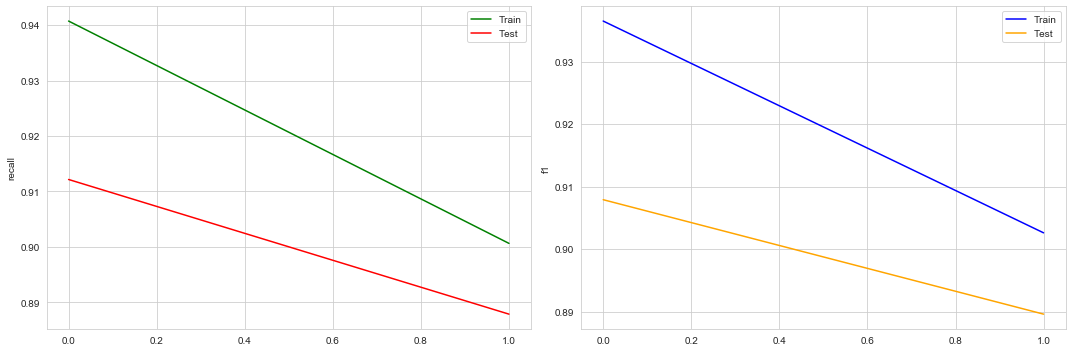

In [280]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=cv_result_abc_2.index, y='mean_train_recall', data=cv_result_abc_2, color='g', ax=ax[0])
sns.lineplot(x=cv_result_abc_2.index, y='mean_test_recall', data=cv_result_abc_2, color='r', ax=ax[0])
ax[0].legend(['Train', 'Test'])
ax[0].set_ylabel('recall')

sns.lineplot(x=cv_result_abc_2.index, y='mean_train_f1', data=cv_result_abc_2, color='b', ax=ax[1])
sns.lineplot(x=cv_result_abc_2.index, y='mean_test_f1', data=cv_result_abc_2, color='orange', ax=ax[1])
ax[1].legend(['Train', 'Test'])
ax[1].set_ylabel('f1')

plt.tight_layout()
plt.show()

In [124]:
folds = KFold(3, shuffle=True, random_state=RANDOM_STATE)
hyper_params = [{
                 'n_estimators':[25, 50, 100, 250],
                }]
scoring_param = ['recall', 'f1']

tree = DecisionTreeClassifier(max_depth=3, random_state=RANDOM_STATE)
ABC = AdaBoostClassifier(base_estimator=tree, algorithm='SAMME.R', random_state=RANDOM_STATE)

model_cv_abc_3=GridSearchCV(estimator=ABC,
                   param_grid=hyper_params,
                   cv=folds,
                   scoring=scoring_param,
                   refit='recall',
                   return_train_score=True,
                   n_jobs=4,
                   verbose=1)

model_cv_abc_3.fit(X_train_pca, y_train_resampled)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:  8.2min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=3,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                           

In [125]:
cv_result_abc_3 = pd.DataFrame(model_cv_abc_3.cv_results_)
cv_result_abc_3

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        30.5525        0.2244           0.3636          0.0096   
1        60.8611        0.3826           0.5411          0.0066   
2       135.9858        2.0484           1.1095          0.1251   
3       296.3688       13.8070           2.1897          0.2583   

  param_n_estimators                 params  split0_test_recall  \
0                 25   {'n_estimators': 25}              0.8942   
1                 50   {'n_estimators': 50}              0.9082   
2                100  {'n_estimators': 100}              0.9302   
3                250  {'n_estimators': 250}              0.9501   

   split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
0              0.8941              0.8935            0.8939           0.0003   
1              0.9143              0.9139            0.9122           0.0028   
2              0.9364              0.9339            0.9335           0.0026   
3              0.9561              0.9504            0.9522           0.0028   

   rank_test_recall  split0_train_recall  split1_train_recall  \
0                 4               0.9107               0.9087   
1                 3               0.9407               0.9380   
2                 2               0.9729               0.9717   
3                 1               0.9997               0.9998   

   split2_train_recall  mean_train_recall  std_train_recall  split0_test_f1  \
0               0.9158             0.9117            0.0030          0.8941   
1               0.9434             0.9407            0.0022          0.9091   
2               0.9740             0.9729            0.0010          0.9259   
3               0.9997             0.9997            0.0000          0.9419   

   split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  rank_test_f1  \
0          0.8917          0.8935        0.8931       0.0010             4   
1          0.9071          0.9076        0.9079       0.0008             3   
2          0.9250          0.9246        0.9252       0.0005             2   
3          0.9412          0.9406        0.9413       0.0005             1   

   split0_train_f1  split1_train_f1  split2_train_f1  mean_train_f1  \
0           0.9080           0.9092           0.9130         0.9101   
1           0.9358           0.9357           0.9380         0.9365   
2           0.9662           0.9666           0.9681         0.9669   
3           0.9986           0.9995           0.9994         0.9992   

   std_train_f1  
0        0.0021  
1        0.0011  
2        0.0008  
3        0.0004

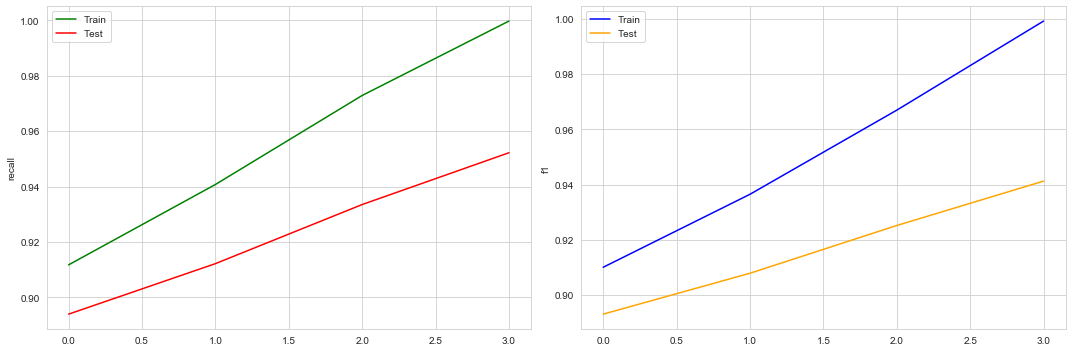

In [126]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=cv_result_abc_3.index, y='mean_train_recall', data=cv_result_abc_3, color='g', ax=ax[0])
sns.lineplot(x=cv_result_abc_3.index, y='mean_test_recall', data=cv_result_abc_3, color='r', ax=ax[0])
ax[0].legend(['Train', 'Test'])
ax[0].set_ylabel('recall')

sns.lineplot(x=cv_result_abc_3.index, y='mean_train_f1', data=cv_result_abc_3, color='b', ax=ax[1])
sns.lineplot(x=cv_result_abc_3.index, y='mean_test_f1', data=cv_result_abc_3, color='orange', ax=ax[1])
ax[1].legend(['Train', 'Test'])
ax[1].set_ylabel('f1')

plt.tight_layout()
plt.show()

In [117]:
folds = KFold(3, shuffle=True, random_state=RANDOM_STATE)
hyper_params = [{
                 'learning_rate':[1e-2, 1e-1, 1, 1e1],
                }]
scoring_param = ['recall', 'f1']

tree = DecisionTreeClassifier(max_depth=3, random_state=RANDOM_STATE)
ABC = AdaBoostClassifier(base_estimator=tree, algorithm='SAMME.R', random_state=RANDOM_STATE)

model_cv_abc_4=GridSearchCV(estimator=ABC,
                   param_grid=hyper_params,
                   cv=folds,
                   scoring=scoring_param,
                   refit='recall',
                   return_train_score=True,
                   n_jobs=4,
                   verbose=1)

model_cv_abc_4.fit(X_train_pca, y_train_resampled)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:  3.0min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=3,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                           

In [118]:
cv_result_abc_4 = pd.DataFrame(model_cv_abc_4.cv_results_)
cv_result_abc_4

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        63.1484        0.6205           0.6659          0.0250   
1        61.4554        0.9829           0.5879          0.0562   
2        57.8800        5.4108           0.5293          0.0800   
3         5.4420        0.4847           0.5148          0.0496   

  param_learning_rate                   params  split0_test_recall  \
0              0.0100  {'learning_rate': 0.01}              0.7613   
1              0.1000   {'learning_rate': 0.1}              0.8735   
2                   1     {'learning_rate': 1}              0.9082   
3             10.0000  {'learning_rate': 10.0}              0.9995   

   split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
0              0.7601              0.7626            0.7614           0.0010   
1              0.8750              0.8755            0.8747           0.0009   
2              0.9143              0.9139            0.9122           0.0028   
3              0.0380              0.0040            0.3472           0.4615   

   rank_test_recall  split0_train_recall  split1_train_recall  \
0                 3               0.7632               0.7603   
1                 2               0.8824               0.8798   
2                 1               0.9407               0.9380   
3                 4               0.9997               0.0383   

   split2_train_recall  mean_train_recall  std_train_recall  split0_test_f1  \
0               0.7675             0.7636            0.0030          0.8046   
1               0.8820             0.8814            0.0012          0.8805   
2               0.9434             0.9407            0.0022          0.9091   
3               0.0054             0.3478            0.4612          0.6693   

   split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  rank_test_f1  \
0          0.8036          0.8022        0.8034       0.0010             3   
1          0.8778          0.8779        0.8787       0.0013             2   
2          0.9071          0.9076        0.9079       0.0008             1   
3          0.0658          0.0080        0.2477       0.2990             4   

   split0_train_f1  split1_train_f1  split2_train_f1  mean_train_f1  \
0           0.8058           0.8047           0.8072         0.8059   
1           0.8854           0.8857           0.8877         0.8863   
2           0.9358           0.9357           0.9380         0.9365   
3           0.6716           0.0660           0.0106         0.2494   

   std_train_f1  
0        0.0010  
1        0.0010  
2        0.0011  
3        0.2994

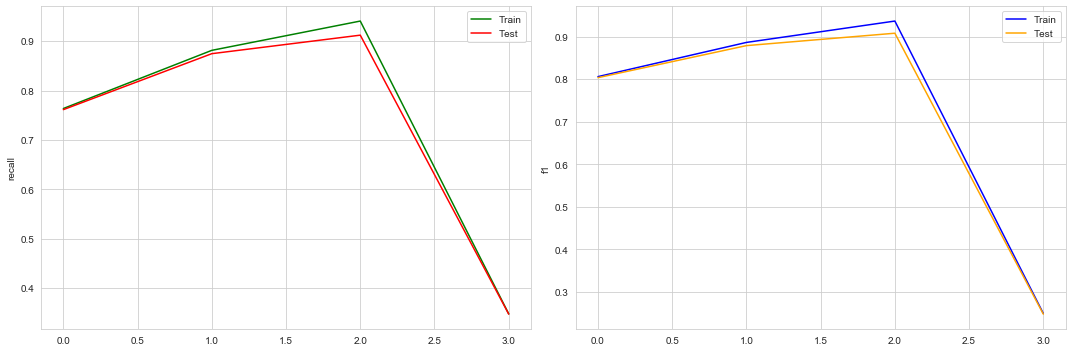

In [119]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=cv_result_abc_4.index, y='mean_train_recall', data=cv_result_abc_4, color='g', ax=ax[0])
sns.lineplot(x=cv_result_abc_4.index, y='mean_test_recall', data=cv_result_abc_4, color='r', ax=ax[0])
ax[0].legend(['Train', 'Test'])
ax[0].set_ylabel('recall')

sns.lineplot(x=cv_result_abc_4.index, y='mean_train_f1', data=cv_result_abc_4, color='b', ax=ax[1])
sns.lineplot(x=cv_result_abc_4.index, y='mean_test_f1', data=cv_result_abc_4, color='orange', ax=ax[1])
ax[1].legend(['Train', 'Test'])
ax[1].set_ylabel('f1')

plt.tight_layout()
plt.show()

In [127]:
folds = KFold(3, shuffle=True, random_state=RANDOM_STATE)
hyper_params = [{
                 'base_estimator__max_depth':[2, 3, 4],
                 'n_estimators':[25, 50, 100],
                 'learning_rate':[1e-2, 1e-1, 1],
                }]
scoring_param = ['recall', 'f1']

tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
ABC = AdaBoostClassifier(base_estimator=tree, algorithm='SAMME.R', random_state=RANDOM_STATE)

model_cv_abc=GridSearchCV(estimator=ABC,
                   param_grid=hyper_params,
                   cv=folds,
                   scoring=scoring_param,
                   refit='recall',
                   return_train_score=True,
                   n_jobs=4,
                   verbose=1)

model_cv_abc.fit(X_train_pca, y_train_resampled)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 10.4min
[Parallel(n_jobs=4)]: Done  81 out of  81 | elapsed: 25.7min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                        

In [128]:
cv_result_abc = pd.DataFrame(model_cv_abc.cv_results_)
cv_result_abc

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         22.8248        0.9659           0.3488          0.0448   
1         45.7984        0.3437           0.6307          0.0705   
2         88.4951        2.0741           1.0104          0.0128   
3         21.9546        1.2815           0.3953          0.1726   
4         41.2739        0.3251           0.5295          0.0199   
5         91.3404        2.7799           1.2935          0.0777   
6         23.1970        1.7249           0.3680          0.0616   
7         47.5316        0.2814           0.5503          0.0288   
8         83.0514        0.2630           1.0118          0.0276   
9         30.2256        0.6457           0.2902          0.0158   
10        59.0850        0.2441           0.5437          0.0148   
11       129.0728        1.9504           1.1057          0.1135   
12        33.6022        2.9527           0.3215          0.0599   
13        61.5193        3.0263           0.5363          0.0195   
14       127.1790        3.0849           1.3351          0.0707   
15        31.8851        3.0078           0.3103          0.0457   
16        66.8617        1.3357           0.5448          0.0347   
17       120.5266        0.8899           1.0208          0.0074   
18        38.9574        0.7496           0.2916          0.0074   
19        77.6149        0.1961           0.5346          0.0088   
20       155.6286        0.8926           1.0401          0.0068   
21        38.4919        0.2617           0.2812          0.0128   
22        78.4466        0.9887           0.5346          0.0088   
23       160.4877        0.6574           1.0393          0.0190   
24        40.7627        1.5239           0.2760          0.0074   
25        78.3701        0.3064           0.5434          0.0148   
26       140.5090        3.4913           0.8391          0.0489   

   param_base_estimator__max_depth param_learning_rate param_n_estimators  \
0                                2              0.0100                 25   
1                                2              0.0100                 50   
2                                2              0.0100                100   
3                                2              0.1000                 25   
4                                2              0.1000                 50   
5                                2              0.1000                100   
6                                2                   1                 25   
7                                2                   1                 50   
8                                2                   1                100   
9                                3              0.0100                 25   
10                               3              0.0100                 50   
11                               3              0.0100                100   
12                               3              0.1000                 25   
13                               3              0.1000                 50   
14                               3              0.1000                100   
15                               3                   1                 25   
16                               3                   1                 50   
17                               3                   1                100   
18                               4              0.0100                 25   
19                               4              0.0100                 50   
20                               4              0.0100                100   
21                               4              0.1000                 25   
22                               4              0.1000                 50   
23                               4              0.1000                100   
24                               4                   1                 25   
25                               4                   1                 50   
26                  

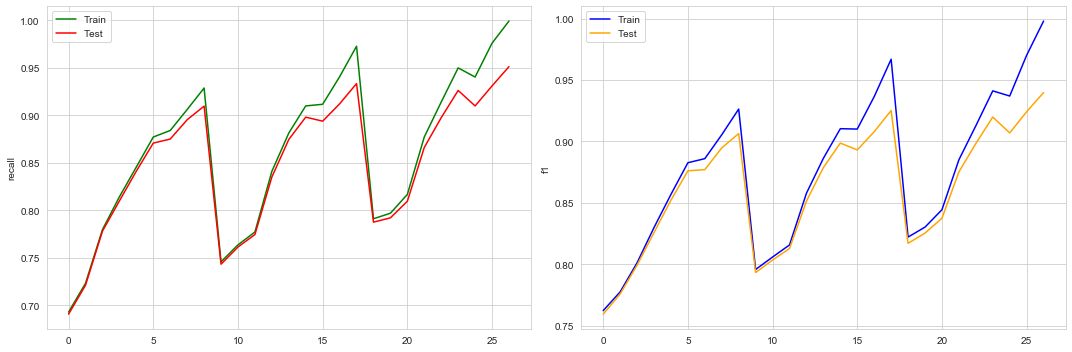

In [129]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=cv_result_abc.index, y='mean_train_recall', data=cv_result_abc, color='g', ax=ax[0])
sns.lineplot(x=cv_result_abc.index, y='mean_test_recall', data=cv_result_abc, color='r', ax=ax[0])
ax[0].legend(['Train', 'Test'])
ax[0].set_ylabel('recall')

sns.lineplot(x=cv_result_abc.index, y='mean_train_f1', data=cv_result_abc, color='b', ax=ax[1])
sns.lineplot(x=cv_result_abc.index, y='mean_test_f1', data=cv_result_abc, color='orange', ax=ax[1])
ax[1].legend(['Train', 'Test'])
ax[1].set_ylabel('f1')

plt.tight_layout()
plt.show()

In [245]:
# Index 5 looks best option without overfitting
tree = DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE)
model_abc = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, base_estimator=tree, algorithm='SAMME.R',
                               random_state=RANDOM_STATE)
model_abc.fit(X_train_pca, y_train_resampled)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [246]:
# prediction for train data set
y_pred_train = model_abc.predict(X_train_pca)

# classification report
print(metrics.classification_report(y_train_resampled, y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     19309
           1       0.89      0.88      0.88     19309

    accuracy                           0.88     38618
   macro avg       0.88      0.88      0.88     38618
weighted avg       0.88      0.88      0.88     38618



In [247]:
# confusion matrix
metrics.confusion_matrix(y_train_resampled, y_pred_train)

array([[17136,  2173],
       [ 2409, 16900]], dtype=int64)

In [248]:
round(metrics.roc_auc_score(y_train_resampled, y_pred_train), 2)

0.88

In [249]:
# prediction for test data set
y_pred_test = model_abc.predict(pca.transform(scaler.transform(X_test)))

# classification report
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      8251
           1       0.36      0.69      0.47       750

    accuracy                           0.87      9001
   macro avg       0.66      0.79      0.70      9001
weighted avg       0.92      0.87      0.89      9001



In [250]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_test)

array([[7328,  923],
       [ 235,  515]], dtype=int64)

In [251]:
round(metrics.roc_auc_score(y_test, y_pred_test), 2)

0.79

In [298]:
model_dict = {'model':'AdaBoost', 'data':'train', 'recall':0.88, 'precision':0.89, 'f1':0.89, 'auc':0.88}
result_df = result_df.append(model_dict, ignore_index=True)
model_dict = {'model':'AdaBoost', 'data':'test', 'recall':0.69, 'precision':0.36, 'f1':0.47, 'auc':0.79}
result_df = result_df.append(model_dict, ignore_index=True)

AdaBoost can achieve 0.69 recall score for test data.

### XGBoost

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

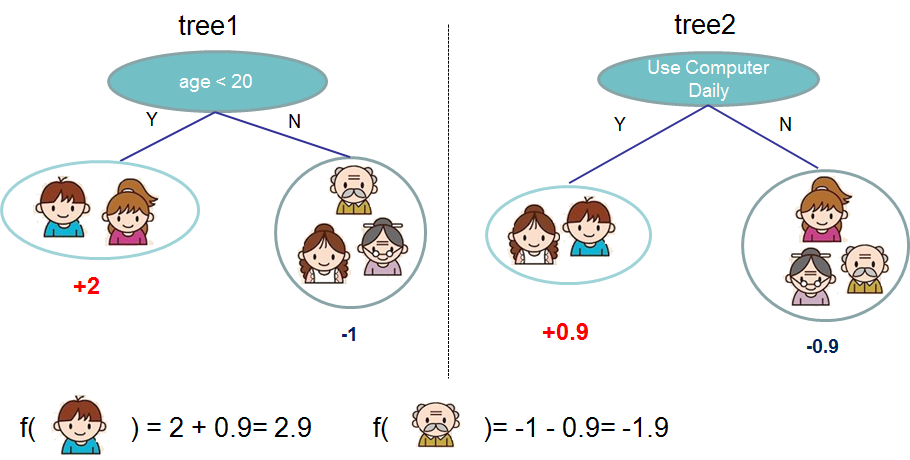

In [280]:
Image("xgboost.png", width=800, height=800)

In [281]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [204]:
folds = KFold(3, shuffle=True, random_state=RANDOM_STATE)
hyper_params = [{
                 'max_depth':[2, 3, 4, 5],
                }]
scoring_param = ['recall', 'f1']

xgb_model = XGBClassifier(random_state=RANDOM_STATE)

model_cv_xgb_1=GridSearchCV(estimator=xgb_model,
                   param_grid=hyper_params,
                   cv=folds,
                   scoring=scoring_param,
                   refit='recall',
                   return_train_score=True,
                   n_jobs=4,
                   verbose=1)

model_cv_xgb_1.fit(X_train_pca, y_train_resampled)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:  1.8min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid=[{'max_depth': [2, 3, 4, 5]}], pre_dispatch='2*n_jobs',


In [205]:
cv_result_xgb_1 = pd.DataFrame(model_cv_xgb_1.cv_results_)
cv_result_xgb_1

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        22.1637        0.0322           0.0937          0.0000   
1        27.1620        2.1684           0.1302          0.0074   
2        34.6018        0.5627           0.1614          0.0074   
3        40.9816        0.6800           0.1822          0.0265   

  param_max_depth            params  split0_test_recall  split1_test_recall  \
0               2  {'max_depth': 2}              0.8719              0.8733   
1               3  {'max_depth': 3}              0.8922              0.8951   
2               4  {'max_depth': 4}              0.9138              0.9182   
3               5  {'max_depth': 5}              0.9358              0.9386   

   split2_test_recall  mean_test_recall  std_test_recall  rank_test_recall  \
0              0.8654            0.8702           0.0035                 4   
1              0.8906            0.8926           0.0019                 3   
2              0.9130            0.9150           0.0023                 2   
3              0.9346            0.9363           0.0017                 1   

   split0_train_recall  split1_train_recall  split2_train_recall  \
0               0.8788               0.8751               0.8731   
1               0.9033               0.9047               0.9041   
2               0.9332               0.9333               0.9387   
3               0.9615               0.9639               0.9664   

   mean_train_recall  std_train_recall  split0_test_f1  split1_test_f1  \
0             0.8757            0.0024          0.8772          0.8753   
1             0.9040            0.0006          0.8954          0.8935   
2             0.9351            0.0025          0.9133          0.9121   
3             0.9639            0.0020          0.9304          0.9262   

   split2_test_f1  mean_test_f1  std_test_f1  rank_test_f1  split0_train_f1  \
0          0.8713        0.8746       0.0024             4           0.8800   
1          0.8918        0.8936       0.0015             3           0.9033   
2          0.9095        0.9116       0.0016             2           0.9283   
3          0.9261        0.9276       0.0020             1           0.9519   

   split1_train_f1  split2_train_f1  mean_train_f1  std_train_f1  
0           0.8813           0.8807         0.8807        0.0005  
1           0.9069           0.9064         0.9055        0.0016  
2           0.9304           0.9332         0.9307        0.0020  
3           0.9549           0.9555         0.9541        0.0016

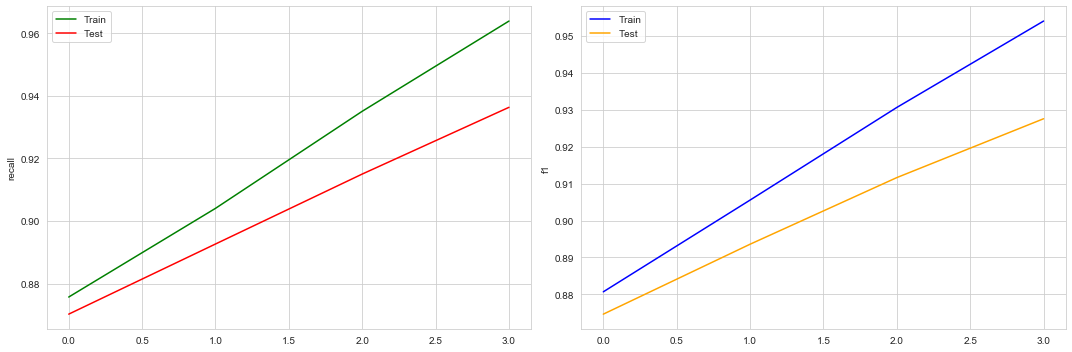

In [206]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=cv_result_xgb_1.index, y='mean_train_recall', data=cv_result_xgb_1, color='g', ax=ax[0])
sns.lineplot(x=cv_result_xgb_1.index, y='mean_test_recall', data=cv_result_xgb_1, color='r', ax=ax[0])
ax[0].legend(['Train', 'Test'])
ax[0].set_ylabel('recall')

sns.lineplot(x=cv_result_xgb_1.index, y='mean_train_f1', data=cv_result_xgb_1, color='b', ax=ax[1])
sns.lineplot(x=cv_result_xgb_1.index, y='mean_test_f1', data=cv_result_xgb_1, color='orange', ax=ax[1])
ax[1].legend(['Train', 'Test'])
ax[1].set_ylabel('f1')

plt.tight_layout()
plt.show()

In [207]:
folds = KFold(3, shuffle=True, random_state=RANDOM_STATE)
hyper_params = [{
                 'n_estimators':[50, 100, 250, 500],
                }]
scoring_param = ['recall', 'f1']

xgb_model = XGBClassifier(random_state=RANDOM_STATE)

model_cv_xgb_2=GridSearchCV(estimator=xgb_model,
                   param_grid=hyper_params,
                   cv=folds,
                   scoring=scoring_param,
                   refit='recall',
                   return_train_score=True,
                   n_jobs=4,
                   verbose=1)

model_cv_xgb_2.fit(X_train_pca, y_train_resampled)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:  3.7min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid=[{'n_estimators': [50, 100, 250, 500]}],
             pr

In [208]:
cv_result_xgb_2 = pd.DataFrame(model_cv_xgb_2.cv_results_)
cv_result_xgb_2

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        11.9877        0.2197           0.0781          0.0000   
1        23.5555        0.3551           0.1198          0.0074   
2        74.8835        2.0683           0.2425          0.0153   
3       125.8300        6.7355           0.4100          0.0116   

  param_n_estimators                 params  split0_test_recall  \
0                 50   {'n_estimators': 50}              0.8605   
1                100  {'n_estimators': 100}              0.8922   
2                250  {'n_estimators': 250}              0.9272   
3                500  {'n_estimators': 500}              0.9414   

   split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
0              0.8693              0.8635            0.8645           0.0036   
1              0.8951              0.8906            0.8926           0.0019   
2              0.9299              0.9254            0.9275           0.0018   
3              0.9470              0.9426            0.9436           0.0024   

   rank_test_recall  split0_train_recall  split1_train_recall  \
0                 4               0.8725               0.8750   
1                 3               0.9033               0.9047   
2                 2               0.9444               0.9462   
3                 1               0.9701               0.9696   

   split2_train_recall  mean_train_recall  std_train_recall  split0_test_f1  \
0               0.8719             0.8731            0.0013          0.8710   
1               0.9041             0.9040            0.0006          0.8954   
2               0.9432             0.9446            0.0012          0.9223   
3               0.9703             0.9700            0.0003          0.9363   

   split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  rank_test_f1  \
0          0.8741          0.8711        0.8721       0.0014             4   
1          0.8935          0.8918        0.8936       0.0015             3   
2          0.9199          0.9179        0.9200       0.0018             2   
3          0.9342          0.9328        0.9344       0.0014             1   

   split0_train_f1  split1_train_f1  split2_train_f1  mean_train_f1  \
0           0.8791           0.8819           0.8812         0.8807   
1           0.9033           0.9069           0.9064         0.9055   
2           0.9358           0.9405           0.9377         0.9380   
3           0.9603           0.9615           0.9622         0.9613   

   std_train_f1  
0        0.0012  
1        0.0016  
2        0.0020  
3        0.0008

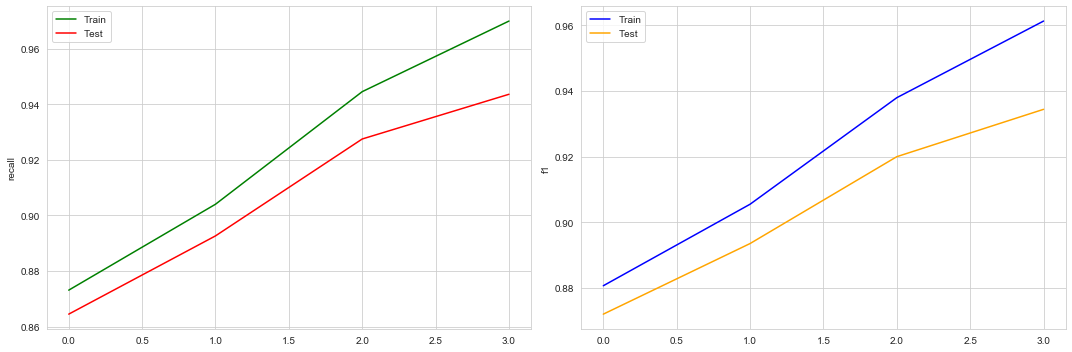

In [209]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=cv_result_xgb_2.index, y='mean_train_recall', data=cv_result_xgb_2, color='g', ax=ax[0])
sns.lineplot(x=cv_result_xgb_2.index, y='mean_test_recall', data=cv_result_xgb_2, color='r', ax=ax[0])
ax[0].legend(['Train', 'Test'])
ax[0].set_ylabel('recall')

sns.lineplot(x=cv_result_xgb_2.index, y='mean_train_f1', data=cv_result_xgb_2, color='b', ax=ax[1])
sns.lineplot(x=cv_result_xgb_2.index, y='mean_test_f1', data=cv_result_xgb_2, color='orange', ax=ax[1])
ax[1].legend(['Train', 'Test'])
ax[1].set_ylabel('f1')

plt.tight_layout()
plt.show()

In [210]:
folds = KFold(3, shuffle=True, random_state=RANDOM_STATE)
hyper_params = [{
                 'learning_rate':[0.4, 0.6, 0.8],
                }]
scoring_param = ['recall', 'f1']

xgb_model = XGBClassifier(random_state=RANDOM_STATE)

model_cv_xgb_3=GridSearchCV(estimator=xgb_model,
                   param_grid=hyper_params,
                   cv=folds,
                   scoring=scoring_param,
                   refit='recall',
                   return_train_score=True,
                   n_jobs=4,
                   verbose=1)

model_cv_xgb_3.fit(X_train_pca, y_train_resampled)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed:  1.2min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid=[{'learning_rate': [0.4, 0.6, 0.8]}],
             pre_d

In [211]:
cv_result_xgb_3 = pd.DataFrame(model_cv_xgb_3.cv_results_)
cv_result_xgb_3

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        23.3483        0.0658           0.1093          0.0000   
1        24.6274        0.7522           0.1250          0.0128   
2        23.9687        1.8107           0.1157          0.0090   

  param_learning_rate                  params  split0_test_recall  \
0              0.4000  {'learning_rate': 0.4}              0.9319   
1              0.6000  {'learning_rate': 0.6}              0.9406   
2              0.8000  {'learning_rate': 0.8}              0.9372   

   split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
0              0.9363              0.9312            0.9331           0.0022   
1              0.9377              0.9357            0.9380           0.0020   
2              0.9412              0.9387            0.9390           0.0017   

   rank_test_recall  split0_train_recall  split1_train_recall  \
0                 3               0.9583               0.9560   
1                 2               0.9708               0.9682   
2                 1               0.9751               0.9748   

   split2_train_recall  mean_train_recall  std_train_recall  split0_test_f1  \
0               0.9602             0.9582            0.0017          0.9284   
1               0.9706             0.9699            0.0012          0.9304   
2               0.9772             0.9757            0.0011          0.9326   

   split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  rank_test_f1  \
0          0.9243          0.9233        0.9253       0.0022             3   
1          0.9293          0.9288        0.9295       0.0007             2   
2          0.9302          0.9294        0.9307       0.0013             1   

   split0_train_f1  split1_train_f1  split2_train_f1  mean_train_f1  \
0           0.9486           0.9492           0.9523         0.9500   
1           0.9615           0.9606           0.9630         0.9617   
2           0.9670           0.9685           0.9699         0.9685   

   std_train_f1  
0        0.0016  
1        0.0010  
2        0.0012

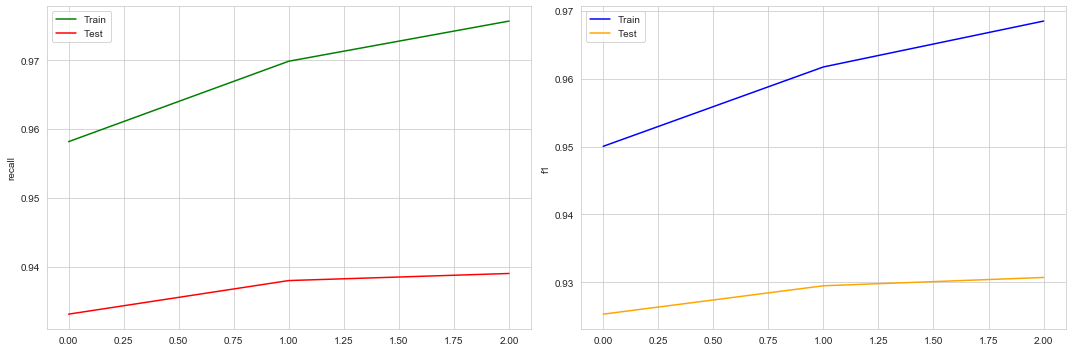

In [212]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=cv_result_xgb_3.index, y='mean_train_recall', data=cv_result_xgb_3, color='g', ax=ax[0])
sns.lineplot(x=cv_result_xgb_3.index, y='mean_test_recall', data=cv_result_xgb_3, color='r', ax=ax[0])
ax[0].legend(['Train', 'Test'])
ax[0].set_ylabel('recall')

sns.lineplot(x=cv_result_xgb_3.index, y='mean_train_f1', data=cv_result_xgb_3, color='b', ax=ax[1])
sns.lineplot(x=cv_result_xgb_3.index, y='mean_test_f1', data=cv_result_xgb_3, color='orange', ax=ax[1])
ax[1].legend(['Train', 'Test'])
ax[1].set_ylabel('f1')

plt.tight_layout()
plt.show()

In [216]:
folds = KFold(3, shuffle=True, random_state=RANDOM_STATE)
hyper_params = [{
                 'subsample':[0.1, 0.2, 0.3]
                }]
scoring_param = ['recall', 'f1']

xgb_model = XGBClassifier(random_state=RANDOM_STATE)

model_cv_xgb_4=GridSearchCV(estimator=xgb_model,
                   param_grid=hyper_params,
                   cv=folds,
                   scoring=scoring_param,
                   refit='recall',
                   return_train_score=True,
                   n_jobs=4,
                   verbose=1)

model_cv_xgb_4.fit(X_train_pca, y_train_resampled)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed:   34.0s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid=[{'subsample': [0.1, 0.2, 0.3]}],
             pre_dispa

In [217]:
cv_result_xgb_4 = pd.DataFrame(model_cv_xgb_4.cv_results_)
cv_result_xgb_4

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         8.2640        0.0325           0.1193          0.0091   
1        11.8072        0.5022           0.1145          0.0074   
2        13.8293        0.9362           0.1269          0.0248   

  param_subsample              params  split0_test_recall  split1_test_recall  \
0          0.1000  {'subsample': 0.1}              0.8888              0.8933   
1          0.2000  {'subsample': 0.2}              0.8937              0.8939   
2          0.3000  {'subsample': 0.3}              0.8906              0.8947   

   split2_test_recall  mean_test_recall  std_test_recall  rank_test_recall  \
0              0.8898            0.8906           0.0019                 3   
1              0.8926            0.8934           0.0006                 1   
2              0.8921            0.8925           0.0017                 2   

   split0_train_recall  split1_train_recall  split2_train_recall  \
0               0.8999               0.8989               0.9004   
1               0.9023               0.9010               0.9010   
2               0.9016               0.9017               0.9056   

   mean_train_recall  std_train_recall  split0_test_f1  split1_test_f1  \
0             0.8998            0.0006          0.8943          0.8950   
1             0.9014            0.0006          0.8979          0.8939   
2             0.9030            0.0019          0.8964          0.8954   

   split2_test_f1  mean_test_f1  std_test_f1  rank_test_f1  split0_train_f1  \
0          0.8928        0.8940       0.0009             3           0.9013   
1          0.8942        0.8953       0.0018             1           0.9020   
2          0.8941        0.8953       0.0010             2           0.9025   

   split1_train_f1  split2_train_f1  mean_train_f1  std_train_f1  
0           0.9030           0.9042         0.9028        0.0012  
1           0.9046           0.9046         0.9037        0.0012  
2           0.9053           0.9077         0.9052        0.0021

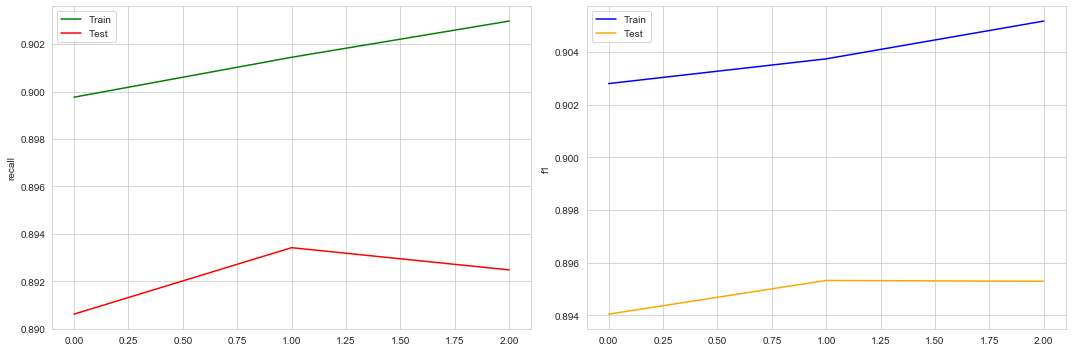

In [218]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=cv_result_xgb_4.index, y='mean_train_recall', data=cv_result_xgb_4, color='g', ax=ax[0])
sns.lineplot(x=cv_result_xgb_4.index, y='mean_test_recall', data=cv_result_xgb_4, color='r', ax=ax[0])
ax[0].legend(['Train', 'Test'])
ax[0].set_ylabel('recall')

sns.lineplot(x=cv_result_xgb_4.index, y='mean_train_f1', data=cv_result_xgb_4, color='b', ax=ax[1])
sns.lineplot(x=cv_result_xgb_4.index, y='mean_test_f1', data=cv_result_xgb_4, color='orange', ax=ax[1])
ax[1].legend(['Train', 'Test'])
ax[1].set_ylabel('f1')

plt.tight_layout()
plt.show()

In [227]:
folds = KFold(3, shuffle=True, random_state=RANDOM_STATE)
hyper_params = [{
                 'max_depth':[2, 3],
                 'n_estimators':[100, 200, 300],
                 'learning_rate':[0.5, 0.6, 0.7],
                }]
scoring_param = ['recall', 'f1']

xgb_model = XGBClassifier(subsample=0.2, random_state=RANDOM_STATE)

model_cv_xgb=GridSearchCV(estimator=xgb_model,
                   param_grid=hyper_params,
                   cv=folds,
                   scoring=scoring_param,
                   refit='recall',
                   return_train_score=True,
                   n_jobs=4,
                   verbose=1)

model_cv_xgb.fit(X_train_pca, y_train_resampled)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done  54 out of  54 | elapsed:  5.1min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=0.2,
                                     verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid=[{'learning_rate': [0.5, 0.6, 0.7], 'max_depth': [2, 3

In [228]:
cv_result_xgb = pd.DataFrame(model_cv_xgb.cv_results_)
cv_result_xgb

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         11.6548        0.4096           0.1275          0.0074   
1         19.3504        0.6603           0.1900          0.0046   
2         26.0026        0.5867           0.2325          0.0106   
3         11.6609        0.0822           0.1418          0.0119   
4         25.2025        0.1868           0.2402          0.0193   
5         39.5740        1.0407           0.3001          0.0047   
6         10.0111        0.7912           0.1198          0.0074   
7         22.8958        5.2786           0.1614          0.0074   
8         24.0106        1.6600           0.2186          0.0002   
9         10.5114        0.2505           0.1250          0.0000   
10        20.2292        0.0832           0.2031          0.0000   
11        31.1901        1.4783           0.2844          0.0046   
12         7.5124        0.2251           0.1093          0.0000   
13        20.1052        3.5415           0.2116          0.0127   
14        33.9690        0.4989           0.2343          0.0128   
15        14.2199        0.4759           0.1339          0.0066   
16        22.9026        1.1971           0.2031          0.0000   
17        28.0536        1.2695           0.2365          0.0031   

   param_learning_rate param_max_depth param_n_estimators  \
0               0.5000               2                100   
1               0.5000               2                200   
2               0.5000               2                300   
3               0.5000               3                100   
4               0.5000               3                200   
5               0.5000               3                300   
6               0.6000               2                100   
7               0.6000               2                200   
8               0.6000               2                300   
9               0.6000               3                100   
10              0.6000               3                200   
11              0.6000               3                300   
12              0.7000               2                100   
13              0.7000               2                200   
14              0.7000               2                300   
15              0.7000               3                100   
16              0.7000               3                200   
17              0.7000               3                300   

                                               params  split0_test_recall  \
0   {'learning_rate': 0.5, 'max_depth': 2, 'n_esti...              0.8909   
1   {'learning_rate': 0.5, 'max_depth': 2, 'n_esti...              0.9089   
2   {'learning_rate': 0.5, 'max_depth': 2, 'n_esti...              0.9152   
3   {'learning_rate': 0.5, 'max_depth': 3, 'n_esti...              0.9115   
4   {'learning_rate': 0.5, 'max_depth': 3, 'n_esti...              0.9171   
5   {'learning_rate': 0.5, 'max_depth': 3, 'n_esti...              0.9210   
6   {'learning_rate': 0.6, 'max_depth': 2, 'n_esti...              0.8964   
7   {'learning_rate': 0.6, 'max_depth': 2, 'n_esti...              0.8976   
8   {'learning_rate': 0.6, 'max_depth': 2, 'n_esti...              0.9070   
9   {'learning_rate': 0.6, 'max_depth': 3, 'n_esti...              0.9084   
10  {'learning_rate': 0.6, 'max_depth': 3, 'n_esti...              0.9040   
11  {'learning_rate': 0.6, 'max_depth': 3, 'n_esti...              0.9101   
12  {'learning_rate': 0.7, 'max_depth': 2, 'n_esti...              0.8965   
13  {'learning_rate': 0.7, 'max_depth': 2, 'n_esti...              0.8978   
14  {'learning_rate': 0.7, 'max_depth': 2, 'n_esti...              0.8975   
15  {'learning_rate': 0.7, 'max_depth': 3, 'n_esti...              0.9003   
16  {'learning_rate': 0.7, 'max_depth': 3, 'n_esti...              0.9028   
17  {'learning_rate': 0.7, 'max_depth': 3, 'n_esti...              0.8992   

    split1_test_recall  split2_test_recall  mean_test_recall  std_test_recall  \
0     

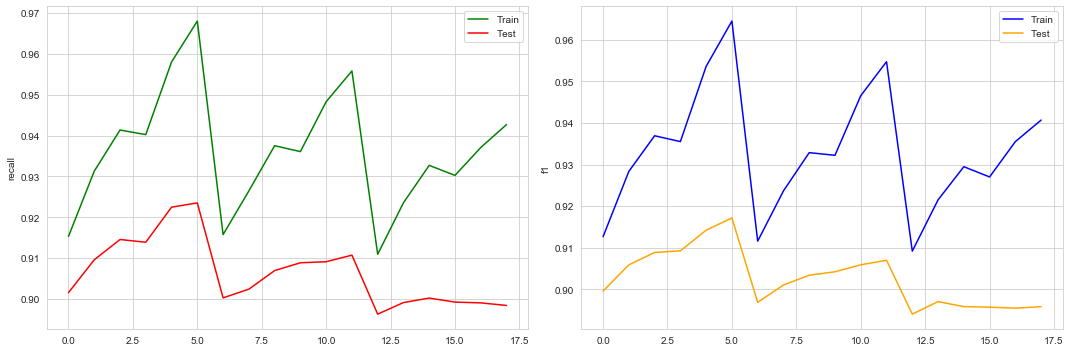

In [229]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=cv_result_xgb.index, y='mean_train_recall', data=cv_result_xgb, color='g', ax=ax[0])
sns.lineplot(x=cv_result_xgb.index, y='mean_test_recall', data=cv_result_xgb, color='r', ax=ax[0])
ax[0].legend(['Train', 'Test'])
ax[0].set_ylabel('recall')

sns.lineplot(x=cv_result_xgb.index, y='mean_train_f1', data=cv_result_xgb, color='b', ax=ax[1])
sns.lineplot(x=cv_result_xgb.index, y='mean_test_f1', data=cv_result_xgb, color='orange', ax=ax[1])
ax[1].legend(['Train', 'Test'])
ax[1].set_ylabel('f1')

plt.tight_layout()
plt.show()

In [282]:
# Index 2 looks best option without any overfitting
model_xgb = XGBClassifier(max_depth=2, n_estimators=300, learning_rate=.5, subsample=.2, random_state=RANDOM_STATE)
model_xgb.fit(X_train_pca.values, y_train_resampled.values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.2, verbosity=1)

In [283]:
# prediction for train data set
y_pred_train = model_xgb.predict(X_train_pca.values)

# classification report
print(metrics.classification_report(y_train_resampled, y_pred_train))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     19309
           1       0.93      0.95      0.94     19309

    accuracy                           0.94     38618
   macro avg       0.94      0.94      0.94     38618
weighted avg       0.94      0.94      0.94     38618



In [284]:
# confusion matrix
metrics.confusion_matrix(y_train_resampled, y_pred_train)

array([[17959,  1350],
       [ 1060, 18249]], dtype=int64)

In [285]:
round(metrics.roc_auc_score(y_train_resampled, y_pred_train), 2)

0.94

In [286]:
# prediction for test data set
y_pred_test = model_xgb.predict(pca.transform(scaler.transform(X_test)))

# classification report
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      8251
           1       0.39      0.60      0.47       750

    accuracy                           0.89      9001
   macro avg       0.67      0.76      0.70      9001
weighted avg       0.91      0.89      0.90      9001



In [287]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_test)

array([[7532,  719],
       [ 299,  451]], dtype=int64)

In [288]:
round(metrics.roc_auc_score(y_test, y_pred_test), 2)

0.76

In [299]:
model_dict = {'model':'XGBoost', 'data':'train', 'recall':0.95, 'precision':0.93, 'f1':0.94, 'auc':0.94}
result_df = result_df.append(model_dict, ignore_index=True)
model_dict = {'model':'XGBoost', 'data':'test', 'recall':0.60, 'precision':0.39, 'f1':0.47, 'auc':0.76}
result_df = result_df.append(model_dict, ignore_index=True)

With XGBoost, 0.6 recall score can be acheived.

# Summary

In [300]:
result_df

model   data  recall  precision     f1    auc
0            LogisticRegression  train  0.8400     0.8600 0.8500 0.8500
1            LogisticRegression   test  0.8000     0.3600 0.4900 0.8300
2                 Decision Tree  train  0.8900     0.8900 0.8900 0.8900
3                 Decision Tree   test  0.7700     0.4200 0.5400 0.8300
4   LogisticRegression with PCA  train  0.8500     0.8700 0.8600 0.8600
5   LogisticRegression with PCA   test  0.7900     0.3700 0.5000 0.8300
6                           SVM  train  0.9700     0.9200 0.9500 0.9500
7                           SVM   test  0.7600     0.4200 0.5400 0.8300
8                  RandomForest  train  0.9600     0.8200 0.8800 0.8700
9                  RandomForest   test  0.8200     0.2600 0.3900 0.8000
10                     AdaBoost  train  0.8800     0.8900 0.8900 0.8800
11                     AdaBoost   test  0.6900     0.3600 0.4700 0.7900
12                      XGBoost  train  0.9500     0.9300 0.9400 0.9400
13                      XGBoost   test  0.6000     0.3900 0.4700 0.7600

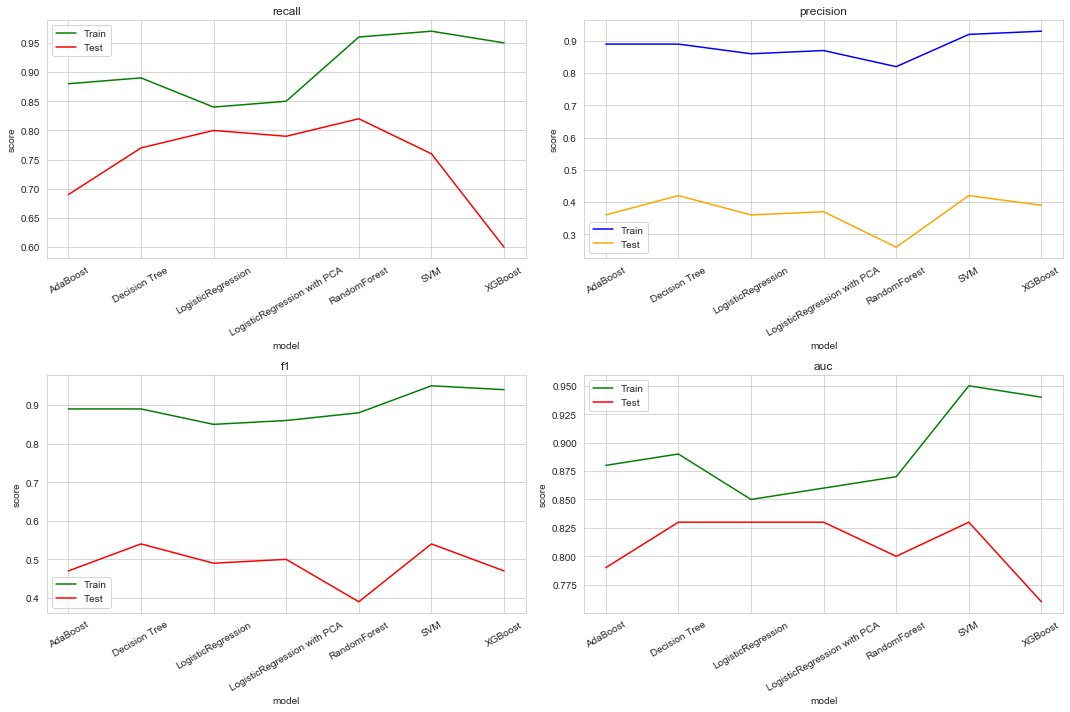

In [326]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.lineplot(x='model', y='recall', data=result_df[result_df.data=='train'], color='g', ax=ax[0, 0])
sns.lineplot(x='model', y='recall', data=result_df[result_df.data=='test'], color='r', ax=ax[0, 0])
ax[0, 0].legend(['Train', 'Test'])
ax[0, 0].set_ylabel('score')
ax[0, 0].set_title('recall')
ax[0, 0].tick_params(axis='x', rotation=30)

sns.lineplot(x='model', y='precision', data=result_df[result_df.data=='train'], color='b', ax=ax[0, 1])
sns.lineplot(x='model', y='precision', data=result_df[result_df.data=='test'], color='orange', ax=ax[0, 1])
ax[0, 1].legend(['Train', 'Test'])
ax[0, 1].set_ylabel('score')
ax[0, 1].set_title('precision')
ax[0, 1].tick_params(axis='x', rotation=30)

sns.lineplot(x='model', y='f1', data=result_df[result_df.data=='train'], color='g', ax=ax[1, 0])
sns.lineplot(x='model', y='f1', data=result_df[result_df.data=='test'], color='r', ax=ax[1, 0])
ax[1, 0].legend(['Train', 'Test'])
ax[1, 0].set_ylabel('score')
ax[1, 0].set_title('f1')
ax[1, 0].tick_params(axis='x', rotation=30)

sns.lineplot(x='model', y='auc', data=result_df[result_df.data=='train'], color='g', ax=ax[1, 1])
sns.lineplot(x='model', y='auc', data=result_df[result_df.data=='test'], color='r', ax=ax[1, 1])
ax[1, 1].legend(['Train', 'Test'])
ax[1, 1].set_ylabel('score')
ax[1, 1].set_title('auc')
ax[1, 1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

Below are the process followed to complete the case study:<br>
**Handling the missing values:**
- We've verified all different features related to recharge, incoming, outgoing and data related KPIs. Below are the methods used for treating missing values:
    - For some of the features, it was observed that a missing value represents not performing an activity (e.g.: Not recharging etc.). For these fearures, we imputed missing values with '0'
    - For other countinuous features, missing values are imputed with median of the feature as most of these features are highly skewed.
    
**Memory Management:**
- As the data size is huge for the initial data frame, many type casting was performed to save memory.

**Exploratory Data Analysis:**
- EDA was performed for univariate and bivariate analysis. Below are the observations:
    - Most of the independent variables are highly righy skewed. As for this data set outliers are important and removing outlier will increase class imbalance, we didn't remove the outliers directly.
    - Correlation of different independent variables with target variable is low. To resolve this we created multiple new features.

**Transforming the skewed variables:**
- For reducing skewness of independent variables, we used cuberoot transformation for highly skewed features.

**Dummy coding the categorical variables:**
- Few of the variables are identified as categorical variables. Dummy variables are created for these.

**Model Creation:**
- For understanding important factors behind churn, we created 2 models:
    - **Logistic Regression**: We first use a basic Random Forest classifier to find out 30 most important predictors. Then with these features we created a Logistic Regression model. After creating this base model, we removed unimportant features based on p-value and vif to derive final model.
    - **Decision Tree**: A decission tree model was created after tuning different hyper parameters.

- Below are the observations from these models:
    - Reduction in ARPU and Incoming call from good months to action month is good indicator of customer churn.
    - Different KPI related to Data and Roming services are also good predictor. So the company should provide better plans for Data and Roming services.
    - Social media users are also more likely to churn compared to other users. So the company should investigate on if data speed is good enough to access social medial apps and how price for data usage is comparable with competitors.

- For predicting the churn customers, we created 5 models:
    - **PCA**: PCA was done befor creating the models. With 45 PCA components we were able to capture ~85% of variability in data.
    - **Logistic Regression**: Logistic Regression done on PCA components achieved better result compared to basic Logistic Regression Model.
    - **SVM**: It was observed SVM kernel 'poly' with degree 3 gave a better result.
    - **Random Forest**: For Random Forest we acheive higher prescison value but recall value was comparatively low.
    - **Ada Boost**: Boosting algorithm didn't perform well on the data
    - **XG Boost**: Boosting algorithm didn't perform well on the data

- Below are the observations from these models:
    - Recall is selected as evaluation metric as it's most important to find out actual churn customers.
    - Random Forest achieve the highest recall but the lowest precision.
    - Logistic Regression with PCA provide good recall score with better precision. So this is selected as best model.